In [1]:
!python -V

Python 3.9.12


In [2]:
!pip check


spyder 5.1.5 has requirement pyqt5<5.13, but you have pyqt5 5.15.11.
spyder 5.1.5 has requirement pyqtwebengine<5.13, but you have pyqtwebengine 5.15.7.
jupyter-server 1.13.5 has requirement anyio<4,>=3.1.0, but you have anyio 4.9.0.
google-cloud-storage 1.31.0 has requirement google-auth<2.0dev,>=1.11.0, but you have google-auth 2.40.1.
google-cloud-core 1.7.1 has requirement google-auth<2.0dev,>=1.24.0, but you have google-auth 2.40.1.
google-api-core 1.25.1 has requirement google-auth<2.0dev,>=1.21.1, but you have google-auth 2.40.1.
flake8 3.9.2 has requirement pycodestyle<2.8.0,>=2.7.0, but you have pycodestyle 2.8.0.
daal4py 2021.5.0 has requirement daal==2021.4.0, but you have daal 2025.5.0.


In [3]:
! pip install pyqt5 pyqtwebengine daal pathlib ruamel-yaml pycodestyle==2.8.0


In [4]:
! pip install --ignore-installed tbb


  Using cached tbb-2022.1.0-py2.py3-none-manylinux_2_28_x86_64.whl (3.6 MB)
  Using cached tcmlib-1.3.0-py2.py3-none-manylinux_2_28_x86_64.whl (4.2 MB)


In [5]:
import pandas as pd

In [7]:
import pickle

In [8]:
pd.__version__

'1.4.2'

In [7]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet')

In [8]:
!pip install pyarrow

In [9]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2025-01-01 00:18:38   2025-01-01 00:26:59              1.0   
1         1  2025-01-01 00:32:40   2025-01-01 00:35:13              1.0   
2         1  2025-01-01 00:44:04   2025-01-01 00:46:01              1.0   
3         2  2025-01-01 00:14:27   2025-01-01 00:20:01              3.0   
4         2  2025-01-01 00:21:34   2025-01-01 00:25:06              3.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.60         1.0                  N           229           237   
1           0.50         1.0                  N           236           237   
2           0.60         1.0                  N           141           141   
3           0.52         1.0                  N           244           244   
4           0.66         1.0                  N           244           116   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.0    3.5      0.5        3.00           0.0   
1             1          5.1    3.5      0.5        2.02           0.0   
2             1          5.1    3.5      0.5        2.00           0.0   
3             2          7.2    1.0      0.5        0.00           0.0   
4             2          5.8    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         18.00                   2.5          0.0   
1                    1.0         12.12                   2.5          0.0   
2                    1.0         12.10                   2.5          0.0   
3                    1.0          9.70                   0.0          0.0   
4                    1.0          8.30                   0.0          0.0   

   cbd_congestion_fee  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [2]:
import sklearn

In [4]:
sklearn.__version__

'1.0.2'

In [1]:
# import packages
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("taxi-duration-prediction")

# Q1: 
Download the data for January and February 2023.

Read the data for January. How many columns are there?

In [6]:
# get data
jan_data = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
feb_data = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')


In [7]:
jan_data.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [8]:
feb_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-02-01 00:32:53   2023-02-01 00:34:34              2.0   
1         2  2023-02-01 00:35:16   2023-02-01 00:35:30              1.0   
2         2  2023-02-01 00:35:16   2023-02-01 00:35:30              1.0   
3         1  2023-02-01 00:29:33   2023-02-01 01:01:38              0.0   
4         2  2023-02-01 00:12:28   2023-02-01 00:25:46              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.30         1.0                  N           142           163   
1           0.00         1.0                  N            71            71   
2           0.00         1.0                  N            71            71   
3          18.80         1.0                  N           132            26   
4           3.22         1.0                  N           161           145   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          4.4   3.50      0.5         0.0           0.0   
1             4         -3.0  -1.00     -0.5         0.0           0.0   
2             4          3.0   1.00      0.5         0.0           0.0   
3             1         70.9   2.25      0.5         0.0           0.0   
4             1         17.0   1.00      0.5         3.3           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0          9.40                   2.5         0.00  
1                   -1.0         -5.50                   0.0         0.00  
2                    1.0          5.50                   0.0         0.00  
3                    1.0         74.65                   0.0         1.25  
4                    1.0         25.30                   2.5         0.00

In [13]:
# columns are in January data
print(f"There are {jan_data.shape[1]} columns in January data")

# or
print(f"There are {len(jan_data.columns)} columns in January data")

There are 19 columns in January data
There are 19 columns in January data


In [10]:
# columns are in February data
print(f"There are {feb_data.shape[1]} columns in February data")

#or
print(f"There are {len(feb_data.columns)} columns in February data")

There are 19 columns in February data
There are 19 columns in February data


# Q2

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

In [11]:
jan_data.tpep_dropoff_datetime.dtypes

dtype('<M8[ns]')

In [7]:
jan_data['duration'] = jan_data.tpep_dropoff_datetime - jan_data.tpep_pickup_datetime
jan_data['duration'] = jan_data.duration.apply(lambda total_time: total_time.total_seconds() / 60)

# feb_data

feb_data['duration'] = feb_data.tpep_dropoff_datetime - feb_data.tpep_pickup_datetime
feb_data['duration'] = feb_data.duration.apply(lambda total_time: total_time.total_seconds() / 60)

In [14]:
jan_data['duration']

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: duration, Length: 3066766, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Density'>

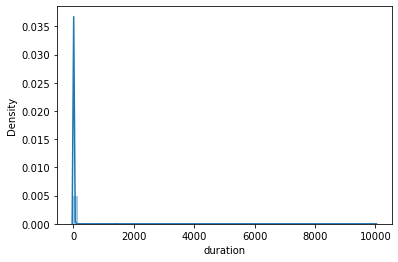

In [15]:
sns.distplot(jan_data['duration'])

In [8]:
print("The standard deviation of the trips duration in January is {:.2f}".format(jan_data.duration.std()))

The standard deviation of the trips duration in January is 42.59


# Q3
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [9]:
amount_of_data_with_outliers = len(jan_data.duration)
print(amount_of_data_with_outliers)
clean_jan_data = jan_data[(1<=jan_data.duration)&(jan_data.duration<=60)]
# feb
clean_feb_data = feb_data[(1<=feb_data.duration)&(feb_data.duration<=60)]

amount_of_data_wo_outliers = len(clean_jan_data)
print(amount_of_data_wo_outliers)

3066766
3009173


<AxesSubplot:xlabel='duration', ylabel='Density'>

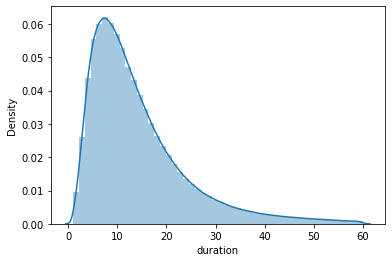

In [19]:
sns.distplot(clean_jan_data.duration)

In [10]:
print("Fraction of the records left after dropping the outliers is {:.0%}".format(amount_of_data_wo_outliers/amount_of_data_with_outliers))

Fraction of the records left after dropping the outliers is 98%


# Q4
One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

In [22]:
clean_jan_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [10]:
categorical = ['PULocationID', 'DOLocationID']

In [11]:
clean_jan_data[categorical] = clean_jan_data[categorical].astype(str)
clean_feb_data[categorical] = clean_feb_data[categorical].astype(str)

In [ ]:
clean_jan_data[categorical].dtypes

In [12]:
jan_train_dicts = clean_jan_data[categorical].to_dict(orient='records')
feb_train_dicts = clean_feb_data[categorical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer()
X_train = dv.fit_transform(jan_train_dicts)
X_val = dv.transform(feb_train_dicts)

In [ ]:
X_train.shape

# Q5
Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [1]:
target = 'duration'
y_train = clean_jan_data[target].values

NameError: name 'clean_jan_data' is not defined

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual value')
plt.legend()

In [ ]:
mean_squared_error(y_train, y_pred, squared=False)

# Q6
Evaluating the model
Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

In [2]:
y_val = clean_feb_data[target].values
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

NameError: name 'clean_feb_data' is not defined

In [1]:
# import packages
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("taxi-duration-prediction")

<Experiment: artifact_location='/workspaces/mlops-zoomcamp-2025/02-experiment-tracking/mlruns/1', creation_time=1747246172013, experiment_id='1', last_update_time=1747246172013, lifecycle_stage='active', name='taxi-duration-prediction', tags={}>

In [2]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [3]:
#Loading data
categorical = ['PULocationID', 'DOLocationID']
filename_jan = './data/yellow_tripdata_2023-01.parquet'
clean_jan_data = read_dataframe(filename_jan)

filename_feb = './data/yellow_tripdata_2023-02.parquet'
clean_feb_data = read_dataframe(filename_feb)

jan_train_dicts = clean_jan_data[categorical].to_dict(orient='records')
feb_train_dicts = clean_feb_data[categorical].to_dict(orient='records')


In [4]:
dv = DictVectorizer()
X_train = dv.fit_transform(jan_train_dicts)
print(X_train.shape)

target = 'duration'
y_train = clean_jan_data[target].values

X_val = dv.transform(feb_train_dicts)


y_val = clean_feb_data[target].values

(3009173, 515)


In [5]:
#Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Root Mean Squared Error on validation set is: {rmse}")

y_pred = lr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)
print(f"Root Mean Squared Error on train set is: {rmse_train}")


Root Mean Squared Error on validation set is: 7.8118325109416915
Root Mean Squared Error on train set is: 7.649261027855596


In [6]:
with mlflow.start_run():
    
    mlflow.set_tag("developer", "galchenkova")
    
    mlflow.log_param("train-data-path", "./data/yellow_tripdata_2023-01.parquet")
    mlflow.log_param("valid-data-path", "./data/yellow_tripdata_2023-02.parquet")
    
    alpha = 0.05
    mlflow.log_param("alpha", alpha)
    #Lasso model
    lr = Lasso(alpha)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(f"Root Mean Squared Error on validation set is: {rmse}")
    mlflow.log_metric("rmse", rmse)
    
    y_pred = lr.predict(X_train)
    rmse_train = mean_squared_error(y_train, y_pred, squared=False)
    print(f"Root Mean Squared Error on train set is: {rmse_train}")
   
    import pickle
    with open('models/lasso.bin', 'wb') as f_out:
        pickle.dump((dv, lr), f_out)
    mlflow.log_artifact(local_path="models/lasso.bin", artifact_path="models_pickle")

Root Mean Squared Error on validation set is: 8.573091269228051
Root Mean Squared Error on train set is: 8.442639920909885


In [7]:
import xgboost as xgb

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
        

In [8]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [9]:

def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [ ]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

[0]	validation-rmse:8.33365                                                                                                              
[1]	validation-rmse:6.88632                                                                                                              
[2]	validation-rmse:6.44097                                                                                                              
[3]	validation-rmse:5.87334                                                                                                              
[4]	validation-rmse:5.75997                                                                                                              
[5]	validation-rmse:5.59912                                                                                                              
[6]	validation-rmse:5.55821                                                                                                              
[7]	validation-rmse:5.52918       

[59]	validation-rmse:5.20079                                                                                                             
[60]	validation-rmse:5.20071                                                                                                             
[61]	validation-rmse:5.20064                                                                                                             
[62]	validation-rmse:5.20065                                                                                                             
[63]	validation-rmse:5.20060                                                                                                             
[64]	validation-rmse:5.20044                                                                                                             
[65]	validation-rmse:5.20045                                                                                                             
[66]	validation-rmse:5.20038      

[118]	validation-rmse:5.19822                                                                                                            
[119]	validation-rmse:5.19822                                                                                                            
[120]	validation-rmse:5.19837                                                                                                            
[121]	validation-rmse:5.19841                                                                                                            
[122]	validation-rmse:5.19838                                                                                                            
[123]	validation-rmse:5.19835                                                                                                            
[124]	validation-rmse:5.19832                                                                                                            
[125]	validation-rmse:5.19836     

[177]	validation-rmse:5.19652                                                                                                            
[178]	validation-rmse:5.19652                                                                                                            
[179]	validation-rmse:5.19652                                                                                                            
[180]	validation-rmse:5.19648                                                                                                            
[181]	validation-rmse:5.19651                                                                                                            
[182]	validation-rmse:5.19652                                                                                                            
[183]	validation-rmse:5.19646                                                                                                            
[184]	validation-rmse:5.19643     

[242]	validation-rmse:5.19437                                                                                                            
[243]	validation-rmse:5.19436                                                                                                            
[244]	validation-rmse:5.19445                                                                                                            
[245]	validation-rmse:5.19419                                                                                                            
[246]	validation-rmse:5.19399                                                                                                            
[247]	validation-rmse:5.19419                                                                                                            
[248]	validation-rmse:5.19419                                                                                                            
[249]	validation-rmse:5.19414     

[301]	validation-rmse:5.19324                                                                                                            
[302]	validation-rmse:5.19325                                                                                                            
[303]	validation-rmse:5.19327                                                                                                            
[304]	validation-rmse:5.19321                                                                                                            
[305]	validation-rmse:5.19319                                                                                                            
[306]	validation-rmse:5.19320                                                                                                            
[307]	validation-rmse:5.19320                                                                                                            
[308]	validation-rmse:5.19316     

[360]	validation-rmse:5.19237                                                                                                            
[361]	validation-rmse:5.19250                                                                                                            
[362]	validation-rmse:5.19236                                                                                                            
[363]	validation-rmse:5.19224                                                                                                            
[364]	validation-rmse:5.19220                                                                                                            
[365]	validation-rmse:5.19217                                                                                                            
[366]	validation-rmse:5.19215                                                                                                            
[367]	validation-rmse:5.19213     

[419]	validation-rmse:5.19134                                                                                                            
[420]	validation-rmse:5.19133                                                                                                            
[421]	validation-rmse:5.19126                                                                                                            
[422]	validation-rmse:5.19128                                                                                                            
[423]	validation-rmse:5.19132                                                                                                            
[424]	validation-rmse:5.19129                                                                                                            
[425]	validation-rmse:5.19120                                                                                                            
[426]	validation-rmse:5.19103     

[478]	validation-rmse:5.19081                                                                                                            
[479]	validation-rmse:5.19078                                                                                                            
[480]	validation-rmse:5.19079                                                                                                            
[481]	validation-rmse:5.19076                                                                                                            
[482]	validation-rmse:5.19072                                                                                                            
[483]	validation-rmse:5.19074                                                                                                            
[484]	validation-rmse:5.19071                                                                                                            
[485]	validation-rmse:5.19075     

[537]	validation-rmse:5.19005                                                                                                            
[538]	validation-rmse:5.19006                                                                                                            
[539]	validation-rmse:5.19004                                                                                                            
[540]	validation-rmse:5.18990                                                                                                            
[541]	validation-rmse:5.18987                                                                                                            
[542]	validation-rmse:5.18985                                                                                                            
[543]	validation-rmse:5.18985                                                                                                            
[544]	validation-rmse:5.18989     

[596]	validation-rmse:5.18966                                                                                                            
[597]	validation-rmse:5.18961                                                                                                            
[598]	validation-rmse:5.18960                                                                                                            
[599]	validation-rmse:5.18966                                                                                                            
[600]	validation-rmse:5.18962                                                                                                            
[601]	validation-rmse:5.18963                                                                                                            
[602]	validation-rmse:5.18961                                                                                                            
[603]	validation-rmse:5.18957     

[655]	validation-rmse:5.18917                                                                                                            
[656]	validation-rmse:5.18926                                                                                                            
[657]	validation-rmse:5.18926                                                                                                            
[658]	validation-rmse:5.18919                                                                                                            
[659]	validation-rmse:5.18920                                                                                                            
[660]	validation-rmse:5.18912                                                                                                            
[661]	validation-rmse:5.18914                                                                                                            
[662]	validation-rmse:5.18915     

[714]	validation-rmse:5.18860                                                                                                            
[715]	validation-rmse:5.18857                                                                                                            
[716]	validation-rmse:5.18855                                                                                                            
[717]	validation-rmse:5.18861                                                                                                            
[718]	validation-rmse:5.18852                                                                                                            
[719]	validation-rmse:5.18853                                                                                                            
[720]	validation-rmse:5.18853                                                                                                            
[721]	validation-rmse:5.18853     

[773]	validation-rmse:5.18833                                                                                                            
[774]	validation-rmse:5.18831                                                                                                            
[775]	validation-rmse:5.18834                                                                                                            
[776]	validation-rmse:5.18830                                                                                                            
[777]	validation-rmse:5.18829                                                                                                            
[778]	validation-rmse:5.18824                                                                                                            
[779]	validation-rmse:5.18824                                                                                                            
[780]	validation-rmse:5.18823     

[832]	validation-rmse:5.18785                                                                                                            
[833]	validation-rmse:5.18784                                                                                                            
[834]	validation-rmse:5.18786                                                                                                            
[835]	validation-rmse:5.18782                                                                                                            
[836]	validation-rmse:5.18784                                                                                                            
[837]	validation-rmse:5.18790                                                                                                            
[838]	validation-rmse:5.18787                                                                                                            
[839]	validation-rmse:5.18796     

[891]	validation-rmse:5.18748                                                                                                            
[892]	validation-rmse:5.18745                                                                                                            
[893]	validation-rmse:5.18743                                                                                                            
[894]	validation-rmse:5.18747                                                                                                            
[895]	validation-rmse:5.18744                                                                                                            
[896]	validation-rmse:5.18747                                                                                                            
[897]	validation-rmse:5.18750                                                                                                            
[898]	validation-rmse:5.18744     

[950]	validation-rmse:5.18712                                                                                                            
[951]	validation-rmse:5.18711                                                                                                            
[952]	validation-rmse:5.18714                                                                                                            
[953]	validation-rmse:5.18712                                                                                                            
[954]	validation-rmse:5.18714                                                                                                            
[955]	validation-rmse:5.18720                                                                                                            
[956]	validation-rmse:5.18720                                                                                                            
[957]	validation-rmse:5.18719     

[10]	validation-rmse:6.82373                                                                                                             
[11]	validation-rmse:6.76482                                                                                                             
[12]	validation-rmse:6.59201                                                                                                             
[13]	validation-rmse:6.45575                                                                                                             
[14]	validation-rmse:6.42412                                                                                                             
[15]	validation-rmse:6.39627                                                                                                             
[16]	validation-rmse:6.36758                                                                                                             
[17]	validation-rmse:6.28364      

[69]	validation-rmse:5.45525                                                                                                             
[70]	validation-rmse:5.45417                                                                                                             
[71]	validation-rmse:5.44853                                                                                                             
[72]	validation-rmse:5.44563                                                                                                             
[73]	validation-rmse:5.43241                                                                                                             
[74]	validation-rmse:5.43125                                                                                                             
[75]	validation-rmse:5.42954                                                                                                             
[76]	validation-rmse:5.40926      

[128]	validation-rmse:5.27705                                                                                                            
[129]	validation-rmse:5.27336                                                                                                            
[130]	validation-rmse:5.27277                                                                                                            
[131]	validation-rmse:5.26969                                                                                                            
[132]	validation-rmse:5.26928                                                                                                            
[133]	validation-rmse:5.26912                                                                                                            
[134]	validation-rmse:5.26853                                                                                                            
[135]	validation-rmse:5.26815     

[187]	validation-rmse:5.24075                                                                                                            
[188]	validation-rmse:5.24073                                                                                                            
[189]	validation-rmse:5.24062                                                                                                            
[190]	validation-rmse:5.24059                                                                                                            
[191]	validation-rmse:5.24031                                                                                                            
[192]	validation-rmse:5.24014                                                                                                            
[193]	validation-rmse:5.23995                                                                                                            
[194]	validation-rmse:5.23976     

[246]	validation-rmse:5.23179                                                                                                            
[247]	validation-rmse:5.23176                                                                                                            
[248]	validation-rmse:5.23170                                                                                                            
[249]	validation-rmse:5.23168                                                                                                            
[250]	validation-rmse:5.23163                                                                                                            
[251]	validation-rmse:5.23160                                                                                                            
[252]	validation-rmse:5.23152                                                                                                            
[253]	validation-rmse:5.23144     

[305]	validation-rmse:5.22948                                                                                                            
[306]	validation-rmse:5.22944                                                                                                            
[307]	validation-rmse:5.22937                                                                                                            
[308]	validation-rmse:5.22935                                                                                                            
[309]	validation-rmse:5.22932                                                                                                            
[310]	validation-rmse:5.22930                                                                                                            
[311]	validation-rmse:5.22926                                                                                                            
[312]	validation-rmse:5.22925     

[364]	validation-rmse:5.22785                                                                                                            
[365]	validation-rmse:5.22780                                                                                                            
[366]	validation-rmse:5.22776                                                                                                            
[367]	validation-rmse:5.22774                                                                                                            
[368]	validation-rmse:5.22772                                                                                                            
[369]	validation-rmse:5.22770                                                                                                            
[370]	validation-rmse:5.22763                                                                                                            
[371]	validation-rmse:5.22762     

[423]	validation-rmse:5.22585                                                                                                            
[424]	validation-rmse:5.22593                                                                                                            
[425]	validation-rmse:5.22585                                                                                                            
[426]	validation-rmse:5.22579                                                                                                            
[427]	validation-rmse:5.22567                                                                                                            
[428]	validation-rmse:5.22572                                                                                                            
[429]	validation-rmse:5.22561                                                                                                            
[430]	validation-rmse:5.22563     

[482]	validation-rmse:5.22373                                                                                                            
[483]	validation-rmse:5.22359                                                                                                            
[484]	validation-rmse:5.22357                                                                                                            
[485]	validation-rmse:5.22362                                                                                                            
[486]	validation-rmse:5.22354                                                                                                            
[487]	validation-rmse:5.22359                                                                                                            
[488]	validation-rmse:5.22346                                                                                                            
[489]	validation-rmse:5.22341     

[541]	validation-rmse:5.22245                                                                                                            
[542]	validation-rmse:5.22238                                                                                                            
[543]	validation-rmse:5.22240                                                                                                            
[544]	validation-rmse:5.22232                                                                                                            
[545]	validation-rmse:5.22230                                                                                                            
[546]	validation-rmse:5.22230                                                                                                            
[547]	validation-rmse:5.22227                                                                                                            
[548]	validation-rmse:5.22230     

[600]	validation-rmse:5.22144                                                                                                            
[601]	validation-rmse:5.22142                                                                                                            
[602]	validation-rmse:5.22141                                                                                                            
[603]	validation-rmse:5.22140                                                                                                            
[604]	validation-rmse:5.22136                                                                                                            
[605]	validation-rmse:5.22135                                                                                                            
[606]	validation-rmse:5.22134                                                                                                            
[607]	validation-rmse:5.22133     

[659]	validation-rmse:5.22047                                                                                                            
[660]	validation-rmse:5.22044                                                                                                            
[661]	validation-rmse:5.22043                                                                                                            
[662]	validation-rmse:5.22040                                                                                                            
[663]	validation-rmse:5.22041                                                                                                            
[664]	validation-rmse:5.22038                                                                                                            
[665]	validation-rmse:5.22036                                                                                                            
[666]	validation-rmse:5.22033     

[718]	validation-rmse:5.21961                                                                                                            
[719]	validation-rmse:5.21958                                                                                                            
[720]	validation-rmse:5.21958                                                                                                            
[721]	validation-rmse:5.21956                                                                                                            
[722]	validation-rmse:5.21955                                                                                                            
[723]	validation-rmse:5.21960                                                                                                            
[724]	validation-rmse:5.21957                                                                                                            
[725]	validation-rmse:5.21955     

[777]	validation-rmse:5.21878                                                                                                            
[778]	validation-rmse:5.21877                                                                                                            
[779]	validation-rmse:5.21880                                                                                                            
[780]	validation-rmse:5.21878                                                                                                            
[781]	validation-rmse:5.21862                                                                                                            
[782]	validation-rmse:5.21857                                                                                                            
[783]	validation-rmse:5.21856                                                                                                            
[784]	validation-rmse:5.21856     

[836]	validation-rmse:5.21787                                                                                                            
[837]	validation-rmse:5.21787                                                                                                            
[838]	validation-rmse:5.21787                                                                                                            
[839]	validation-rmse:5.21785                                                                                                            
[840]	validation-rmse:5.21784                                                                                                            
[841]	validation-rmse:5.21784                                                                                                            
[842]	validation-rmse:5.21783                                                                                                            
[843]	validation-rmse:5.21782     

[895]	validation-rmse:5.21729                                                                                                            
[896]	validation-rmse:5.21729                                                                                                            
[897]	validation-rmse:5.21728                                                                                                            
[898]	validation-rmse:5.21728                                                                                                            
[899]	validation-rmse:5.21727                                                                                                            
[900]	validation-rmse:5.21726                                                                                                            
[901]	validation-rmse:5.21727                                                                                                            
[902]	validation-rmse:5.21726     

[954]	validation-rmse:5.21680                                                                                                            
[955]	validation-rmse:5.21680                                                                                                            
[956]	validation-rmse:5.21680                                                                                                            
[957]	validation-rmse:5.21672                                                                                                            
[958]	validation-rmse:5.21671                                                                                                            
[959]	validation-rmse:5.21669                                                                                                            
[960]	validation-rmse:5.21665                                                                                                            
[961]	validation-rmse:5.21664     

[13]	validation-rmse:5.71826                                                                                                             
[14]	validation-rmse:5.62730                                                                                                             
[15]	validation-rmse:5.60140                                                                                                             
[16]	validation-rmse:5.53109                                                                                                             
[17]	validation-rmse:5.51328                                                                                                             
[18]	validation-rmse:5.46184                                                                                                             
[19]	validation-rmse:5.44917                                                                                                             
[20]	validation-rmse:5.40961      

[72]	validation-rmse:5.20761                                                                                                             
[73]	validation-rmse:5.20671                                                                                                             
[74]	validation-rmse:5.20669                                                                                                             
[75]	validation-rmse:5.20666                                                                                                             
[76]	validation-rmse:5.20463                                                                                                             
[77]	validation-rmse:5.20463                                                                                                             
[78]	validation-rmse:5.20464                                                                                                             
[79]	validation-rmse:5.20336      

[131]	validation-rmse:5.19588                                                                                                            
[132]	validation-rmse:5.19591                                                                                                            
[133]	validation-rmse:5.19576                                                                                                            
[134]	validation-rmse:5.19578                                                                                                            
[135]	validation-rmse:5.19560                                                                                                            
[136]	validation-rmse:5.19554                                                                                                            
[137]	validation-rmse:5.19555                                                                                                            
[138]	validation-rmse:5.19557     

[190]	validation-rmse:5.19555                                                                                                            
[191]	validation-rmse:5.19556                                                                                                            
[192]	validation-rmse:5.19556                                                                                                            
[193]	validation-rmse:5.19557                                                                                                            
[194]	validation-rmse:5.19558                                                                                                            
[195]	validation-rmse:5.19559                                                                                                            
[196]	validation-rmse:5.19560                                                                                                            
[197]	validation-rmse:5.19561     

[39]	validation-rmse:5.20914                                                                                                             
[40]	validation-rmse:5.20918                                                                                                             
[41]	validation-rmse:5.20910                                                                                                             
[42]	validation-rmse:5.20900                                                                                                             
[43]	validation-rmse:5.20906                                                                                                             
[44]	validation-rmse:5.20905                                                                                                             
[45]	validation-rmse:5.20909                                                                                                             
[46]	validation-rmse:5.20907      

[5]	validation-rmse:8.06568                                                                                                              
[6]	validation-rmse:7.96790                                                                                                              
[7]	validation-rmse:7.89506                                                                                                              
[8]	validation-rmse:7.79062                                                                                                              
[9]	validation-rmse:7.74465                                                                                                              
[10]	validation-rmse:7.71007                                                                                                             
[11]	validation-rmse:7.66738                                                                                                             
[12]	validation-rmse:7.63364      

[79]	validation-rmse:6.57996                                                                                                             
[80]	validation-rmse:6.56038                                                                                                             
[81]	validation-rmse:6.53427                                                                                                             
[82]	validation-rmse:6.50591                                                                                                             
[83]	validation-rmse:6.50358                                                                                                             
[84]	validation-rmse:6.49917                                                                                                             
[85]	validation-rmse:6.49780                                                                                                             
[86]	validation-rmse:6.48434      

[138]	validation-rmse:6.16957                                                                                                            
[139]	validation-rmse:6.16835                                                                                                            
[140]	validation-rmse:6.16527                                                                                                            
[141]	validation-rmse:6.16363                                                                                                            
[142]	validation-rmse:6.15810                                                                                                            
[143]	validation-rmse:6.15634                                                                                                            
[144]	validation-rmse:6.15498                                                                                                            
[145]	validation-rmse:6.14847     

[197]	validation-rmse:5.86678                                                                                                            
[198]	validation-rmse:5.86211                                                                                                            
[199]	validation-rmse:5.86166                                                                                                            
[200]	validation-rmse:5.86056                                                                                                            
[201]	validation-rmse:5.86014                                                                                                            
[202]	validation-rmse:5.85936                                                                                                            
[203]	validation-rmse:5.85725                                                                                                            
[204]	validation-rmse:5.85353     

[256]	validation-rmse:5.74078                                                                                                            
[257]	validation-rmse:5.73962                                                                                                            
[258]	validation-rmse:5.73887                                                                                                            
[259]	validation-rmse:5.73865                                                                                                            
[260]	validation-rmse:5.73257                                                                                                            
[261]	validation-rmse:5.72098                                                                                                            
[262]	validation-rmse:5.71166                                                                                                            
[263]	validation-rmse:5.70591     

[315]	validation-rmse:5.63224                                                                                                            
[316]	validation-rmse:5.62471                                                                                                            
[317]	validation-rmse:5.61974                                                                                                            
[318]	validation-rmse:5.61604                                                                                                            
[319]	validation-rmse:5.61316                                                                                                            
[320]	validation-rmse:5.60782                                                                                                            
[321]	validation-rmse:5.60298                                                                                                            
[322]	validation-rmse:5.59706     

[374]	validation-rmse:5.48385                                                                                                            
[375]	validation-rmse:5.48055                                                                                                            
[376]	validation-rmse:5.47632                                                                                                            
[377]	validation-rmse:5.47316                                                                                                            
[378]	validation-rmse:5.47035                                                                                                            
[379]	validation-rmse:5.46900                                                                                                            
[380]	validation-rmse:5.46542                                                                                                            
[381]	validation-rmse:5.46500     

[433]	validation-rmse:5.42315                                                                                                            
[434]	validation-rmse:5.42224                                                                                                            
[435]	validation-rmse:5.42194                                                                                                            
[436]	validation-rmse:5.42161                                                                                                            
[437]	validation-rmse:5.42148                                                                                                            
[438]	validation-rmse:5.42123                                                                                                            
[439]	validation-rmse:5.42084                                                                                                            
[440]	validation-rmse:5.42072     

[492]	validation-rmse:5.36947                                                                                                            
[493]	validation-rmse:5.36843                                                                                                            
[494]	validation-rmse:5.36776                                                                                                            
[495]	validation-rmse:5.36732                                                                                                            
[496]	validation-rmse:5.36573                                                                                                            
[497]	validation-rmse:5.36427                                                                                                            
[498]	validation-rmse:5.36314                                                                                                            
[499]	validation-rmse:5.36186     

[551]	validation-rmse:5.33634                                                                                                            
[552]	validation-rmse:5.33625                                                                                                            
[553]	validation-rmse:5.33603                                                                                                            
[554]	validation-rmse:5.33583                                                                                                            
[555]	validation-rmse:5.33572                                                                                                            
[556]	validation-rmse:5.33510                                                                                                            
[557]	validation-rmse:5.33409                                                                                                            
[558]	validation-rmse:5.33395     

[610]	validation-rmse:5.31953                                                                                                            
[611]	validation-rmse:5.31941                                                                                                            
[612]	validation-rmse:5.31937                                                                                                            
[613]	validation-rmse:5.31935                                                                                                            
[614]	validation-rmse:5.31919                                                                                                            
[615]	validation-rmse:5.31864                                                                                                            
[616]	validation-rmse:5.31833                                                                                                            
[617]	validation-rmse:5.31788     

[669]	validation-rmse:5.30508                                                                                                            
[670]	validation-rmse:5.30505                                                                                                            
[671]	validation-rmse:5.30493                                                                                                            
[672]	validation-rmse:5.30487                                                                                                            
[673]	validation-rmse:5.30481                                                                                                            
[674]	validation-rmse:5.30481                                                                                                            
[675]	validation-rmse:5.30472                                                                                                            
[676]	validation-rmse:5.30464     

[728]	validation-rmse:5.29276                                                                                                            
[729]	validation-rmse:5.29272                                                                                                            
[730]	validation-rmse:5.29246                                                                                                            
[731]	validation-rmse:5.29225                                                                                                            
[732]	validation-rmse:5.29182                                                                                                            
[733]	validation-rmse:5.29169                                                                                                            
[734]	validation-rmse:5.29155                                                                                                            
[735]	validation-rmse:5.29146     

[787]	validation-rmse:5.28928                                                                                                            
[788]	validation-rmse:5.28928                                                                                                            
[789]	validation-rmse:5.28923                                                                                                            
[790]	validation-rmse:5.28923                                                                                                            
[791]	validation-rmse:5.28923                                                                                                            
[792]	validation-rmse:5.28922                                                                                                            
[793]	validation-rmse:5.28921                                                                                                            
[794]	validation-rmse:5.28920     

[846]	validation-rmse:5.28886                                                                                                            
[847]	validation-rmse:5.28885                                                                                                            
[848]	validation-rmse:5.28886                                                                                                            
[849]	validation-rmse:5.28885                                                                                                            
[850]	validation-rmse:5.28885                                                                                                            
[851]	validation-rmse:5.28883                                                                                                            
[852]	validation-rmse:5.28883                                                                                                            
[853]	validation-rmse:5.28883     

[905]	validation-rmse:5.28856                                                                                                            
[906]	validation-rmse:5.28855                                                                                                            
[907]	validation-rmse:5.28855                                                                                                            
[908]	validation-rmse:5.28853                                                                                                            
[909]	validation-rmse:5.28853                                                                                                            
[910]	validation-rmse:5.28852                                                                                                            
[911]	validation-rmse:5.28852                                                                                                            
[912]	validation-rmse:5.28852     

[964]	validation-rmse:5.28821                                                                                                            
[965]	validation-rmse:5.28822                                                                                                            
[966]	validation-rmse:5.28821                                                                                                            
[967]	validation-rmse:5.28821                                                                                                            
[968]	validation-rmse:5.28820                                                                                                            
[969]	validation-rmse:5.28821                                                                                                            
[970]	validation-rmse:5.28820                                                                                                            
[971]	validation-rmse:5.28820     

[23]	validation-rmse:5.21186                                                                                                             
[24]	validation-rmse:5.21086                                                                                                             
[25]	validation-rmse:5.20977                                                                                                             
[26]	validation-rmse:5.20952                                                                                                             
[27]	validation-rmse:5.20907                                                                                                             
[28]	validation-rmse:5.20888                                                                                                             
[29]	validation-rmse:5.20859                                                                                                             
[30]	validation-rmse:5.20839      

[82]	validation-rmse:5.20484                                                                                                             
[83]	validation-rmse:5.20505                                                                                                             
[84]	validation-rmse:5.20506                                                                                                             
[85]	validation-rmse:5.20506                                                                                                             
[86]	validation-rmse:5.20497                                                                                                             
[87]	validation-rmse:5.20496                                                                                                             
[88]	validation-rmse:5.20488                                                                                                             
[89]	validation-rmse:5.20478      

[141]	validation-rmse:5.20173                                                                                                            
[142]	validation-rmse:5.20216                                                                                                            
[143]	validation-rmse:5.20216                                                                                                            
[144]	validation-rmse:5.20214                                                                                                            
[145]	validation-rmse:5.20209                                                                                                            
[146]	validation-rmse:5.20203                                                                                                            
[147]	validation-rmse:5.20197                                                                                                            
[148]	validation-rmse:5.20196     

[200]	validation-rmse:5.19988                                                                                                            
[201]	validation-rmse:5.19990                                                                                                            
[202]	validation-rmse:5.19984                                                                                                            
[203]	validation-rmse:5.19982                                                                                                            
[204]	validation-rmse:5.19979                                                                                                            
[205]	validation-rmse:5.19980                                                                                                            
[206]	validation-rmse:5.19988                                                                                                            
[207]	validation-rmse:5.19985     

[259]	validation-rmse:5.19861                                                                                                            
[260]	validation-rmse:5.19859                                                                                                            
[261]	validation-rmse:5.19857                                                                                                            
[262]	validation-rmse:5.19854                                                                                                            
[263]	validation-rmse:5.19857                                                                                                            
[264]	validation-rmse:5.19859                                                                                                            
[265]	validation-rmse:5.19849                                                                                                            
[266]	validation-rmse:5.19859     

[318]	validation-rmse:5.19715                                                                                                            
[319]	validation-rmse:5.19697                                                                                                            
[320]	validation-rmse:5.19699                                                                                                            
[321]	validation-rmse:5.19692                                                                                                            
[322]	validation-rmse:5.19687                                                                                                            
[323]	validation-rmse:5.19688                                                                                                            
[324]	validation-rmse:5.19684                                                                                                            
[325]	validation-rmse:5.19684     

[377]	validation-rmse:5.19633                                                                                                            
[378]	validation-rmse:5.19631                                                                                                            
[379]	validation-rmse:5.19626                                                                                                            
[380]	validation-rmse:5.19623                                                                                                            
[381]	validation-rmse:5.19624                                                                                                            
[382]	validation-rmse:5.19609                                                                                                            
[383]	validation-rmse:5.19613                                                                                                            
[384]	validation-rmse:5.19623     

[436]	validation-rmse:5.19544                                                                                                            
[437]	validation-rmse:5.19529                                                                                                            
[438]	validation-rmse:5.19529                                                                                                            
[439]	validation-rmse:5.19539                                                                                                            
[440]	validation-rmse:5.19544                                                                                                            
[441]	validation-rmse:5.19542                                                                                                            
[442]	validation-rmse:5.19537                                                                                                            
[443]	validation-rmse:5.19536     

[495]	validation-rmse:5.19495                                                                                                            
[496]	validation-rmse:5.19479                                                                                                            
[497]	validation-rmse:5.19481                                                                                                            
[498]	validation-rmse:5.19477                                                                                                            
[499]	validation-rmse:5.19486                                                                                                            
[500]	validation-rmse:5.19484                                                                                                            
[501]	validation-rmse:5.19489                                                                                                            
[502]	validation-rmse:5.19481     

[22]	validation-rmse:5.88317                                                                                                             
[23]	validation-rmse:5.86296                                                                                                             
[24]	validation-rmse:5.84557                                                                                                             
[25]	validation-rmse:5.77459                                                                                                             
[26]	validation-rmse:5.76082                                                                                                             
[27]	validation-rmse:5.70475                                                                                                             
[28]	validation-rmse:5.69360                                                                                                             
[29]	validation-rmse:5.68290      

[81]	validation-rmse:5.26818                                                                                                             
[82]	validation-rmse:5.26236                                                                                                             
[83]	validation-rmse:5.26152                                                                                                             
[84]	validation-rmse:5.26101                                                                                                             
[85]	validation-rmse:5.26020                                                                                                             
[86]	validation-rmse:5.25946                                                                                                             
[87]	validation-rmse:5.25510                                                                                                             
[88]	validation-rmse:5.25486      

[140]	validation-rmse:5.21620                                                                                                            
[141]	validation-rmse:5.21618                                                                                                            
[142]	validation-rmse:5.21571                                                                                                            
[143]	validation-rmse:5.21431                                                                                                            
[144]	validation-rmse:5.21427                                                                                                            
[145]	validation-rmse:5.21399                                                                                                            
[146]	validation-rmse:5.21400                                                                                                            
[147]	validation-rmse:5.21380     

[199]	validation-rmse:5.20213                                                                                                            
[200]	validation-rmse:5.20198                                                                                                            
[201]	validation-rmse:5.20196                                                                                                            
[202]	validation-rmse:5.20194                                                                                                            
[203]	validation-rmse:5.20192                                                                                                            
[204]	validation-rmse:5.20193                                                                                                            
[205]	validation-rmse:5.20174                                                                                                            
[206]	validation-rmse:5.20174     

[258]	validation-rmse:5.19938                                                                                                            
[259]	validation-rmse:5.19938                                                                                                            
[260]	validation-rmse:5.19938                                                                                                            
[261]	validation-rmse:5.19939                                                                                                            
[262]	validation-rmse:5.19933                                                                                                            
[263]	validation-rmse:5.19927                                                                                                            
[264]	validation-rmse:5.19923                                                                                                            
[265]	validation-rmse:5.19915     

[317]	validation-rmse:5.19893                                                                                                            
[318]	validation-rmse:5.19893                                                                                                            
[319]	validation-rmse:5.19891                                                                                                            
[320]	validation-rmse:5.19891                                                                                                            
[321]	validation-rmse:5.19891                                                                                                            
[322]	validation-rmse:5.19892                                                                                                            
[323]	validation-rmse:5.19893                                                                                                            
[324]	validation-rmse:5.19893     

[376]	validation-rmse:5.19893                                                                                                            
[377]	validation-rmse:5.19893                                                                                                            
[378]	validation-rmse:5.19893                                                                                                            
[379]	validation-rmse:5.19893                                                                                                            
[380]	validation-rmse:5.19893                                                                                                            
[381]	validation-rmse:5.19893                                                                                                            
[382]	validation-rmse:5.19893                                                                                                            
[383]	validation-rmse:5.19893     

[48]	validation-rmse:5.27648                                                                                                             
[49]	validation-rmse:5.27706                                                                                                             
[50]	validation-rmse:5.27580                                                                                                             
[51]	validation-rmse:5.27508                                                                                                             
[52]	validation-rmse:5.27562                                                                                                             
[53]	validation-rmse:5.27524                                                                                                             
[54]	validation-rmse:5.27374                                                                                                             
[55]	validation-rmse:5.27297      

[107]	validation-rmse:5.25346                                                                                                            
[108]	validation-rmse:5.25335                                                                                                            
[109]	validation-rmse:5.25369                                                                                                            
[110]	validation-rmse:5.25325                                                                                                            
[111]	validation-rmse:5.25299                                                                                                            
[112]	validation-rmse:5.25269                                                                                                            
[113]	validation-rmse:5.25274                                                                                                            
[114]	validation-rmse:5.25224     

[166]	validation-rmse:5.24118                                                                                                            
[167]	validation-rmse:5.24086                                                                                                            
[168]	validation-rmse:5.24062                                                                                                            
[169]	validation-rmse:5.24034                                                                                                            
[170]	validation-rmse:5.23987                                                                                                            
[171]	validation-rmse:5.23984                                                                                                            
[172]	validation-rmse:5.23977                                                                                                            
[173]	validation-rmse:5.23967     

[225]	validation-rmse:5.23025                                                                                                            
[226]	validation-rmse:5.23009                                                                                                            
[227]	validation-rmse:5.23004                                                                                                            
[228]	validation-rmse:5.23003                                                                                                            
[229]	validation-rmse:5.22984                                                                                                            
[230]	validation-rmse:5.22975                                                                                                            
[231]	validation-rmse:5.22966                                                                                                            
[232]	validation-rmse:5.22957     

[284]	validation-rmse:5.21627                                                                                                            
[285]	validation-rmse:5.21615                                                                                                            
[286]	validation-rmse:5.21461                                                                                                            
[287]	validation-rmse:5.21433                                                                                                            
[288]	validation-rmse:5.21420                                                                                                            
[289]	validation-rmse:5.21402                                                                                                            
[290]	validation-rmse:5.21303                                                                                                            
[291]	validation-rmse:5.21301     

[343]	validation-rmse:5.20638                                                                                                            
[344]	validation-rmse:5.20605                                                                                                            
[345]	validation-rmse:5.20641                                                                                                            
[346]	validation-rmse:5.20601                                                                                                            
[347]	validation-rmse:5.20616                                                                                                            
[348]	validation-rmse:5.20615                                                                                                            
[349]	validation-rmse:5.20608                                                                                                            
[350]	validation-rmse:5.20599     

[402]	validation-rmse:5.20139                                                                                                            
[403]	validation-rmse:5.20135                                                                                                            
[404]	validation-rmse:5.20166                                                                                                            
[405]	validation-rmse:5.20167                                                                                                            
[406]	validation-rmse:5.20130                                                                                                            
[407]	validation-rmse:5.20121                                                                                                            
[408]	validation-rmse:5.20140                                                                                                            
[409]	validation-rmse:5.20112     

[461]	validation-rmse:5.19757                                                                                                            
[462]	validation-rmse:5.19751                                                                                                            
[463]	validation-rmse:5.19746                                                                                                            
[464]	validation-rmse:5.19741                                                                                                            
[465]	validation-rmse:5.19733                                                                                                            
[466]	validation-rmse:5.19726                                                                                                            
[467]	validation-rmse:5.19716                                                                                                            
[468]	validation-rmse:5.19738     

[520]	validation-rmse:5.19480                                                                                                            
[521]	validation-rmse:5.19478                                                                                                            
[522]	validation-rmse:5.19481                                                                                                            
[523]	validation-rmse:5.19470                                                                                                            
[524]	validation-rmse:5.19469                                                                                                            
[525]	validation-rmse:5.19466                                                                                                            
[526]	validation-rmse:5.19457                                                                                                            
[527]	validation-rmse:5.19471     

[579]	validation-rmse:5.19212                                                                                                            
[580]	validation-rmse:5.19208                                                                                                            
[581]	validation-rmse:5.19209                                                                                                            
[582]	validation-rmse:5.19206                                                                                                            
[583]	validation-rmse:5.19201                                                                                                            
[584]	validation-rmse:5.19194                                                                                                            
[585]	validation-rmse:5.19189                                                                                                            
[586]	validation-rmse:5.19193     

[638]	validation-rmse:5.19025                                                                                                            
[639]	validation-rmse:5.19024                                                                                                            
[640]	validation-rmse:5.19041                                                                                                            
[641]	validation-rmse:5.19034                                                                                                            
[642]	validation-rmse:5.19015                                                                                                            
[643]	validation-rmse:5.19012                                                                                                            
[644]	validation-rmse:5.19028                                                                                                            
[645]	validation-rmse:5.19028     

[697]	validation-rmse:5.18876                                                                                                            
[698]	validation-rmse:5.18876                                                                                                            
[699]	validation-rmse:5.18894                                                                                                            
[700]	validation-rmse:5.18890                                                                                                            
[701]	validation-rmse:5.18872                                                                                                            
[702]	validation-rmse:5.18872                                                                                                            
[703]	validation-rmse:5.18869                                                                                                            
[704]	validation-rmse:5.18863     

[756]	validation-rmse:5.18750                                                                                                            
[757]	validation-rmse:5.18754                                                                                                            
[758]	validation-rmse:5.18748                                                                                                            
[759]	validation-rmse:5.18745                                                                                                            
[760]	validation-rmse:5.18742                                                                                                            
[761]	validation-rmse:5.18742                                                                                                            
[762]	validation-rmse:5.18744                                                                                                            
[763]	validation-rmse:5.18742     

[815]	validation-rmse:5.18642                                                                                                            
[816]	validation-rmse:5.18641                                                                                                            
[817]	validation-rmse:5.18633                                                                                                            
[818]	validation-rmse:5.18632                                                                                                            
[819]	validation-rmse:5.18631                                                                                                            
[820]	validation-rmse:5.18626                                                                                                            
[821]	validation-rmse:5.18624                                                                                                            
[822]	validation-rmse:5.18625     

[874]	validation-rmse:5.18502                                                                                                            
[875]	validation-rmse:5.18504                                                                                                            
[876]	validation-rmse:5.18500                                                                                                            
[877]	validation-rmse:5.18494                                                                                                            
[878]	validation-rmse:5.18496                                                                                                            
[879]	validation-rmse:5.18494                                                                                                            
[880]	validation-rmse:5.18489                                                                                                            
[881]	validation-rmse:5.18483     

[933]	validation-rmse:5.18339                                                                                                            
[934]	validation-rmse:5.18334                                                                                                            
[935]	validation-rmse:5.18346                                                                                                            
[936]	validation-rmse:5.18335                                                                                                            
[937]	validation-rmse:5.18312                                                                                                            
[938]	validation-rmse:5.18332                                                                                                            
[939]	validation-rmse:5.18330                                                                                                            
[940]	validation-rmse:5.18329     

[992]	validation-rmse:5.18241                                                                                                            
[993]	validation-rmse:5.18238                                                                                                            
[994]	validation-rmse:5.18239                                                                                                            
[995]	validation-rmse:5.18236                                                                                                            
[996]	validation-rmse:5.18236                                                                                                            
[997]	validation-rmse:5.18227                                                                                                            
[998]	validation-rmse:5.18226                                                                                                            
[999]	validation-rmse:5.18221     

[51]	validation-rmse:5.36828                                                                                                             
[52]	validation-rmse:5.36529                                                                                                             
[53]	validation-rmse:5.36402                                                                                                             
[54]	validation-rmse:5.34579                                                                                                             
[55]	validation-rmse:5.34471                                                                                                             
[56]	validation-rmse:5.34340                                                                                                             
[57]	validation-rmse:5.34142                                                                                                             
[58]	validation-rmse:5.32929      

[110]	validation-rmse:5.22260                                                                                                            
[111]	validation-rmse:5.22227                                                                                                            
[112]	validation-rmse:5.22213                                                                                                            
[113]	validation-rmse:5.22186                                                                                                            
[114]	validation-rmse:5.22159                                                                                                            
[115]	validation-rmse:5.22091                                                                                                            
[116]	validation-rmse:5.22084                                                                                                            
[117]	validation-rmse:5.22077     

[169]	validation-rmse:5.21397                                                                                                            
[170]	validation-rmse:5.21397                                                                                                            
[171]	validation-rmse:5.21395                                                                                                            
[172]	validation-rmse:5.21392                                                                                                            
[173]	validation-rmse:5.21386                                                                                                            
[174]	validation-rmse:5.21383                                                                                                            
[175]	validation-rmse:5.21380                                                                                                            
[176]	validation-rmse:5.21376     

[228]	validation-rmse:5.21144                                                                                                            
[229]	validation-rmse:5.21148                                                                                                            
[230]	validation-rmse:5.21147                                                                                                            
[231]	validation-rmse:5.21145                                                                                                            
[232]	validation-rmse:5.21141                                                                                                            
[233]	validation-rmse:5.21137                                                                                                            
[234]	validation-rmse:5.21131                                                                                                            
[235]	validation-rmse:5.21129     

[287]	validation-rmse:5.21008                                                                                                            
[288]	validation-rmse:5.20999                                                                                                            
[289]	validation-rmse:5.20995                                                                                                            
[290]	validation-rmse:5.20992                                                                                                            
[291]	validation-rmse:5.20989                                                                                                            
[292]	validation-rmse:5.20988                                                                                                            
[293]	validation-rmse:5.20984                                                                                                            
[294]	validation-rmse:5.20980     

[346]	validation-rmse:5.20830                                                                                                            
[347]	validation-rmse:5.20830                                                                                                            
[348]	validation-rmse:5.20830                                                                                                            
[349]	validation-rmse:5.20828                                                                                                            
[350]	validation-rmse:5.20819                                                                                                            
[351]	validation-rmse:5.20818                                                                                                            
[352]	validation-rmse:5.20816                                                                                                            
[353]	validation-rmse:5.20814     

[405]	validation-rmse:5.20680                                                                                                            
[406]	validation-rmse:5.20688                                                                                                            
[407]	validation-rmse:5.20679                                                                                                            
[408]	validation-rmse:5.20687                                                                                                            
[409]	validation-rmse:5.20679                                                                                                            
[410]	validation-rmse:5.20677                                                                                                            
[411]	validation-rmse:5.20682                                                                                                            
[412]	validation-rmse:5.20669     

[464]	validation-rmse:5.20564                                                                                                            
[465]	validation-rmse:5.20552                                                                                                            
[466]	validation-rmse:5.20551                                                                                                            
[467]	validation-rmse:5.20557                                                                                                            
[468]	validation-rmse:5.20554                                                                                                            
[469]	validation-rmse:5.20560                                                                                                            
[470]	validation-rmse:5.20557                                                                                                            
[471]	validation-rmse:5.20554     

[523]	validation-rmse:5.20453                                                                                                            
[524]	validation-rmse:5.20449                                                                                                            
[525]	validation-rmse:5.20448                                                                                                            
[526]	validation-rmse:5.20445                                                                                                            
[527]	validation-rmse:5.20442                                                                                                            
[528]	validation-rmse:5.20439                                                                                                            
[529]	validation-rmse:5.20438                                                                                                            
[530]	validation-rmse:5.20436     

[582]	validation-rmse:5.20342                                                                                                            
[583]	validation-rmse:5.20340                                                                                                            
[584]	validation-rmse:5.20338                                                                                                            
[585]	validation-rmse:5.20335                                                                                                            
[586]	validation-rmse:5.20334                                                                                                            
[587]	validation-rmse:5.20332                                                                                                            
[588]	validation-rmse:5.20333                                                                                                            
[589]	validation-rmse:5.20327     

[641]	validation-rmse:5.20217                                                                                                            
[642]	validation-rmse:5.20216                                                                                                            
[643]	validation-rmse:5.20214                                                                                                            
[644]	validation-rmse:5.20219                                                                                                            
[645]	validation-rmse:5.20208                                                                                                            
[646]	validation-rmse:5.20209                                                                                                            
[647]	validation-rmse:5.20207                                                                                                            
[648]	validation-rmse:5.20203     

[700]	validation-rmse:5.20096                                                                                                            
[701]	validation-rmse:5.20101                                                                                                            
[702]	validation-rmse:5.20101                                                                                                            
[703]	validation-rmse:5.20097                                                                                                            
[704]	validation-rmse:5.20087                                                                                                            
[705]	validation-rmse:5.20092                                                                                                            
[706]	validation-rmse:5.20084                                                                                                            
[707]	validation-rmse:5.20090     

[759]	validation-rmse:5.20051                                                                                                            
[760]	validation-rmse:5.20052                                                                                                            
[761]	validation-rmse:5.20051                                                                                                            
[762]	validation-rmse:5.20049                                                                                                            
[763]	validation-rmse:5.20048                                                                                                            
[764]	validation-rmse:5.20049                                                                                                            
[765]	validation-rmse:5.20048                                                                                                            
[766]	validation-rmse:5.20047     

[818]	validation-rmse:5.19984                                                                                                            
[819]	validation-rmse:5.19985                                                                                                            
[820]	validation-rmse:5.19984                                                                                                            
[821]	validation-rmse:5.19984                                                                                                            
[822]	validation-rmse:5.19983                                                                                                            
[823]	validation-rmse:5.19983                                                                                                            
[824]	validation-rmse:5.19981                                                                                                            
[825]	validation-rmse:5.19981     

[877]	validation-rmse:5.19899                                                                                                            
[878]	validation-rmse:5.19901                                                                                                            
[879]	validation-rmse:5.19901                                                                                                            
[880]	validation-rmse:5.19900                                                                                                            
[881]	validation-rmse:5.19899                                                                                                            
[882]	validation-rmse:5.19899                                                                                                            
[883]	validation-rmse:5.19901                                                                                                            
[884]	validation-rmse:5.19900     

[936]	validation-rmse:5.19873                                                                                                            
[937]	validation-rmse:5.19873                                                                                                            
[938]	validation-rmse:5.19870                                                                                                            
[939]	validation-rmse:5.19868                                                                                                            
[940]	validation-rmse:5.19868                                                                                                            
[941]	validation-rmse:5.19870                                                                                                            
[942]	validation-rmse:5.19872                                                                                                            
[943]	validation-rmse:5.19871     

[995]	validation-rmse:5.19833                                                                                                            
[996]	validation-rmse:5.19832                                                                                                            
[997]	validation-rmse:5.19831                                                                                                            
[998]	validation-rmse:5.19831                                                                                                            
[999]	validation-rmse:5.19829                                                                                                            
[0]	validation-rmse:8.53493                                                                                                              
[1]	validation-rmse:7.61753                                                                                                              
[2]	validation-rmse:6.64099       

[54]	validation-rmse:5.19833                                                                                                             
[55]	validation-rmse:5.19806                                                                                                             
[56]	validation-rmse:5.19820                                                                                                             
[57]	validation-rmse:5.19796                                                                                                             
[58]	validation-rmse:5.19782                                                                                                             
[59]	validation-rmse:5.19795                                                                                                             
[60]	validation-rmse:5.19795                                                                                                             
[61]	validation-rmse:5.19790      

[113]	validation-rmse:5.19485                                                                                                            
[114]	validation-rmse:5.19482                                                                                                            
[115]	validation-rmse:5.19464                                                                                                            
[116]	validation-rmse:5.19454                                                                                                            
[117]	validation-rmse:5.19445                                                                                                            
[118]	validation-rmse:5.19456                                                                                                            
[119]	validation-rmse:5.19454                                                                                                            
[120]	validation-rmse:5.19437     

[172]	validation-rmse:5.19195                                                                                                            
[173]	validation-rmse:5.19191                                                                                                            
[174]	validation-rmse:5.19188                                                                                                            
[175]	validation-rmse:5.19181                                                                                                            
[176]	validation-rmse:5.19176                                                                                                            
[177]	validation-rmse:5.19165                                                                                                            
[178]	validation-rmse:5.19161                                                                                                            
[179]	validation-rmse:5.19156     

[237]	validation-rmse:5.18868                                                                                                            
[238]	validation-rmse:5.18867                                                                                                            
[239]	validation-rmse:5.18853                                                                                                            
[240]	validation-rmse:5.18865                                                                                                            
[241]	validation-rmse:5.18848                                                                                                            
[242]	validation-rmse:5.18828                                                                                                            
[243]	validation-rmse:5.18840                                                                                                            
[244]	validation-rmse:5.18817     

[296]	validation-rmse:5.18722                                                                                                            
[297]	validation-rmse:5.18721                                                                                                            
[298]	validation-rmse:5.18720                                                                                                            
[299]	validation-rmse:5.18717                                                                                                            
[300]	validation-rmse:5.18723                                                                                                            
[301]	validation-rmse:5.18716                                                                                                            
[302]	validation-rmse:5.18716                                                                                                            
[303]	validation-rmse:5.18707     

[355]	validation-rmse:5.18531                                                                                                            
[356]	validation-rmse:5.18528                                                                                                            
[357]	validation-rmse:5.18525                                                                                                            
[358]	validation-rmse:5.18522                                                                                                            
[359]	validation-rmse:5.18524                                                                                                            
[360]	validation-rmse:5.18523                                                                                                            
[361]	validation-rmse:5.18521                                                                                                            
[362]	validation-rmse:5.18520     

[414]	validation-rmse:5.18425                                                                                                            
[415]	validation-rmse:5.18435                                                                                                            
[416]	validation-rmse:5.18424                                                                                                            
[417]	validation-rmse:5.18416                                                                                                            
[418]	validation-rmse:5.18418                                                                                                            
[419]	validation-rmse:5.18414                                                                                                            
[420]	validation-rmse:5.18394                                                                                                            
[421]	validation-rmse:5.18395     

[473]	validation-rmse:5.18312                                                                                                            
[474]	validation-rmse:5.18312                                                                                                            
[475]	validation-rmse:5.18307                                                                                                            
[476]	validation-rmse:5.18296                                                                                                            
[477]	validation-rmse:5.18301                                                                                                            
[478]	validation-rmse:5.18287                                                                                                            
[479]	validation-rmse:5.18295                                                                                                            
[480]	validation-rmse:5.18294     

[532]	validation-rmse:5.18214                                                                                                            
[533]	validation-rmse:5.18211                                                                                                            
[534]	validation-rmse:5.18208                                                                                                            
[535]	validation-rmse:5.18209                                                                                                            
[536]	validation-rmse:5.18207                                                                                                            
[537]	validation-rmse:5.18206                                                                                                            
[538]	validation-rmse:5.18205                                                                                                            
[539]	validation-rmse:5.18199     

[591]	validation-rmse:5.18111                                                                                                            
[592]	validation-rmse:5.18110                                                                                                            
[593]	validation-rmse:5.18108                                                                                                            
[594]	validation-rmse:5.18107                                                                                                            
[595]	validation-rmse:5.18108                                                                                                            
[596]	validation-rmse:5.18117                                                                                                            
[597]	validation-rmse:5.18117                                                                                                            
[598]	validation-rmse:5.18117     

[650]	validation-rmse:5.18021                                                                                                            
[651]	validation-rmse:5.18022                                                                                                            
[652]	validation-rmse:5.18021                                                                                                            
[653]	validation-rmse:5.18014                                                                                                            
[654]	validation-rmse:5.18012                                                                                                            
[655]	validation-rmse:5.18021                                                                                                            
[656]	validation-rmse:5.18019                                                                                                            
[657]	validation-rmse:5.18017     

[709]	validation-rmse:5.17956                                                                                                            
[710]	validation-rmse:5.17957                                                                                                            
[711]	validation-rmse:5.17956                                                                                                            
[712]	validation-rmse:5.17958                                                                                                            
[713]	validation-rmse:5.17964                                                                                                            
[714]	validation-rmse:5.17956                                                                                                            
[715]	validation-rmse:5.17948                                                                                                            
[716]	validation-rmse:5.17942     

[768]	validation-rmse:5.17916                                                                                                            
[769]	validation-rmse:5.17915                                                                                                            
[770]	validation-rmse:5.17914                                                                                                            
[771]	validation-rmse:5.17916                                                                                                            
[772]	validation-rmse:5.17914                                                                                                            
[773]	validation-rmse:5.17909                                                                                                            
[774]	validation-rmse:5.17899                                                                                                            
[775]	validation-rmse:5.17904     

[827]	validation-rmse:5.17863                                                                                                            
[828]	validation-rmse:5.17854                                                                                                            
[829]	validation-rmse:5.17854                                                                                                            
[830]	validation-rmse:5.17854                                                                                                            
[831]	validation-rmse:5.17854                                                                                                            
[832]	validation-rmse:5.17859                                                                                                            
[833]	validation-rmse:5.17853                                                                                                            
[834]	validation-rmse:5.17851     

[886]	validation-rmse:5.17837                                                                                                            
[887]	validation-rmse:5.17832                                                                                                            
[888]	validation-rmse:5.17831                                                                                                            
[889]	validation-rmse:5.17828                                                                                                            
[890]	validation-rmse:5.17827                                                                                                            
[891]	validation-rmse:5.17829                                                                                                            
[892]	validation-rmse:5.17830                                                                                                            
[893]	validation-rmse:5.17830     

[945]	validation-rmse:5.17734                                                                                                            
[946]	validation-rmse:5.17732                                                                                                            
[947]	validation-rmse:5.17735                                                                                                            
[948]	validation-rmse:5.17736                                                                                                            
[949]	validation-rmse:5.17736                                                                                                            
[950]	validation-rmse:5.17734                                                                                                            
[951]	validation-rmse:5.17726                                                                                                            
[952]	validation-rmse:5.17726     

[4]	validation-rmse:6.91214                                                                                                              
[5]	validation-rmse:6.74879                                                                                                              
[6]	validation-rmse:6.62170                                                                                                              
[7]	validation-rmse:6.53383                                                                                                              
[8]	validation-rmse:6.24197                                                                                                              
[9]	validation-rmse:6.18225                                                                                                              
[10]	validation-rmse:5.98977                                                                                                             
[11]	validation-rmse:5.95533      

[63]	validation-rmse:5.27057                                                                                                             
[64]	validation-rmse:5.27027                                                                                                             
[65]	validation-rmse:5.26455                                                                                                             
[66]	validation-rmse:5.25484                                                                                                             
[67]	validation-rmse:5.25397                                                                                                             
[68]	validation-rmse:5.24730                                                                                                             
[69]	validation-rmse:5.24688                                                                                                             
[70]	validation-rmse:5.24568      

[122]	validation-rmse:5.20612                                                                                                            
[123]	validation-rmse:5.20593                                                                                                            
[124]	validation-rmse:5.20592                                                                                                            
[125]	validation-rmse:5.20594                                                                                                            
[126]	validation-rmse:5.20598                                                                                                            
[127]	validation-rmse:5.20593                                                                                                            
[128]	validation-rmse:5.20580                                                                                                            
[129]	validation-rmse:5.20569     

[181]	validation-rmse:5.20391                                                                                                            
[182]	validation-rmse:5.20386                                                                                                            
[183]	validation-rmse:5.20387                                                                                                            
[184]	validation-rmse:5.20386                                                                                                            
[185]	validation-rmse:5.20387                                                                                                            
[186]	validation-rmse:5.20388                                                                                                            
[187]	validation-rmse:5.20388                                                                                                            
[188]	validation-rmse:5.20389     

[6]	validation-rmse:5.62448                                                                                                              
[7]	validation-rmse:5.54259                                                                                                              
[8]	validation-rmse:5.44663                                                                                                              
[9]	validation-rmse:5.43557                                                                                                              
[10]	validation-rmse:5.41081                                                                                                             
[11]	validation-rmse:5.39809                                                                                                             
[12]	validation-rmse:5.38146                                                                                                             
[13]	validation-rmse:5.36209      

[65]	validation-rmse:5.29974                                                                                                             
[66]	validation-rmse:5.29961                                                                                                             
[67]	validation-rmse:5.29875                                                                                                             
[68]	validation-rmse:5.29855                                                                                                             
[69]	validation-rmse:5.29824                                                                                                             
[70]	validation-rmse:5.29822                                                                                                             
[71]	validation-rmse:5.29770                                                                                                             
[72]	validation-rmse:5.29726      

[124]	validation-rmse:5.28110                                                                                                            
[125]	validation-rmse:5.28071                                                                                                            
[126]	validation-rmse:5.28053                                                                                                            
[127]	validation-rmse:5.28024                                                                                                            
[128]	validation-rmse:5.27967                                                                                                            
[129]	validation-rmse:5.27964                                                                                                            
[130]	validation-rmse:5.27941                                                                                                            
[131]	validation-rmse:5.27909     

[183]	validation-rmse:5.26721                                                                                                            
[184]	validation-rmse:5.26718                                                                                                            
[185]	validation-rmse:5.26707                                                                                                            
[186]	validation-rmse:5.26701                                                                                                            
[187]	validation-rmse:5.26703                                                                                                            
[188]	validation-rmse:5.26682                                                                                                            
[189]	validation-rmse:5.26670                                                                                                            
[190]	validation-rmse:5.26664     

[242]	validation-rmse:5.25708                                                                                                            
[243]	validation-rmse:5.25677                                                                                                            
[244]	validation-rmse:5.25657                                                                                                            
[245]	validation-rmse:5.25652                                                                                                            
[246]	validation-rmse:5.25637                                                                                                            
[247]	validation-rmse:5.25623                                                                                                            
[248]	validation-rmse:5.25606                                                                                                            
[249]	validation-rmse:5.25587     

[301]	validation-rmse:5.25032                                                                                                            
[302]	validation-rmse:5.25021                                                                                                            
[303]	validation-rmse:5.24977                                                                                                            
[304]	validation-rmse:5.24976                                                                                                            
[305]	validation-rmse:5.24971                                                                                                            
[306]	validation-rmse:5.24957                                                                                                            
[307]	validation-rmse:5.24947                                                                                                            
[308]	validation-rmse:5.24938     

[360]	validation-rmse:5.24410                                                                                                            
[361]	validation-rmse:5.24410                                                                                                            
[362]	validation-rmse:5.24412                                                                                                            
[363]	validation-rmse:5.24397                                                                                                            
[364]	validation-rmse:5.24399                                                                                                            
[365]	validation-rmse:5.24390                                                                                                            
[366]	validation-rmse:5.24376                                                                                                            
[367]	validation-rmse:5.24370     

[419]	validation-rmse:5.23838                                                                                                            
[420]	validation-rmse:5.23826                                                                                                            
[421]	validation-rmse:5.23819                                                                                                            
[422]	validation-rmse:5.23803                                                                                                            
[423]	validation-rmse:5.23792                                                                                                            
[424]	validation-rmse:5.23794                                                                                                            
[425]	validation-rmse:5.23777                                                                                                            
[426]	validation-rmse:5.23763     

[478]	validation-rmse:5.23327                                                                                                            
[479]	validation-rmse:5.23327                                                                                                            
[480]	validation-rmse:5.23314                                                                                                            
[481]	validation-rmse:5.23308                                                                                                            
[482]	validation-rmse:5.23307                                                                                                            
[483]	validation-rmse:5.23291                                                                                                            
[484]	validation-rmse:5.23271                                                                                                            
[485]	validation-rmse:5.23280     

[537]	validation-rmse:5.22981                                                                                                            
[538]	validation-rmse:5.22977                                                                                                            
[539]	validation-rmse:5.22976                                                                                                            
[540]	validation-rmse:5.22966                                                                                                            
[541]	validation-rmse:5.22962                                                                                                            
[542]	validation-rmse:5.22961                                                                                                            
[543]	validation-rmse:5.22957                                                                                                            
[544]	validation-rmse:5.22942     

[596]	validation-rmse:5.22628                                                                                                            
[597]	validation-rmse:5.22589                                                                                                            
[598]	validation-rmse:5.22631                                                                                                            
[599]	validation-rmse:5.22593                                                                                                            
[600]	validation-rmse:5.22581                                                                                                            
[601]	validation-rmse:5.22586                                                                                                            
[602]	validation-rmse:5.22596                                                                                                            
[603]	validation-rmse:5.22562     

[655]	validation-rmse:5.22313                                                                                                            
[656]	validation-rmse:5.22316                                                                                                            
[657]	validation-rmse:5.22308                                                                                                            
[658]	validation-rmse:5.22308                                                                                                            
[659]	validation-rmse:5.22306                                                                                                            
[660]	validation-rmse:5.22294                                                                                                            
[661]	validation-rmse:5.22292                                                                                                            
[662]	validation-rmse:5.22292     

[714]	validation-rmse:5.22110                                                                                                            
[715]	validation-rmse:5.22110                                                                                                            
[716]	validation-rmse:5.22111                                                                                                            
[717]	validation-rmse:5.22106                                                                                                            
[718]	validation-rmse:5.22121                                                                                                            
[719]	validation-rmse:5.22097                                                                                                            
[720]	validation-rmse:5.22090                                                                                                            
[721]	validation-rmse:5.22092     

[773]	validation-rmse:5.21869                                                                                                            
[774]	validation-rmse:5.21857                                                                                                            
[775]	validation-rmse:5.21854                                                                                                            
[776]	validation-rmse:5.21849                                                                                                            
[777]	validation-rmse:5.21854                                                                                                            
[778]	validation-rmse:5.21850                                                                                                            
[779]	validation-rmse:5.21845                                                                                                            
[780]	validation-rmse:5.21862     

[832]	validation-rmse:5.21670                                                                                                            
[833]	validation-rmse:5.21670                                                                                                            
[834]	validation-rmse:5.21694                                                                                                            
[835]	validation-rmse:5.21691                                                                                                            
[836]	validation-rmse:5.21686                                                                                                            
[837]	validation-rmse:5.21685                                                                                                            
[838]	validation-rmse:5.21681                                                                                                            
[839]	validation-rmse:5.21675     

[891]	validation-rmse:5.21543                                                                                                            
[892]	validation-rmse:5.21538                                                                                                            
[893]	validation-rmse:5.21538                                                                                                            
[894]	validation-rmse:5.21563                                                                                                            
[895]	validation-rmse:5.21561                                                                                                            
[896]	validation-rmse:5.21555                                                                                                            
[897]	validation-rmse:5.21548                                                                                                            
[898]	validation-rmse:5.21547     

[950]	validation-rmse:5.21388                                                                                                            
[951]	validation-rmse:5.21386                                                                                                            
[952]	validation-rmse:5.21383                                                                                                            
[953]	validation-rmse:5.21376                                                                                                            
[954]	validation-rmse:5.21375                                                                                                            
[955]	validation-rmse:5.21367                                                                                                            
[956]	validation-rmse:5.21362                                                                                                            
[957]	validation-rmse:5.21363     

[9]	validation-rmse:6.20718                                                                                                              
[10]	validation-rmse:6.11538                                                                                                             
[11]	validation-rmse:6.06712                                                                                                             
[12]	validation-rmse:6.04027                                                                                                             
[13]	validation-rmse:5.96768                                                                                                             
[14]	validation-rmse:5.94174                                                                                                             
[15]	validation-rmse:5.87128                                                                                                             
[16]	validation-rmse:5.84973      

[68]	validation-rmse:5.23697                                                                                                             
[69]	validation-rmse:5.23732                                                                                                             
[70]	validation-rmse:5.23689                                                                                                             
[71]	validation-rmse:5.23645                                                                                                             
[72]	validation-rmse:5.23606                                                                                                             
[73]	validation-rmse:5.23505                                                                                                             
[74]	validation-rmse:5.23504                                                                                                             
[75]	validation-rmse:5.23508      

[127]	validation-rmse:5.22247                                                                                                            
[128]	validation-rmse:5.22251                                                                                                            
[129]	validation-rmse:5.22237                                                                                                            
[130]	validation-rmse:5.22230                                                                                                            
[131]	validation-rmse:5.22219                                                                                                            
[132]	validation-rmse:5.22218                                                                                                            
[133]	validation-rmse:5.22214                                                                                                            
[134]	validation-rmse:5.22218     

[186]	validation-rmse:5.22085                                                                                                            
[187]	validation-rmse:5.22073                                                                                                            
[188]	validation-rmse:5.22074                                                                                                            
[189]	validation-rmse:5.22075                                                                                                            
[190]	validation-rmse:5.22075                                                                                                            
[191]	validation-rmse:5.22073                                                                                                            
[192]	validation-rmse:5.22076                                                                                                            
[193]	validation-rmse:5.22073     

[245]	validation-rmse:5.22015                                                                                                            
[246]	validation-rmse:5.22020                                                                                                            
[247]	validation-rmse:5.22016                                                                                                            
[248]	validation-rmse:5.22014                                                                                                            
[249]	validation-rmse:5.22016                                                                                                            
[250]	validation-rmse:5.22017                                                                                                            
[251]	validation-rmse:5.22016                                                                                                            
[252]	validation-rmse:5.22009     

[304]	validation-rmse:5.21928                                                                                                            
[305]	validation-rmse:5.21932                                                                                                            
[306]	validation-rmse:5.21928                                                                                                            
[307]	validation-rmse:5.21927                                                                                                            
[308]	validation-rmse:5.21929                                                                                                            
[309]	validation-rmse:5.21927                                                                                                            
[310]	validation-rmse:5.21928                                                                                                            
[311]	validation-rmse:5.21928     

[363]	validation-rmse:5.21856                                                                                                            
[364]	validation-rmse:5.21861                                                                                                            
[365]	validation-rmse:5.21852                                                                                                            
[366]	validation-rmse:5.21857                                                                                                            
[367]	validation-rmse:5.21851                                                                                                            
[368]	validation-rmse:5.21852                                                                                                            
[369]	validation-rmse:5.21851                                                                                                            
[370]	validation-rmse:5.21851     

[422]	validation-rmse:5.21796                                                                                                            
[423]	validation-rmse:5.21796                                                                                                            
[424]	validation-rmse:5.21795                                                                                                            
[425]	validation-rmse:5.21793                                                                                                            
[426]	validation-rmse:5.21795                                                                                                            
[427]	validation-rmse:5.21790                                                                                                            
[428]	validation-rmse:5.21789                                                                                                            
[429]	validation-rmse:5.21789     

[481]	validation-rmse:5.21730                                                                                                            
[482]	validation-rmse:5.21732                                                                                                            
[483]	validation-rmse:5.21732                                                                                                            
[484]	validation-rmse:5.21731                                                                                                            
[485]	validation-rmse:5.21730                                                                                                            
[486]	validation-rmse:5.21727                                                                                                            
[487]	validation-rmse:5.21731                                                                                                            
[488]	validation-rmse:5.21729     

[540]	validation-rmse:5.21677                                                                                                            
[541]	validation-rmse:5.21683                                                                                                            
[542]	validation-rmse:5.21679                                                                                                            
[543]	validation-rmse:5.21679                                                                                                            
[544]	validation-rmse:5.21677                                                                                                            
[545]	validation-rmse:5.21680                                                                                                            
[546]	validation-rmse:5.21680                                                                                                            
[547]	validation-rmse:5.21674     

[599]	validation-rmse:5.21611                                                                                                            
[600]	validation-rmse:5.21608                                                                                                            
[601]	validation-rmse:5.21610                                                                                                            
[602]	validation-rmse:5.21612                                                                                                            
[603]	validation-rmse:5.21609                                                                                                            
[604]	validation-rmse:5.21609                                                                                                            
[605]	validation-rmse:5.21608                                                                                                            
[606]	validation-rmse:5.21611     

[658]	validation-rmse:5.21498                                                                                                            
[659]	validation-rmse:5.21500                                                                                                            
[660]	validation-rmse:5.21488                                                                                                            
[661]	validation-rmse:5.21482                                                                                                            
[662]	validation-rmse:5.21485                                                                                                            
[663]	validation-rmse:5.21481                                                                                                            
[664]	validation-rmse:5.21478                                                                                                            
[665]	validation-rmse:5.21473     

[717]	validation-rmse:5.21317                                                                                                            
[718]	validation-rmse:5.21314                                                                                                            
[719]	validation-rmse:5.21315                                                                                                            
[720]	validation-rmse:5.21316                                                                                                            
[721]	validation-rmse:5.21311                                                                                                            
[722]	validation-rmse:5.21313                                                                                                            
[723]	validation-rmse:5.21311                                                                                                            
[724]	validation-rmse:5.21309     

[776]	validation-rmse:5.21266                                                                                                            
[777]	validation-rmse:5.21263                                                                                                            
[778]	validation-rmse:5.21263                                                                                                            
[779]	validation-rmse:5.21265                                                                                                            
[780]	validation-rmse:5.21263                                                                                                            
[781]	validation-rmse:5.21260                                                                                                            
[782]	validation-rmse:5.21263                                                                                                            
[783]	validation-rmse:5.21258     

[835]	validation-rmse:5.21231                                                                                                            
[836]	validation-rmse:5.21230                                                                                                            
[837]	validation-rmse:5.21233                                                                                                            
[838]	validation-rmse:5.21232                                                                                                            
[839]	validation-rmse:5.21233                                                                                                            
[840]	validation-rmse:5.21232                                                                                                            
[841]	validation-rmse:5.21232                                                                                                            
[842]	validation-rmse:5.21230     

[40]	validation-rmse:5.21931                                                                                                             
[41]	validation-rmse:5.21837                                                                                                             
[42]	validation-rmse:5.21453                                                                                                             
[43]	validation-rmse:5.21444                                                                                                             
[44]	validation-rmse:5.21089                                                                                                             
[45]	validation-rmse:5.21080                                                                                                             
[46]	validation-rmse:5.20914                                                                                                             
[47]	validation-rmse:5.20919      

[99]	validation-rmse:5.19860                                                                                                             
[100]	validation-rmse:5.19863                                                                                                            
[101]	validation-rmse:5.19863                                                                                                            
[102]	validation-rmse:5.19865                                                                                                            
[103]	validation-rmse:5.19864                                                                                                            
[104]	validation-rmse:5.19867                                                                                                            
[105]	validation-rmse:5.19866                                                                                                            
[106]	validation-rmse:5.19868     

[15]	validation-rmse:5.38519                                                                                                             
[16]	validation-rmse:5.37515                                                                                                             
[17]	validation-rmse:5.36084                                                                                                             
[18]	validation-rmse:5.34305                                                                                                             
[19]	validation-rmse:5.33495                                                                                                             
[20]	validation-rmse:5.31522                                                                                                             
[21]	validation-rmse:5.28477                                                                                                             
[22]	validation-rmse:5.28177      

[74]	validation-rmse:5.20997                                                                                                             
[75]	validation-rmse:5.21009                                                                                                             
[76]	validation-rmse:5.21009                                                                                                             
[77]	validation-rmse:5.21010                                                                                                             
[78]	validation-rmse:5.21016                                                                                                             
[79]	validation-rmse:5.21015                                                                                                             
[80]	validation-rmse:5.21017                                                                                                             
[81]	validation-rmse:5.21020      

[8]	validation-rmse:5.82354                                                                                                              
[9]	validation-rmse:5.78609                                                                                                              
[10]	validation-rmse:5.68121                                                                                                             
[11]	validation-rmse:5.61499                                                                                                             
[12]	validation-rmse:5.54669                                                                                                             
[13]	validation-rmse:5.53213                                                                                                             
[14]	validation-rmse:5.51133                                                                                                             
[15]	validation-rmse:5.48990      

[67]	validation-rmse:5.21233                                                                                                             
[68]	validation-rmse:5.21214                                                                                                             
[69]	validation-rmse:5.21173                                                                                                             
[70]	validation-rmse:5.21168                                                                                                             
[71]	validation-rmse:5.21161                                                                                                             
[72]	validation-rmse:5.21158                                                                                                             
[73]	validation-rmse:5.21158                                                                                                             
[74]	validation-rmse:5.21150      

[126]	validation-rmse:5.21135                                                                                                            
[127]	validation-rmse:5.21134                                                                                                            
[128]	validation-rmse:5.21136                                                                                                            
[129]	validation-rmse:5.21136                                                                                                            
[130]	validation-rmse:5.21137                                                                                                            
[131]	validation-rmse:5.21138                                                                                                            
[132]	validation-rmse:5.21138                                                                                                            
[133]	validation-rmse:5.21138     

[43]	validation-rmse:5.20583                                                                                                             
[44]	validation-rmse:5.20624                                                                                                             
[45]	validation-rmse:5.20608                                                                                                             
[46]	validation-rmse:5.20597                                                                                                             
[47]	validation-rmse:5.20583                                                                                                             
[48]	validation-rmse:5.20559                                                                                                             
[49]	validation-rmse:5.20557                                                                                                             
[50]	validation-rmse:5.20565      

[102]	validation-rmse:5.20094                                                                                                            
[103]	validation-rmse:5.20071                                                                                                            
[104]	validation-rmse:5.20067                                                                                                            
[105]	validation-rmse:5.20062                                                                                                            
[106]	validation-rmse:5.20056                                                                                                            
[107]	validation-rmse:5.20067                                                                                                            
[108]	validation-rmse:5.20060                                                                                                            
[109]	validation-rmse:5.20054     

[161]	validation-rmse:5.19859                                                                                                            
[162]	validation-rmse:5.19832                                                                                                            
[163]	validation-rmse:5.19838                                                                                                            
[164]	validation-rmse:5.19841                                                                                                            
[165]	validation-rmse:5.19830                                                                                                            
[166]	validation-rmse:5.19829                                                                                                            
[167]	validation-rmse:5.19829                                                                                                            
[168]	validation-rmse:5.19839     

[220]	validation-rmse:5.19676                                                                                                            
[221]	validation-rmse:5.19681                                                                                                            
[222]	validation-rmse:5.19681                                                                                                            
[223]	validation-rmse:5.19697                                                                                                            
[224]	validation-rmse:5.19658                                                                                                            
[225]	validation-rmse:5.19672                                                                                                            
[226]	validation-rmse:5.19673                                                                                                            
[227]	validation-rmse:5.19648     

[279]	validation-rmse:5.19532                                                                                                            
[280]	validation-rmse:5.19559                                                                                                            
[281]	validation-rmse:5.19537                                                                                                            
[282]	validation-rmse:5.19501                                                                                                            
[283]	validation-rmse:5.19537                                                                                                            
[284]	validation-rmse:5.19497                                                                                                            
[285]	validation-rmse:5.19528                                                                                                            
[286]	validation-rmse:5.19496     

[338]	validation-rmse:5.19465                                                                                                            
[339]	validation-rmse:5.19464                                                                                                            
[340]	validation-rmse:5.19457                                                                                                            
[341]	validation-rmse:5.19458                                                                                                            
[342]	validation-rmse:5.19452                                                                                                            
[343]	validation-rmse:5.19453                                                                                                            
[344]	validation-rmse:5.19455                                                                                                            
[345]	validation-rmse:5.19467     

[397]	validation-rmse:5.19390                                                                                                            
[398]	validation-rmse:5.19389                                                                                                            
[399]	validation-rmse:5.19406                                                                                                            
[400]	validation-rmse:5.19398                                                                                                            
[401]	validation-rmse:5.19399                                                                                                            
[402]	validation-rmse:5.19397                                                                                                            
[403]	validation-rmse:5.19383                                                                                                            
[404]	validation-rmse:5.19373     

[456]	validation-rmse:5.19345                                                                                                            
[457]	validation-rmse:5.19348                                                                                                            
[458]	validation-rmse:5.19351                                                                                                            
[459]	validation-rmse:5.19343                                                                                                            
[460]	validation-rmse:5.19344                                                                                                            
[461]	validation-rmse:5.19345                                                                                                            
[462]	validation-rmse:5.19343                                                                                                            
[463]	validation-rmse:5.19345     

[515]	validation-rmse:5.19278                                                                                                            
[516]	validation-rmse:5.19282                                                                                                            
[517]	validation-rmse:5.19284                                                                                                            
[518]	validation-rmse:5.19280                                                                                                            
[519]	validation-rmse:5.19273                                                                                                            
[520]	validation-rmse:5.19272                                                                                                            
[521]	validation-rmse:5.19275                                                                                                            
[522]	validation-rmse:5.19281     

[574]	validation-rmse:5.19262                                                                                                            
[575]	validation-rmse:5.19261                                                                                                            
[576]	validation-rmse:5.19247                                                                                                            
[577]	validation-rmse:5.19248                                                                                                            
[578]	validation-rmse:5.19255                                                                                                            
[579]	validation-rmse:5.19235                                                                                                            
[580]	validation-rmse:5.19254                                                                                                            
[581]	validation-rmse:5.19254     

[633]	validation-rmse:5.19236                                                                                                            
[634]	validation-rmse:5.19229                                                                                                            
[635]	validation-rmse:5.19228                                                                                                            
[636]	validation-rmse:5.19230                                                                                                            
[637]	validation-rmse:5.19232                                                                                                            
[638]	validation-rmse:5.19224                                                                                                            
[639]	validation-rmse:5.19228                                                                                                            
[640]	validation-rmse:5.19231     

[692]	validation-rmse:5.19199                                                                                                            
[693]	validation-rmse:5.19197                                                                                                            
[694]	validation-rmse:5.19192                                                                                                            
[695]	validation-rmse:5.19187                                                                                                            
[696]	validation-rmse:5.19189                                                                                                            
[697]	validation-rmse:5.19190                                                                                                            
[698]	validation-rmse:5.19179                                                                                                            
[699]	validation-rmse:5.19188     

[751]	validation-rmse:5.19166                                                                                                            
[752]	validation-rmse:5.19167                                                                                                            
[753]	validation-rmse:5.19165                                                                                                            
[754]	validation-rmse:5.19167                                                                                                            
[755]	validation-rmse:5.19169                                                                                                            
[756]	validation-rmse:5.19168                                                                                                            
[757]	validation-rmse:5.19162                                                                                                            
[758]	validation-rmse:5.19159     

[810]	validation-rmse:5.19152                                                                                                            
[811]	validation-rmse:5.19152                                                                                                            
[812]	validation-rmse:5.19151                                                                                                            
[813]	validation-rmse:5.19155                                                                                                            
[814]	validation-rmse:5.19149                                                                                                            
[815]	validation-rmse:5.19154                                                                                                            
[816]	validation-rmse:5.19148                                                                                                            
[817]	validation-rmse:5.19152     

[23]	validation-rmse:5.56073                                                                                                             
[24]	validation-rmse:5.50494                                                                                                             
[25]	validation-rmse:5.50038                                                                                                             
[26]	validation-rmse:5.45714                                                                                                             
[27]	validation-rmse:5.45182                                                                                                             
[28]	validation-rmse:5.44707                                                                                                             
[29]	validation-rmse:5.44269                                                                                                             
[30]	validation-rmse:5.40642      

[82]	validation-rmse:5.22594                                                                                                             
[83]	validation-rmse:5.22560                                                                                                             
[84]	validation-rmse:5.22289                                                                                                             
[85]	validation-rmse:5.22230                                                                                                             
[86]	validation-rmse:5.22211                                                                                                             
[87]	validation-rmse:5.22175                                                                                                             
[88]	validation-rmse:5.22151                                                                                                             
[89]	validation-rmse:5.22001      

[141]	validation-rmse:5.20912                                                                                                            
[142]	validation-rmse:5.20907                                                                                                            
[143]	validation-rmse:5.20903                                                                                                            
[144]	validation-rmse:5.20901                                                                                                            
[145]	validation-rmse:5.20896                                                                                                            
[146]	validation-rmse:5.20892                                                                                                            
[147]	validation-rmse:5.20890                                                                                                            
[148]	validation-rmse:5.20886     

[200]	validation-rmse:5.20701                                                                                                            
[201]	validation-rmse:5.20698                                                                                                            
[202]	validation-rmse:5.20696                                                                                                            
[203]	validation-rmse:5.20693                                                                                                            
[204]	validation-rmse:5.20693                                                                                                            
[205]	validation-rmse:5.20691                                                                                                            
[206]	validation-rmse:5.20689                                                                                                            
[207]	validation-rmse:5.20688     

[259]	validation-rmse:5.20534                                                                                                            
[260]	validation-rmse:5.20533                                                                                                            
[261]	validation-rmse:5.20520                                                                                                            
[262]	validation-rmse:5.20513                                                                                                            
[263]	validation-rmse:5.20512                                                                                                            
[264]	validation-rmse:5.20511                                                                                                            
[265]	validation-rmse:5.20507                                                                                                            
[266]	validation-rmse:5.20509     

[318]	validation-rmse:5.20354                                                                                                            
[319]	validation-rmse:5.20344                                                                                                            
[320]	validation-rmse:5.20348                                                                                                            
[321]	validation-rmse:5.20338                                                                                                            
[322]	validation-rmse:5.20332                                                                                                            
[323]	validation-rmse:5.20341                                                                                                            
[324]	validation-rmse:5.20325                                                                                                            
[325]	validation-rmse:5.20330     

[377]	validation-rmse:5.20199                                                                                                            
[378]	validation-rmse:5.20199                                                                                                            
[379]	validation-rmse:5.20196                                                                                                            
[380]	validation-rmse:5.20194                                                                                                            
[381]	validation-rmse:5.20191                                                                                                            
[382]	validation-rmse:5.20190                                                                                                            
[383]	validation-rmse:5.20189                                                                                                            
[384]	validation-rmse:5.20185     

[436]	validation-rmse:5.20042                                                                                                            
[437]	validation-rmse:5.20042                                                                                                            
[438]	validation-rmse:5.20039                                                                                                            
[439]	validation-rmse:5.20036                                                                                                            
[440]	validation-rmse:5.20034                                                                                                            
[441]	validation-rmse:5.20033                                                                                                            
[442]	validation-rmse:5.20030                                                                                                            
[443]	validation-rmse:5.20027     

[495]	validation-rmse:5.19918                                                                                                            
[496]	validation-rmse:5.19917                                                                                                            
[497]	validation-rmse:5.19914                                                                                                            
[498]	validation-rmse:5.19914                                                                                                            
[499]	validation-rmse:5.19916                                                                                                            
[500]	validation-rmse:5.19907                                                                                                            
[501]	validation-rmse:5.19902                                                                                                            
[502]	validation-rmse:5.19908     

[554]	validation-rmse:5.19774                                                                                                            
[555]	validation-rmse:5.19782                                                                                                            
[556]	validation-rmse:5.19772                                                                                                            
[557]	validation-rmse:5.19779                                                                                                            
[558]	validation-rmse:5.19776                                                                                                            
[559]	validation-rmse:5.19775                                                                                                            
[560]	validation-rmse:5.19768                                                                                                            
[561]	validation-rmse:5.19768     

[613]	validation-rmse:5.19699                                                                                                            
[614]	validation-rmse:5.19700                                                                                                            
[615]	validation-rmse:5.19698                                                                                                            
[616]	validation-rmse:5.19694                                                                                                            
[617]	validation-rmse:5.19693                                                                                                            
[618]	validation-rmse:5.19684                                                                                                            
[619]	validation-rmse:5.19681                                                                                                            
[620]	validation-rmse:5.19679     

[672]	validation-rmse:5.19631                                                                                                            
[673]	validation-rmse:5.19630                                                                                                            
[674]	validation-rmse:5.19631                                                                                                            
[675]	validation-rmse:5.19630                                                                                                            
[676]	validation-rmse:5.19629                                                                                                            
[677]	validation-rmse:5.19628                                                                                                            
[678]	validation-rmse:5.19627                                                                                                            
[679]	validation-rmse:5.19626     

[731]	validation-rmse:5.19559                                                                                                            
[732]	validation-rmse:5.19559                                                                                                            
[733]	validation-rmse:5.19557                                                                                                            
[734]	validation-rmse:5.19556                                                                                                            
[735]	validation-rmse:5.19559                                                                                                            
[736]	validation-rmse:5.19553                                                                                                            
[737]	validation-rmse:5.19553                                                                                                            
[738]	validation-rmse:5.19550     

[790]	validation-rmse:5.19484                                                                                                            
[791]	validation-rmse:5.19483                                                                                                            
[792]	validation-rmse:5.19484                                                                                                            
[793]	validation-rmse:5.19475                                                                                                            
[794]	validation-rmse:5.19475                                                                                                            
[795]	validation-rmse:5.19479                                                                                                            
[796]	validation-rmse:5.19478                                                                                                            
[797]	validation-rmse:5.19476     

[849]	validation-rmse:5.19432                                                                                                            
[850]	validation-rmse:5.19428                                                                                                            
[851]	validation-rmse:5.19424                                                                                                            
[852]	validation-rmse:5.19424                                                                                                            
[853]	validation-rmse:5.19422                                                                                                            
[854]	validation-rmse:5.19421                                                                                                            
[855]	validation-rmse:5.19419                                                                                                            
[856]	validation-rmse:5.19413     

[908]	validation-rmse:5.19317                                                                                                            
[909]	validation-rmse:5.19318                                                                                                            
[910]	validation-rmse:5.19313                                                                                                            
[911]	validation-rmse:5.19313                                                                                                            
[912]	validation-rmse:5.19313                                                                                                            
[913]	validation-rmse:5.19316                                                                                                            
[914]	validation-rmse:5.19314                                                                                                            
[915]	validation-rmse:5.19311     

[967]	validation-rmse:5.19257                                                                                                            
[968]	validation-rmse:5.19256                                                                                                            
[969]	validation-rmse:5.19255                                                                                                            
[970]	validation-rmse:5.19255                                                                                                            
[971]	validation-rmse:5.19253                                                                                                            
[972]	validation-rmse:5.19253                                                                                                            
[973]	validation-rmse:5.19250                                                                                                            
[974]	validation-rmse:5.19250     

[26]	validation-rmse:5.42229                                                                                                             
[27]	validation-rmse:5.40466                                                                                                             
[28]	validation-rmse:5.38858                                                                                                             
[29]	validation-rmse:5.38621                                                                                                             
[30]	validation-rmse:5.36570                                                                                                             
[31]	validation-rmse:5.35391                                                                                                             
[32]	validation-rmse:5.34408                                                                                                             
[33]	validation-rmse:5.34013      

[85]	validation-rmse:5.25122                                                                                                             
[86]	validation-rmse:5.25117                                                                                                             
[87]	validation-rmse:5.25119                                                                                                             
[88]	validation-rmse:5.25100                                                                                                             
[89]	validation-rmse:5.25095                                                                                                             
[90]	validation-rmse:5.25092                                                                                                             
[91]	validation-rmse:5.25068                                                                                                             
[92]	validation-rmse:5.25062      

[144]	validation-rmse:5.24661                                                                                                            
[145]	validation-rmse:5.24659                                                                                                            
[146]	validation-rmse:5.24653                                                                                                            
[147]	validation-rmse:5.24649                                                                                                            
[148]	validation-rmse:5.24646                                                                                                            
[149]	validation-rmse:5.24640                                                                                                            
[150]	validation-rmse:5.24640                                                                                                            
[151]	validation-rmse:5.24635     

[203]	validation-rmse:5.24456                                                                                                            
[204]	validation-rmse:5.24454                                                                                                            
[205]	validation-rmse:5.24444                                                                                                            
[206]	validation-rmse:5.24441                                                                                                            
[207]	validation-rmse:5.24437                                                                                                            
[208]	validation-rmse:5.24438                                                                                                            
[209]	validation-rmse:5.24433                                                                                                            
[210]	validation-rmse:5.24426     

[262]	validation-rmse:5.24286                                                                                                            
[263]	validation-rmse:5.24270                                                                                                            
[264]	validation-rmse:5.24277                                                                                                            
[265]	validation-rmse:5.24277                                                                                                            
[266]	validation-rmse:5.24270                                                                                                            
[267]	validation-rmse:5.24260                                                                                                            
[268]	validation-rmse:5.24249                                                                                                            
[269]	validation-rmse:5.24247     

[321]	validation-rmse:5.23910                                                                                                            
[322]	validation-rmse:5.23896                                                                                                            
[323]	validation-rmse:5.23898                                                                                                            
[324]	validation-rmse:5.23886                                                                                                            
[325]	validation-rmse:5.23887                                                                                                            
[326]	validation-rmse:5.23876                                                                                                            
[327]	validation-rmse:5.23870                                                                                                            
[328]	validation-rmse:5.23867     

[380]	validation-rmse:5.23639                                                                                                            
[381]	validation-rmse:5.23629                                                                                                            
[382]	validation-rmse:5.23615                                                                                                            
[383]	validation-rmse:5.23612                                                                                                            
[384]	validation-rmse:5.23614                                                                                                            
[385]	validation-rmse:5.23615                                                                                                            
[386]	validation-rmse:5.23607                                                                                                            
[387]	validation-rmse:5.23602     

[439]	validation-rmse:5.23456                                                                                                            
[440]	validation-rmse:5.23394                                                                                                            
[441]	validation-rmse:5.23433                                                                                                            
[442]	validation-rmse:5.23395                                                                                                            
[443]	validation-rmse:5.23386                                                                                                            
[444]	validation-rmse:5.23419                                                                                                            
[445]	validation-rmse:5.23411                                                                                                            
[446]	validation-rmse:5.23406     

[498]	validation-rmse:5.23184                                                                                                            
[499]	validation-rmse:5.23150                                                                                                            
[500]	validation-rmse:5.23155                                                                                                            
[501]	validation-rmse:5.23152                                                                                                            
[502]	validation-rmse:5.23145                                                                                                            
[503]	validation-rmse:5.23142                                                                                                            
[504]	validation-rmse:5.23176                                                                                                            
[505]	validation-rmse:5.23132     

[557]	validation-rmse:5.22969                                                                                                            
[558]	validation-rmse:5.22968                                                                                                            
[559]	validation-rmse:5.22963                                                                                                            
[560]	validation-rmse:5.22957                                                                                                            
[561]	validation-rmse:5.22956                                                                                                            
[562]	validation-rmse:5.22959                                                                                                            
[563]	validation-rmse:5.22945                                                                                                            
[564]	validation-rmse:5.22941     

[616]	validation-rmse:5.22724                                                                                                            
[617]	validation-rmse:5.22725                                                                                                            
[618]	validation-rmse:5.22722                                                                                                            
[619]	validation-rmse:5.22718                                                                                                            
[620]	validation-rmse:5.22715                                                                                                            
[621]	validation-rmse:5.22716                                                                                                            
[622]	validation-rmse:5.22707                                                                                                            
[623]	validation-rmse:5.22707     

[675]	validation-rmse:5.22640                                                                                                            
[676]	validation-rmse:5.22634                                                                                                            
[677]	validation-rmse:5.22631                                                                                                            
[678]	validation-rmse:5.22631                                                                                                            
[679]	validation-rmse:5.22630                                                                                                            
[680]	validation-rmse:5.22632                                                                                                            
[681]	validation-rmse:5.22623                                                                                                            
[682]	validation-rmse:5.22624     

[734]	validation-rmse:5.22541                                                                                                            
[735]	validation-rmse:5.22535                                                                                                            
[736]	validation-rmse:5.22537                                                                                                            
[737]	validation-rmse:5.22523                                                                                                            
[738]	validation-rmse:5.22523                                                                                                            
[739]	validation-rmse:5.22521                                                                                                            
[740]	validation-rmse:5.22522                                                                                                            
[741]	validation-rmse:5.22522     

[793]	validation-rmse:5.22426                                                                                                            
[794]	validation-rmse:5.22426                                                                                                            
[795]	validation-rmse:5.22424                                                                                                            
[796]	validation-rmse:5.22429                                                                                                            
[797]	validation-rmse:5.22423                                                                                                            
[798]	validation-rmse:5.22425                                                                                                            
[799]	validation-rmse:5.22423                                                                                                            
[800]	validation-rmse:5.22422     

[852]	validation-rmse:5.22332                                                                                                            
[853]	validation-rmse:5.22328                                                                                                            
[854]	validation-rmse:5.22327                                                                                                            
[855]	validation-rmse:5.22326                                                                                                            
[856]	validation-rmse:5.22327                                                                                                            
[857]	validation-rmse:5.22323                                                                                                            
[858]	validation-rmse:5.22322                                                                                                            
[859]	validation-rmse:5.22323     

[911]	validation-rmse:5.22235                                                                                                            
[912]	validation-rmse:5.22227                                                                                                            
[913]	validation-rmse:5.22225                                                                                                            
[914]	validation-rmse:5.22222                                                                                                            
[915]	validation-rmse:5.22214                                                                                                            
[916]	validation-rmse:5.22215                                                                                                            
[917]	validation-rmse:5.22214                                                                                                            
[918]	validation-rmse:5.22199     

[970]	validation-rmse:5.22113                                                                                                            
[971]	validation-rmse:5.22114                                                                                                            
[972]	validation-rmse:5.22087                                                                                                            
[973]	validation-rmse:5.22084                                                                                                            
[974]	validation-rmse:5.22083                                                                                                            
[975]	validation-rmse:5.22105                                                                                                            
[976]	validation-rmse:5.22101                                                                                                            
[977]	validation-rmse:5.22082     

[29]	validation-rmse:5.69614                                                                                                             
[30]	validation-rmse:5.68783                                                                                                             
[31]	validation-rmse:5.67962                                                                                                             
[32]	validation-rmse:5.65926                                                                                                             
[33]	validation-rmse:5.65214                                                                                                             
[34]	validation-rmse:5.64521                                                                                                             
[35]	validation-rmse:5.63958                                                                                                             
[36]	validation-rmse:5.60209      

[88]	validation-rmse:5.34328                                                                                                             
[89]	validation-rmse:5.34196                                                                                                             
[90]	validation-rmse:5.34041                                                                                                             
[91]	validation-rmse:5.34003                                                                                                             
[92]	validation-rmse:5.33938                                                                                                             
[93]	validation-rmse:5.33357                                                                                                             
[94]	validation-rmse:5.33303                                                                                                             
[95]	validation-rmse:5.33226      

[147]	validation-rmse:5.28746                                                                                                            
[148]	validation-rmse:5.28717                                                                                                            
[149]	validation-rmse:5.28702                                                                                                            
[150]	validation-rmse:5.28670                                                                                                            
[151]	validation-rmse:5.28493                                                                                                            
[152]	validation-rmse:5.28464                                                                                                            
[153]	validation-rmse:5.28451                                                                                                            
[154]	validation-rmse:5.28430     

[206]	validation-rmse:5.27505                                                                                                            
[207]	validation-rmse:5.27498                                                                                                            
[208]	validation-rmse:5.27491                                                                                                            
[209]	validation-rmse:5.27482                                                                                                            
[210]	validation-rmse:5.27475                                                                                                            
[211]	validation-rmse:5.27464                                                                                                            
[212]	validation-rmse:5.27457                                                                                                            
[213]	validation-rmse:5.27447     

[265]	validation-rmse:5.26869                                                                                                            
[266]	validation-rmse:5.26858                                                                                                            
[267]	validation-rmse:5.26854                                                                                                            
[268]	validation-rmse:5.26848                                                                                                            
[269]	validation-rmse:5.26843                                                                                                            
[270]	validation-rmse:5.26832                                                                                                            
[271]	validation-rmse:5.26827                                                                                                            
[272]	validation-rmse:5.26820     

[324]	validation-rmse:5.26496                                                                                                            
[325]	validation-rmse:5.26493                                                                                                            
[326]	validation-rmse:5.26489                                                                                                            
[327]	validation-rmse:5.26482                                                                                                            
[328]	validation-rmse:5.26477                                                                                                            
[329]	validation-rmse:5.26474                                                                                                            
[330]	validation-rmse:5.26465                                                                                                            
[331]	validation-rmse:5.26456     

[383]	validation-rmse:5.26166                                                                                                            
[384]	validation-rmse:5.26162                                                                                                            
[385]	validation-rmse:5.26160                                                                                                            
[386]	validation-rmse:5.26157                                                                                                            
[387]	validation-rmse:5.26149                                                                                                            
[388]	validation-rmse:5.26136                                                                                                            
[389]	validation-rmse:5.26130                                                                                                            
[390]	validation-rmse:5.26128     

[442]	validation-rmse:5.25834                                                                                                            
[443]	validation-rmse:5.25829                                                                                                            
[444]	validation-rmse:5.25828                                                                                                            
[445]	validation-rmse:5.25812                                                                                                            
[446]	validation-rmse:5.25810                                                                                                            
[447]	validation-rmse:5.25804                                                                                                            
[448]	validation-rmse:5.25802                                                                                                            
[449]	validation-rmse:5.25798     

[501]	validation-rmse:5.25536                                                                                                            
[502]	validation-rmse:5.25533                                                                                                            
[503]	validation-rmse:5.25530                                                                                                            
[504]	validation-rmse:5.25528                                                                                                            
[505]	validation-rmse:5.25516                                                                                                            
[506]	validation-rmse:5.25509                                                                                                            
[507]	validation-rmse:5.25505                                                                                                            
[508]	validation-rmse:5.25502     

[560]	validation-rmse:5.25287                                                                                                            
[561]	validation-rmse:5.25284                                                                                                            
[562]	validation-rmse:5.25280                                                                                                            
[563]	validation-rmse:5.25275                                                                                                            
[564]	validation-rmse:5.25271                                                                                                            
[565]	validation-rmse:5.25266                                                                                                            
[566]	validation-rmse:5.25263                                                                                                            
[567]	validation-rmse:5.25253     

[619]	validation-rmse:5.24938                                                                                                            
[620]	validation-rmse:5.24933                                                                                                            
[621]	validation-rmse:5.24922                                                                                                            
[622]	validation-rmse:5.24925                                                                                                            
[623]	validation-rmse:5.24917                                                                                                            
[624]	validation-rmse:5.24909                                                                                                            
[625]	validation-rmse:5.24912                                                                                                            
[626]	validation-rmse:5.24910     

[678]	validation-rmse:5.24703                                                                                                            
[679]	validation-rmse:5.24699                                                                                                            
[680]	validation-rmse:5.24700                                                                                                            
[681]	validation-rmse:5.24699                                                                                                            
[682]	validation-rmse:5.24696                                                                                                            
[683]	validation-rmse:5.24693                                                                                                            
[684]	validation-rmse:5.24692                                                                                                            
[685]	validation-rmse:5.24689     

[737]	validation-rmse:5.24475                                                                                                            
[738]	validation-rmse:5.24472                                                                                                            
[739]	validation-rmse:5.24474                                                                                                            
[740]	validation-rmse:5.24472                                                                                                            
[741]	validation-rmse:5.24467                                                                                                            
[742]	validation-rmse:5.24467                                                                                                            
[743]	validation-rmse:5.24465                                                                                                            
[744]	validation-rmse:5.24464     

[796]	validation-rmse:5.24245                                                                                                            
[797]	validation-rmse:5.24242                                                                                                            
[798]	validation-rmse:5.24236                                                                                                            
[799]	validation-rmse:5.24184                                                                                                            
[800]	validation-rmse:5.24178                                                                                                            
[801]	validation-rmse:5.24181                                                                                                            
[802]	validation-rmse:5.24178                                                                                                            
[803]	validation-rmse:5.24165     

[855]	validation-rmse:5.23884                                                                                                            
[856]	validation-rmse:5.23881                                                                                                            
[857]	validation-rmse:5.23874                                                                                                            
[858]	validation-rmse:5.23874                                                                                                            
[859]	validation-rmse:5.23863                                                                                                            
[860]	validation-rmse:5.23824                                                                                                            
[861]	validation-rmse:5.23818                                                                                                            
[862]	validation-rmse:5.23814     

[914]	validation-rmse:5.23603                                                                                                            
[915]	validation-rmse:5.23600                                                                                                            
[916]	validation-rmse:5.23603                                                                                                            
[917]	validation-rmse:5.23604                                                                                                            
[918]	validation-rmse:5.23607                                                                                                            
[919]	validation-rmse:5.23600                                                                                                            
[920]	validation-rmse:5.23598                                                                                                            
[921]	validation-rmse:5.23595     

[973]	validation-rmse:5.23440                                                                                                            
[974]	validation-rmse:5.23437                                                                                                            
[975]	validation-rmse:5.23437                                                                                                            
[976]	validation-rmse:5.23435                                                                                                            
[977]	validation-rmse:5.23433                                                                                                            
[978]	validation-rmse:5.23431                                                                                                            
[979]	validation-rmse:5.23429                                                                                                            
[980]	validation-rmse:5.23428     

[32]	validation-rmse:5.21766                                                                                                             
[33]	validation-rmse:5.21736                                                                                                             
[34]	validation-rmse:5.21689                                                                                                             
[35]	validation-rmse:5.21657                                                                                                             
[36]	validation-rmse:5.21624                                                                                                             
[37]	validation-rmse:5.21589                                                                                                             
[38]	validation-rmse:5.21554                                                                                                             
[39]	validation-rmse:5.21512      

[91]	validation-rmse:5.20489                                                                                                             
[92]	validation-rmse:5.20480                                                                                                             
[93]	validation-rmse:5.20502                                                                                                             
[94]	validation-rmse:5.20493                                                                                                             
[95]	validation-rmse:5.20482                                                                                                             
[96]	validation-rmse:5.20469                                                                                                             
[97]	validation-rmse:5.20457                                                                                                             
[98]	validation-rmse:5.20448      

[150]	validation-rmse:5.19838                                                                                                            
[151]	validation-rmse:5.19804                                                                                                            
[152]	validation-rmse:5.19783                                                                                                            
[153]	validation-rmse:5.19772                                                                                                            
[154]	validation-rmse:5.19765                                                                                                            
[155]	validation-rmse:5.19767                                                                                                            
[156]	validation-rmse:5.19758                                                                                                            
[157]	validation-rmse:5.19750     

[209]	validation-rmse:5.19374                                                                                                            
[210]	validation-rmse:5.19371                                                                                                            
[211]	validation-rmse:5.19336                                                                                                            
[212]	validation-rmse:5.19321                                                                                                            
[213]	validation-rmse:5.19330                                                                                                            
[214]	validation-rmse:5.19303                                                                                                            
[215]	validation-rmse:5.19277                                                                                                            
[216]	validation-rmse:5.19290     

[268]	validation-rmse:5.19041                                                                                                            
[269]	validation-rmse:5.19031                                                                                                            
[270]	validation-rmse:5.19032                                                                                                            
[271]	validation-rmse:5.19026                                                                                                            
[272]	validation-rmse:5.19003                                                                                                            
[273]	validation-rmse:5.18998                                                                                                            
[274]	validation-rmse:5.19011                                                                                                            
[275]	validation-rmse:5.19008     

[327]	validation-rmse:5.18744                                                                                                            
[328]	validation-rmse:5.18737                                                                                                            
[329]	validation-rmse:5.18725                                                                                                            
[330]	validation-rmse:5.18720                                                                                                            
[331]	validation-rmse:5.18697                                                                                                            
[332]	validation-rmse:5.18689                                                                                                            
[333]	validation-rmse:5.18662                                                                                                            
[334]	validation-rmse:5.18660     

[386]	validation-rmse:5.18453                                                                                                            
[387]	validation-rmse:5.18445                                                                                                            
[388]	validation-rmse:5.18443                                                                                                            
[389]	validation-rmse:5.18439                                                                                                            
[390]	validation-rmse:5.18437                                                                                                            
[391]	validation-rmse:5.18434                                                                                                            
[392]	validation-rmse:5.18432                                                                                                            
[393]	validation-rmse:5.18429     

[445]	validation-rmse:5.18251                                                                                                            
[446]	validation-rmse:5.18240                                                                                                            
[447]	validation-rmse:5.18249                                                                                                            
[448]	validation-rmse:5.18245                                                                                                            
[449]	validation-rmse:5.18245                                                                                                            
[450]	validation-rmse:5.18242                                                                                                            
[451]	validation-rmse:5.18240                                                                                                            
[452]	validation-rmse:5.18235     

[504]	validation-rmse:5.18092                                                                                                            
[505]	validation-rmse:5.18100                                                                                                            
[506]	validation-rmse:5.18096                                                                                                            
[507]	validation-rmse:5.18094                                                                                                            
[508]	validation-rmse:5.18083                                                                                                            
[509]	validation-rmse:5.18083                                                                                                            
[510]	validation-rmse:5.18080                                                                                                            
[511]	validation-rmse:5.18062     

[563]	validation-rmse:5.17973                                                                                                            
[564]	validation-rmse:5.17968                                                                                                            
[565]	validation-rmse:5.17967                                                                                                            
[566]	validation-rmse:5.17967                                                                                                            
[567]	validation-rmse:5.17965                                                                                                            
[568]	validation-rmse:5.17966                                                                                                            
[569]	validation-rmse:5.17955                                                                                                            
[570]	validation-rmse:5.17950     

[622]	validation-rmse:5.17833                                                                                                            
[623]	validation-rmse:5.17840                                                                                                            
[624]	validation-rmse:5.17841                                                                                                            
[625]	validation-rmse:5.17826                                                                                                            
[626]	validation-rmse:5.17818                                                                                                            
[627]	validation-rmse:5.17808                                                                                                            
[628]	validation-rmse:5.17803                                                                                                            
[629]	validation-rmse:5.17800     

[681]	validation-rmse:5.17691                                                                                                            
[682]	validation-rmse:5.17683                                                                                                            
[683]	validation-rmse:5.17683                                                                                                            
[684]	validation-rmse:5.17672                                                                                                            
[685]	validation-rmse:5.17673                                                                                                            
[686]	validation-rmse:5.17682                                                                                                            
[687]	validation-rmse:5.17681                                                                                                            
[688]	validation-rmse:5.17681     

[740]	validation-rmse:5.17547                                                                                                            
[741]	validation-rmse:5.17545                                                                                                            
[742]	validation-rmse:5.17547                                                                                                            
[743]	validation-rmse:5.17552                                                                                                            
[744]	validation-rmse:5.17552                                                                                                            
[745]	validation-rmse:5.17544                                                                                                            
[746]	validation-rmse:5.17542                                                                                                            
[747]	validation-rmse:5.17542     

[799]	validation-rmse:5.17494                                                                                                            
[800]	validation-rmse:5.17492                                                                                                            
[801]	validation-rmse:5.17493                                                                                                            
[802]	validation-rmse:5.17491                                                                                                            
[803]	validation-rmse:5.17482                                                                                                            
[804]	validation-rmse:5.17478                                                                                                            
[805]	validation-rmse:5.17478                                                                                                            
[806]	validation-rmse:5.17477     

[858]	validation-rmse:5.17405                                                                                                            
[859]	validation-rmse:5.17404                                                                                                            
[860]	validation-rmse:5.17401                                                                                                            
[861]	validation-rmse:5.17403                                                                                                            
[862]	validation-rmse:5.17401                                                                                                            
[863]	validation-rmse:5.17400                                                                                                            
[864]	validation-rmse:5.17397                                                                                                            
[865]	validation-rmse:5.17387     

[917]	validation-rmse:5.17322                                                                                                            
[918]	validation-rmse:5.17322                                                                                                            
[919]	validation-rmse:5.17319                                                                                                            
[920]	validation-rmse:5.17317                                                                                                            
[921]	validation-rmse:5.17317                                                                                                            
[922]	validation-rmse:5.17308                                                                                                            
[923]	validation-rmse:5.17316                                                                                                            
[924]	validation-rmse:5.17314     

[976]	validation-rmse:5.17273                                                                                                            
[977]	validation-rmse:5.17274                                                                                                            
[978]	validation-rmse:5.17272                                                                                                            
[979]	validation-rmse:5.17272                                                                                                            
[980]	validation-rmse:5.17271                                                                                                            
[981]	validation-rmse:5.17270                                                                                                            
[982]	validation-rmse:5.17272                                                                                                            
[983]	validation-rmse:5.17270     

[35]	validation-rmse:5.21019                                                                                                             
[36]	validation-rmse:5.20985                                                                                                             
[37]	validation-rmse:5.20937                                                                                                             
[38]	validation-rmse:5.20897                                                                                                             
[39]	validation-rmse:5.20865                                                                                                             
[40]	validation-rmse:5.20845                                                                                                             
[41]	validation-rmse:5.20833                                                                                                             
[42]	validation-rmse:5.20807      

[94]	validation-rmse:5.20019                                                                                                             
[95]	validation-rmse:5.19977                                                                                                             
[96]	validation-rmse:5.19997                                                                                                             
[97]	validation-rmse:5.19990                                                                                                             
[98]	validation-rmse:5.19979                                                                                                             
[99]	validation-rmse:5.19944                                                                                                             
[100]	validation-rmse:5.19905                                                                                                            
[101]	validation-rmse:5.19924     

[153]	validation-rmse:5.19466                                                                                                            
[154]	validation-rmse:5.19460                                                                                                            
[155]	validation-rmse:5.19450                                                                                                            
[156]	validation-rmse:5.19451                                                                                                            
[157]	validation-rmse:5.19444                                                                                                            
[158]	validation-rmse:5.19446                                                                                                            
[159]	validation-rmse:5.19432                                                                                                            
[160]	validation-rmse:5.19426     

[212]	validation-rmse:5.19006                                                                                                            
[213]	validation-rmse:5.19002                                                                                                            
[214]	validation-rmse:5.18970                                                                                                            
[215]	validation-rmse:5.18966                                                                                                            
[216]	validation-rmse:5.18933                                                                                                            
[217]	validation-rmse:5.18943                                                                                                            
[218]	validation-rmse:5.18937                                                                                                            
[219]	validation-rmse:5.18925     

[271]	validation-rmse:5.18633                                                                                                            
[272]	validation-rmse:5.18648                                                                                                            
[273]	validation-rmse:5.18631                                                                                                            
[274]	validation-rmse:5.18626                                                                                                            
[275]	validation-rmse:5.18625                                                                                                            
[276]	validation-rmse:5.18636                                                                                                            
[277]	validation-rmse:5.18618                                                                                                            
[278]	validation-rmse:5.18623     

[330]	validation-rmse:5.18409                                                                                                            
[331]	validation-rmse:5.18410                                                                                                            
[332]	validation-rmse:5.18407                                                                                                            
[333]	validation-rmse:5.18407                                                                                                            
[334]	validation-rmse:5.18401                                                                                                            
[335]	validation-rmse:5.18401                                                                                                            
[336]	validation-rmse:5.18401                                                                                                            
[337]	validation-rmse:5.18393     

[389]	validation-rmse:5.18197                                                                                                            
[390]	validation-rmse:5.18196                                                                                                            
[391]	validation-rmse:5.18194                                                                                                            
[392]	validation-rmse:5.18188                                                                                                            
[393]	validation-rmse:5.18192                                                                                                            
[394]	validation-rmse:5.18187                                                                                                            
[395]	validation-rmse:5.18186                                                                                                            
[396]	validation-rmse:5.18186     

[448]	validation-rmse:5.18023                                                                                                            
[449]	validation-rmse:5.18019                                                                                                            
[450]	validation-rmse:5.18016                                                                                                            
[451]	validation-rmse:5.18018                                                                                                            
[452]	validation-rmse:5.18018                                                                                                            
[453]	validation-rmse:5.18013                                                                                                            
[454]	validation-rmse:5.18013                                                                                                            
[455]	validation-rmse:5.18010     

[507]	validation-rmse:5.17895                                                                                                            
[508]	validation-rmse:5.17888                                                                                                            
[509]	validation-rmse:5.17886                                                                                                            
[510]	validation-rmse:5.17883                                                                                                            
[511]	validation-rmse:5.17890                                                                                                            
[512]	validation-rmse:5.17886                                                                                                            
[513]	validation-rmse:5.17882                                                                                                            
[514]	validation-rmse:5.17882     

[566]	validation-rmse:5.17716                                                                                                            
[567]	validation-rmse:5.17714                                                                                                            
[568]	validation-rmse:5.17711                                                                                                            
[569]	validation-rmse:5.17706                                                                                                            
[570]	validation-rmse:5.17710                                                                                                            
[571]	validation-rmse:5.17709                                                                                                            
[572]	validation-rmse:5.17709                                                                                                            
[573]	validation-rmse:5.17710     

[625]	validation-rmse:5.17601                                                                                                            
[626]	validation-rmse:5.17600                                                                                                            
[627]	validation-rmse:5.17591                                                                                                            
[628]	validation-rmse:5.17590                                                                                                            
[629]	validation-rmse:5.17581                                                                                                            
[630]	validation-rmse:5.17591                                                                                                            
[631]	validation-rmse:5.17590                                                                                                            
[632]	validation-rmse:5.17578     

[684]	validation-rmse:5.17526                                                                                                            
[685]	validation-rmse:5.17519                                                                                                            
[686]	validation-rmse:5.17519                                                                                                            
[687]	validation-rmse:5.17518                                                                                                            
[688]	validation-rmse:5.17513                                                                                                            
[689]	validation-rmse:5.17520                                                                                                            
[690]	validation-rmse:5.17512                                                                                                            
[691]	validation-rmse:5.17511     

[743]	validation-rmse:5.17438                                                                                                            
[744]	validation-rmse:5.17428                                                                                                            
[745]	validation-rmse:5.17424                                                                                                            
[746]	validation-rmse:5.17423                                                                                                            
[747]	validation-rmse:5.17422                                                                                                            
[748]	validation-rmse:5.17422                                                                                                            
[749]	validation-rmse:5.17420                                                                                                            
[750]	validation-rmse:5.17418     

[802]	validation-rmse:5.17357                                                                                                            
[803]	validation-rmse:5.17355                                                                                                            
[804]	validation-rmse:5.17354                                                                                                            
[805]	validation-rmse:5.17351                                                                                                            
[806]	validation-rmse:5.17350                                                                                                            
[807]	validation-rmse:5.17349                                                                                                            
[808]	validation-rmse:5.17339                                                                                                            
[809]	validation-rmse:5.17339     

[861]	validation-rmse:5.17294                                                                                                            
[862]	validation-rmse:5.17294                                                                                                            
[863]	validation-rmse:5.17284                                                                                                            
[864]	validation-rmse:5.17282                                                                                                            
[865]	validation-rmse:5.17280                                                                                                            
[866]	validation-rmse:5.17277                                                                                                            
[867]	validation-rmse:5.17276                                                                                                            
[868]	validation-rmse:5.17275     

[920]	validation-rmse:5.17232                                                                                                            
[921]	validation-rmse:5.17232                                                                                                            
[922]	validation-rmse:5.17232                                                                                                            
[923]	validation-rmse:5.17231                                                                                                            
[924]	validation-rmse:5.17230                                                                                                            
[925]	validation-rmse:5.17229                                                                                                            
[926]	validation-rmse:5.17227                                                                                                            
[927]	validation-rmse:5.17235     

[979]	validation-rmse:5.17184                                                                                                            
[980]	validation-rmse:5.17190                                                                                                            
[981]	validation-rmse:5.17179                                                                                                            
[982]	validation-rmse:5.17187                                                                                                            
[983]	validation-rmse:5.17185                                                                                                            
[984]	validation-rmse:5.17177                                                                                                            
[985]	validation-rmse:5.17177                                                                                                            
[986]	validation-rmse:5.17172     

[38]	validation-rmse:5.22065                                                                                                             
[39]	validation-rmse:5.22050                                                                                                             
[40]	validation-rmse:5.22064                                                                                                             
[41]	validation-rmse:5.22043                                                                                                             
[42]	validation-rmse:5.22004                                                                                                             
[43]	validation-rmse:5.21976                                                                                                             
[44]	validation-rmse:5.21925                                                                                                             
[45]	validation-rmse:5.21911      

[97]	validation-rmse:5.20912                                                                                                             
[98]	validation-rmse:5.20932                                                                                                             
[99]	validation-rmse:5.20916                                                                                                             
[100]	validation-rmse:5.20915                                                                                                            
[101]	validation-rmse:5.20895                                                                                                            
[102]	validation-rmse:5.20885                                                                                                            
[103]	validation-rmse:5.20875                                                                                                            
[104]	validation-rmse:5.20894     

[156]	validation-rmse:5.20202                                                                                                            
[157]	validation-rmse:5.20166                                                                                                            
[158]	validation-rmse:5.20156                                                                                                            
[159]	validation-rmse:5.20138                                                                                                            
[160]	validation-rmse:5.20079                                                                                                            
[161]	validation-rmse:5.20074                                                                                                            
[162]	validation-rmse:5.20062                                                                                                            
[163]	validation-rmse:5.20051     

[215]	validation-rmse:5.19626                                                                                                            
[216]	validation-rmse:5.19624                                                                                                            
[217]	validation-rmse:5.19619                                                                                                            
[218]	validation-rmse:5.19608                                                                                                            
[219]	validation-rmse:5.19602                                                                                                            
[220]	validation-rmse:5.19597                                                                                                            
[221]	validation-rmse:5.19608                                                                                                            
[222]	validation-rmse:5.19588     

[274]	validation-rmse:5.19174                                                                                                            
[275]	validation-rmse:5.19173                                                                                                            
[276]	validation-rmse:5.19162                                                                                                            
[277]	validation-rmse:5.19154                                                                                                            
[278]	validation-rmse:5.19153                                                                                                            
[279]	validation-rmse:5.19150                                                                                                            
[280]	validation-rmse:5.19152                                                                                                            
[281]	validation-rmse:5.19147     

[333]	validation-rmse:5.18933                                                                                                            
[334]	validation-rmse:5.18927                                                                                                            
[335]	validation-rmse:5.18927                                                                                                            
[336]	validation-rmse:5.18904                                                                                                            
[337]	validation-rmse:5.18899                                                                                                            
[338]	validation-rmse:5.18894                                                                                                            
[339]	validation-rmse:5.18894                                                                                                            
[340]	validation-rmse:5.18904     

[392]	validation-rmse:5.18671                                                                                                            
[393]	validation-rmse:5.18651                                                                                                            
[394]	validation-rmse:5.18660                                                                                                            
[395]	validation-rmse:5.18657                                                                                                            
[396]	validation-rmse:5.18656                                                                                                            
[397]	validation-rmse:5.18651                                                                                                            
[398]	validation-rmse:5.18652                                                                                                            
[399]	validation-rmse:5.18648     

[451]	validation-rmse:5.18467                                                                                                            
[452]	validation-rmse:5.18466                                                                                                            
[453]	validation-rmse:5.18463                                                                                                            
[454]	validation-rmse:5.18458                                                                                                            
[455]	validation-rmse:5.18460                                                                                                            
[456]	validation-rmse:5.18457                                                                                                            
[457]	validation-rmse:5.18439                                                                                                            
[458]	validation-rmse:5.18436     

[510]	validation-rmse:5.18288                                                                                                            
[511]	validation-rmse:5.18288                                                                                                            
[512]	validation-rmse:5.18282                                                                                                            
[513]	validation-rmse:5.18282                                                                                                            
[514]	validation-rmse:5.18275                                                                                                            
[515]	validation-rmse:5.18274                                                                                                            
[516]	validation-rmse:5.18284                                                                                                            
[517]	validation-rmse:5.18281     

[569]	validation-rmse:5.18096                                                                                                            
[570]	validation-rmse:5.18091                                                                                                            
[571]	validation-rmse:5.18091                                                                                                            
[572]	validation-rmse:5.18104                                                                                                            
[573]	validation-rmse:5.18104                                                                                                            
[574]	validation-rmse:5.18110                                                                                                            
[575]	validation-rmse:5.18110                                                                                                            
[576]	validation-rmse:5.18095     

[628]	validation-rmse:5.17922                                                                                                            
[629]	validation-rmse:5.17907                                                                                                            
[630]	validation-rmse:5.17905                                                                                                            
[631]	validation-rmse:5.17905                                                                                                            
[632]	validation-rmse:5.17904                                                                                                            
[633]	validation-rmse:5.17902                                                                                                            
[634]	validation-rmse:5.17902                                                                                                            
[635]	validation-rmse:5.17899     

[687]	validation-rmse:5.17785                                                                                                            
[688]	validation-rmse:5.17780                                                                                                            
[689]	validation-rmse:5.17792                                                                                                            
[690]	validation-rmse:5.17778                                                                                                            
[691]	validation-rmse:5.17779                                                                                                            
[692]	validation-rmse:5.17780                                                                                                            
[693]	validation-rmse:5.17775                                                                                                            
[694]	validation-rmse:5.17774     

[746]	validation-rmse:5.17654                                                                                                            
[747]	validation-rmse:5.17650                                                                                                            
[748]	validation-rmse:5.17640                                                                                                            
[749]	validation-rmse:5.17642                                                                                                            
[750]	validation-rmse:5.17646                                                                                                            
[751]	validation-rmse:5.17646                                                                                                            
[752]	validation-rmse:5.17642                                                                                                            
[753]	validation-rmse:5.17642     

[805]	validation-rmse:5.17585                                                                                                            
[806]	validation-rmse:5.17575                                                                                                            
[807]	validation-rmse:5.17565                                                                                                            
[808]	validation-rmse:5.17564                                                                                                            
[809]	validation-rmse:5.17563                                                                                                            
[810]	validation-rmse:5.17564                                                                                                            
[811]	validation-rmse:5.17561                                                                                                            
[812]	validation-rmse:5.17558     

[864]	validation-rmse:5.17507                                                                                                            
[865]	validation-rmse:5.17503                                                                                                            
[866]	validation-rmse:5.17510                                                                                                            
[867]	validation-rmse:5.17505                                                                                                            
[868]	validation-rmse:5.17515                                                                                                            
[869]	validation-rmse:5.17515                                                                                                            
[870]	validation-rmse:5.17511                                                                                                            
[871]	validation-rmse:5.17497     

[923]	validation-rmse:5.17395                                                                                                            
[924]	validation-rmse:5.17391                                                                                                            
[925]	validation-rmse:5.17392                                                                                                            
[926]	validation-rmse:5.17390                                                                                                            
[927]	validation-rmse:5.17389                                                                                                            
[928]	validation-rmse:5.17390                                                                                                            
[929]	validation-rmse:5.17391                                                                                                            
[930]	validation-rmse:5.17378     

[982]	validation-rmse:5.17322                                                                                                            
[983]	validation-rmse:5.17323                                                                                                            
[984]	validation-rmse:5.17312                                                                                                            
[985]	validation-rmse:5.17311                                                                                                            
[986]	validation-rmse:5.17319                                                                                                            
[987]	validation-rmse:5.17319                                                                                                            
[988]	validation-rmse:5.17322                                                                                                            
[989]	validation-rmse:5.17321     

[41]	validation-rmse:5.22277                                                                                                             
[42]	validation-rmse:5.22196                                                                                                             
[43]	validation-rmse:5.22170                                                                                                             
[44]	validation-rmse:5.22145                                                                                                             
[45]	validation-rmse:5.22128                                                                                                             
[46]	validation-rmse:5.21961                                                                                                             
[47]	validation-rmse:5.21925                                                                                                             
[48]	validation-rmse:5.21845      

[100]	validation-rmse:5.20970                                                                                                            
[101]	validation-rmse:5.20964                                                                                                            
[102]	validation-rmse:5.20956                                                                                                            
[103]	validation-rmse:5.20961                                                                                                            
[104]	validation-rmse:5.20934                                                                                                            
[105]	validation-rmse:5.20914                                                                                                            
[106]	validation-rmse:5.20901                                                                                                            
[107]	validation-rmse:5.20865     

[159]	validation-rmse:5.20376                                                                                                            
[160]	validation-rmse:5.20365                                                                                                            
[161]	validation-rmse:5.20339                                                                                                            
[162]	validation-rmse:5.20333                                                                                                            
[163]	validation-rmse:5.20348                                                                                                            
[164]	validation-rmse:5.20340                                                                                                            
[165]	validation-rmse:5.20335                                                                                                            
[166]	validation-rmse:5.20304     

[218]	validation-rmse:5.19943                                                                                                            
[219]	validation-rmse:5.19852                                                                                                            
[220]	validation-rmse:5.19834                                                                                                            
[221]	validation-rmse:5.19829                                                                                                            
[222]	validation-rmse:5.19820                                                                                                            
[223]	validation-rmse:5.19811                                                                                                            
[224]	validation-rmse:5.19811                                                                                                            
[225]	validation-rmse:5.19804     

[277]	validation-rmse:5.19380                                                                                                            
[278]	validation-rmse:5.19388                                                                                                            
[279]	validation-rmse:5.19379                                                                                                            
[280]	validation-rmse:5.19361                                                                                                            
[281]	validation-rmse:5.19357                                                                                                            
[282]	validation-rmse:5.19347                                                                                                            
[283]	validation-rmse:5.19340                                                                                                            
[284]	validation-rmse:5.19318     

[336]	validation-rmse:5.19027                                                                                                            
[337]	validation-rmse:5.19021                                                                                                            
[338]	validation-rmse:5.19018                                                                                                            
[339]	validation-rmse:5.19017                                                                                                            
[340]	validation-rmse:5.19009                                                                                                            
[341]	validation-rmse:5.19008                                                                                                            
[342]	validation-rmse:5.19003                                                                                                            
[343]	validation-rmse:5.18998     

[395]	validation-rmse:5.18790                                                                                                            
[396]	validation-rmse:5.18785                                                                                                            
[397]	validation-rmse:5.18789                                                                                                            
[398]	validation-rmse:5.18789                                                                                                            
[399]	validation-rmse:5.18785                                                                                                            
[400]	validation-rmse:5.18774                                                                                                            
[401]	validation-rmse:5.18772                                                                                                            
[402]	validation-rmse:5.18769     

[454]	validation-rmse:5.18607                                                                                                            
[455]	validation-rmse:5.18604                                                                                                            
[456]	validation-rmse:5.18604                                                                                                            
[457]	validation-rmse:5.18604                                                                                                            
[458]	validation-rmse:5.18602                                                                                                            
[459]	validation-rmse:5.18599                                                                                                            
[460]	validation-rmse:5.18595                                                                                                            
[461]	validation-rmse:5.18594     

[513]	validation-rmse:5.18447                                                                                                            
[514]	validation-rmse:5.18444                                                                                                            
[515]	validation-rmse:5.18443                                                                                                            
[516]	validation-rmse:5.18441                                                                                                            
[517]	validation-rmse:5.18432                                                                                                            
[518]	validation-rmse:5.18422                                                                                                            
[519]	validation-rmse:5.18413                                                                                                            
[520]	validation-rmse:5.18412     

[572]	validation-rmse:5.18255                                                                                                            
[573]	validation-rmse:5.18252                                                                                                            
[574]	validation-rmse:5.18252                                                                                                            
[575]	validation-rmse:5.18248                                                                                                            
[576]	validation-rmse:5.18245                                                                                                            
[577]	validation-rmse:5.18233                                                                                                            
[578]	validation-rmse:5.18231                                                                                                            
[579]	validation-rmse:5.18231     

[631]	validation-rmse:5.18106                                                                                                            
[632]	validation-rmse:5.18105                                                                                                            
[633]	validation-rmse:5.18102                                                                                                            
[634]	validation-rmse:5.18102                                                                                                            
[635]	validation-rmse:5.18101                                                                                                            
[636]	validation-rmse:5.18100                                                                                                            
[637]	validation-rmse:5.18099                                                                                                            
[638]	validation-rmse:5.18096     

[690]	validation-rmse:5.17925                                                                                                            
[691]	validation-rmse:5.17925                                                                                                            
[692]	validation-rmse:5.17924                                                                                                            
[693]	validation-rmse:5.17921                                                                                                            
[694]	validation-rmse:5.17919                                                                                                            
[695]	validation-rmse:5.17917                                                                                                            
[696]	validation-rmse:5.17917                                                                                                            
[697]	validation-rmse:5.17916     

[749]	validation-rmse:5.17815                                                                                                            
[750]	validation-rmse:5.17809                                                                                                            
[751]	validation-rmse:5.17808                                                                                                            
[752]	validation-rmse:5.17806                                                                                                            
[753]	validation-rmse:5.17804                                                                                                            
[754]	validation-rmse:5.17804                                                                                                            
[755]	validation-rmse:5.17811                                                                                                            
[756]	validation-rmse:5.17808     

[808]	validation-rmse:5.17724                                                                                                            
[809]	validation-rmse:5.17724                                                                                                            
[810]	validation-rmse:5.17724                                                                                                            
[811]	validation-rmse:5.17715                                                                                                            
[812]	validation-rmse:5.17714                                                                                                            
[813]	validation-rmse:5.17706                                                                                                            
[814]	validation-rmse:5.17711                                                                                                            
[815]	validation-rmse:5.17711     

[867]	validation-rmse:5.17655                                                                                                            
[868]	validation-rmse:5.17648                                                                                                            
[869]	validation-rmse:5.17646                                                                                                            
[870]	validation-rmse:5.17648                                                                                                            
[871]	validation-rmse:5.17654                                                                                                            
[872]	validation-rmse:5.17653                                                                                                            
[873]	validation-rmse:5.17650                                                                                                            
[874]	validation-rmse:5.17651     

[926]	validation-rmse:5.17591                                                                                                            
[927]	validation-rmse:5.17591                                                                                                            
[928]	validation-rmse:5.17590                                                                                                            
[929]	validation-rmse:5.17591                                                                                                            
[930]	validation-rmse:5.17590                                                                                                            
[931]	validation-rmse:5.17588                                                                                                            
[932]	validation-rmse:5.17588                                                                                                            
[933]	validation-rmse:5.17593     

[985]	validation-rmse:5.17528                                                                                                            
[986]	validation-rmse:5.17529                                                                                                            
[987]	validation-rmse:5.17528                                                                                                            
[988]	validation-rmse:5.17534                                                                                                            
[989]	validation-rmse:5.17530                                                                                                            
[990]	validation-rmse:5.17528                                                                                                            
[991]	validation-rmse:5.17505                                                                                                            
[992]	validation-rmse:5.17495     

[44]	validation-rmse:5.22773                                                                                                             
[45]	validation-rmse:5.22756                                                                                                             
[46]	validation-rmse:5.22740                                                                                                             
[47]	validation-rmse:5.22725                                                                                                             
[48]	validation-rmse:5.22714                                                                                                             
[49]	validation-rmse:5.22689                                                                                                             
[50]	validation-rmse:5.22670                                                                                                             
[51]	validation-rmse:5.22637      

[103]	validation-rmse:5.21539                                                                                                            
[104]	validation-rmse:5.21517                                                                                                            
[105]	validation-rmse:5.21487                                                                                                            
[106]	validation-rmse:5.21481                                                                                                            
[107]	validation-rmse:5.21445                                                                                                            
[108]	validation-rmse:5.21436                                                                                                            
[109]	validation-rmse:5.21416                                                                                                            
[110]	validation-rmse:5.21403     

[162]	validation-rmse:5.20697                                                                                                            
[163]	validation-rmse:5.20687                                                                                                            
[164]	validation-rmse:5.20709                                                                                                            
[165]	validation-rmse:5.20651                                                                                                            
[166]	validation-rmse:5.20643                                                                                                            
[167]	validation-rmse:5.20632                                                                                                            
[168]	validation-rmse:5.20625                                                                                                            
[169]	validation-rmse:5.20623     

[221]	validation-rmse:5.20144                                                                                                            
[222]	validation-rmse:5.20106                                                                                                            
[223]	validation-rmse:5.20131                                                                                                            
[224]	validation-rmse:5.20120                                                                                                            
[225]	validation-rmse:5.20115                                                                                                            
[226]	validation-rmse:5.20070                                                                                                            
[227]	validation-rmse:5.20058                                                                                                            
[228]	validation-rmse:5.20050     

[280]	validation-rmse:5.19680                                                                                                            
[281]	validation-rmse:5.19675                                                                                                            
[282]	validation-rmse:5.19675                                                                                                            
[283]	validation-rmse:5.19667                                                                                                            
[284]	validation-rmse:5.19662                                                                                                            
[285]	validation-rmse:5.19657                                                                                                            
[286]	validation-rmse:5.19641                                                                                                            
[287]	validation-rmse:5.19634     

[339]	validation-rmse:5.19324                                                                                                            
[340]	validation-rmse:5.19318                                                                                                            
[341]	validation-rmse:5.19314                                                                                                            
[342]	validation-rmse:5.19307                                                                                                            
[343]	validation-rmse:5.19308                                                                                                            
[344]	validation-rmse:5.19298                                                                                                            
[345]	validation-rmse:5.19291                                                                                                            
[346]	validation-rmse:5.19290     

[398]	validation-rmse:5.19090                                                                                                            
[399]	validation-rmse:5.19091                                                                                                            
[400]	validation-rmse:5.19083                                                                                                            
[401]	validation-rmse:5.19084                                                                                                            
[402]	validation-rmse:5.19078                                                                                                            
[403]	validation-rmse:5.19076                                                                                                            
[404]	validation-rmse:5.19073                                                                                                            
[405]	validation-rmse:5.19067     

[457]	validation-rmse:5.18819                                                                                                            
[458]	validation-rmse:5.18820                                                                                                            
[459]	validation-rmse:5.18814                                                                                                            
[460]	validation-rmse:5.18812                                                                                                            
[461]	validation-rmse:5.18807                                                                                                            
[462]	validation-rmse:5.18807                                                                                                            
[463]	validation-rmse:5.18815                                                                                                            
[464]	validation-rmse:5.18808     

[516]	validation-rmse:5.18657                                                                                                            
[517]	validation-rmse:5.18653                                                                                                            
[518]	validation-rmse:5.18651                                                                                                            
[519]	validation-rmse:5.18653                                                                                                            
[520]	validation-rmse:5.18645                                                                                                            
[521]	validation-rmse:5.18631                                                                                                            
[522]	validation-rmse:5.18633                                                                                                            
[523]	validation-rmse:5.18630     

[575]	validation-rmse:5.18350                                                                                                            
[576]	validation-rmse:5.18350                                                                                                            
[577]	validation-rmse:5.18346                                                                                                            
[578]	validation-rmse:5.18331                                                                                                            
[579]	validation-rmse:5.18329                                                                                                            
[580]	validation-rmse:5.18343                                                                                                            
[581]	validation-rmse:5.18322                                                                                                            
[582]	validation-rmse:5.18332     

[634]	validation-rmse:5.18193                                                                                                            
[635]	validation-rmse:5.18192                                                                                                            
[636]	validation-rmse:5.18192                                                                                                            
[637]	validation-rmse:5.18189                                                                                                            
[638]	validation-rmse:5.18187                                                                                                            
[639]	validation-rmse:5.18187                                                                                                            
[640]	validation-rmse:5.18186                                                                                                            
[641]	validation-rmse:5.18182     

[693]	validation-rmse:5.18048                                                                                                            
[694]	validation-rmse:5.18039                                                                                                            
[695]	validation-rmse:5.18035                                                                                                            
[696]	validation-rmse:5.18020                                                                                                            
[697]	validation-rmse:5.18027                                                                                                            
[698]	validation-rmse:5.18025                                                                                                            
[699]	validation-rmse:5.18024                                                                                                            
[700]	validation-rmse:5.18021     

[752]	validation-rmse:5.17931                                                                                                            
[753]	validation-rmse:5.17929                                                                                                            
[754]	validation-rmse:5.17951                                                                                                            
[755]	validation-rmse:5.17936                                                                                                            
[756]	validation-rmse:5.17921                                                                                                            
[757]	validation-rmse:5.17886                                                                                                            
[758]	validation-rmse:5.17895                                                                                                            
[759]	validation-rmse:5.17895     

[811]	validation-rmse:5.17799                                                                                                            
[812]	validation-rmse:5.17789                                                                                                            
[813]	validation-rmse:5.17789                                                                                                            
[814]	validation-rmse:5.17786                                                                                                            
[815]	validation-rmse:5.17784                                                                                                            
[816]	validation-rmse:5.17786                                                                                                            
[817]	validation-rmse:5.17781                                                                                                            
[818]	validation-rmse:5.17776     

[870]	validation-rmse:5.17717                                                                                                            
[871]	validation-rmse:5.17714                                                                                                            
[872]	validation-rmse:5.17712                                                                                                            
[873]	validation-rmse:5.17712                                                                                                            
[874]	validation-rmse:5.17710                                                                                                            
[875]	validation-rmse:5.17711                                                                                                            
[876]	validation-rmse:5.17707                                                                                                            
[877]	validation-rmse:5.17704     

[929]	validation-rmse:5.17604                                                                                                            
[930]	validation-rmse:5.17601                                                                                                            
[931]	validation-rmse:5.17601                                                                                                            
[932]	validation-rmse:5.17599                                                                                                            
[933]	validation-rmse:5.17598                                                                                                            
[934]	validation-rmse:5.17611                                                                                                            
[935]	validation-rmse:5.17600                                                                                                            
[936]	validation-rmse:5.17597     

[988]	validation-rmse:5.17525                                                                                                            
[989]	validation-rmse:5.17527                                                                                                            
[990]	validation-rmse:5.17522                                                                                                            
[991]	validation-rmse:5.17520                                                                                                            
[992]	validation-rmse:5.17522                                                                                                            
[993]	validation-rmse:5.17520                                                                                                            
[994]	validation-rmse:5.17532                                                                                                            
[995]	validation-rmse:5.17528     

[47]	validation-rmse:5.20722                                                                                                             
[48]	validation-rmse:5.20710                                                                                                             
[49]	validation-rmse:5.20702                                                                                                             
[50]	validation-rmse:5.20688                                                                                                             
[51]	validation-rmse:5.20651                                                                                                             
[52]	validation-rmse:5.20639                                                                                                             
[53]	validation-rmse:5.20629                                                                                                             
[54]	validation-rmse:5.20609      

[106]	validation-rmse:5.20038                                                                                                            
[107]	validation-rmse:5.20033                                                                                                            
[108]	validation-rmse:5.19999                                                                                                            
[109]	validation-rmse:5.19995                                                                                                            
[110]	validation-rmse:5.20001                                                                                                            
[111]	validation-rmse:5.19989                                                                                                            
[112]	validation-rmse:5.19946                                                                                                            
[113]	validation-rmse:5.19912     

[165]	validation-rmse:5.19432                                                                                                            
[166]	validation-rmse:5.19422                                                                                                            
[167]	validation-rmse:5.19416                                                                                                            
[168]	validation-rmse:5.19407                                                                                                            
[169]	validation-rmse:5.19392                                                                                                            
[170]	validation-rmse:5.19393                                                                                                            
[171]	validation-rmse:5.19388                                                                                                            
[172]	validation-rmse:5.19385     

[224]	validation-rmse:5.19152                                                                                                            
[225]	validation-rmse:5.19150                                                                                                            
[226]	validation-rmse:5.19148                                                                                                            
[227]	validation-rmse:5.19144                                                                                                            
[228]	validation-rmse:5.19137                                                                                                            
[229]	validation-rmse:5.19134                                                                                                            
[230]	validation-rmse:5.19132                                                                                                            
[231]	validation-rmse:5.19129     

[283]	validation-rmse:5.18863                                                                                                            
[284]	validation-rmse:5.18841                                                                                                            
[285]	validation-rmse:5.18823                                                                                                            
[286]	validation-rmse:5.18821                                                                                                            
[287]	validation-rmse:5.18830                                                                                                            
[288]	validation-rmse:5.18827                                                                                                            
[289]	validation-rmse:5.18808                                                                                                            
[290]	validation-rmse:5.18808     

[342]	validation-rmse:5.18607                                                                                                            
[343]	validation-rmse:5.18603                                                                                                            
[344]	validation-rmse:5.18609                                                                                                            
[345]	validation-rmse:5.18607                                                                                                            
[346]	validation-rmse:5.18605                                                                                                            
[347]	validation-rmse:5.18603                                                                                                            
[348]	validation-rmse:5.18598                                                                                                            
[349]	validation-rmse:5.18584     

[401]	validation-rmse:5.18374                                                                                                            
[402]	validation-rmse:5.18371                                                                                                            
[403]	validation-rmse:5.18370                                                                                                            
[404]	validation-rmse:5.18361                                                                                                            
[405]	validation-rmse:5.18358                                                                                                            
[406]	validation-rmse:5.18347                                                                                                            
[407]	validation-rmse:5.18357                                                                                                            
[408]	validation-rmse:5.18347     

[460]	validation-rmse:5.18210                                                                                                            
[461]	validation-rmse:5.18209                                                                                                            
[462]	validation-rmse:5.18208                                                                                                            
[463]	validation-rmse:5.18205                                                                                                            
[464]	validation-rmse:5.18210                                                                                                            
[465]	validation-rmse:5.18205                                                                                                            
[466]	validation-rmse:5.18203                                                                                                            
[467]	validation-rmse:5.18200     

[519]	validation-rmse:5.18102                                                                                                            
[520]	validation-rmse:5.18103                                                                                                            
[521]	validation-rmse:5.18102                                                                                                            
[522]	validation-rmse:5.18103                                                                                                            
[523]	validation-rmse:5.18101                                                                                                            
[524]	validation-rmse:5.18100                                                                                                            
[525]	validation-rmse:5.18098                                                                                                            
[526]	validation-rmse:5.18094     

[578]	validation-rmse:5.17990                                                                                                            
[579]	validation-rmse:5.17987                                                                                                            
[580]	validation-rmse:5.17985                                                                                                            
[581]	validation-rmse:5.17986                                                                                                            
[582]	validation-rmse:5.17975                                                                                                            
[583]	validation-rmse:5.17982                                                                                                            
[584]	validation-rmse:5.17972                                                                                                            
[585]	validation-rmse:5.17970     

[637]	validation-rmse:5.17817                                                                                                            
[638]	validation-rmse:5.17814                                                                                                            
[639]	validation-rmse:5.17815                                                                                                            
[640]	validation-rmse:5.17808                                                                                                            
[641]	validation-rmse:5.17806                                                                                                            
[642]	validation-rmse:5.17805                                                                                                            
[643]	validation-rmse:5.17805                                                                                                            
[644]	validation-rmse:5.17797     

[696]	validation-rmse:5.17697                                                                                                            
[697]	validation-rmse:5.17695                                                                                                            
[698]	validation-rmse:5.17696                                                                                                            
[699]	validation-rmse:5.17693                                                                                                            
[700]	validation-rmse:5.17691                                                                                                            
[701]	validation-rmse:5.17696                                                                                                            
[702]	validation-rmse:5.17688                                                                                                            
[703]	validation-rmse:5.17692     

[755]	validation-rmse:5.17612                                                                                                            
[756]	validation-rmse:5.17612                                                                                                            
[757]	validation-rmse:5.17610                                                                                                            
[758]	validation-rmse:5.17610                                                                                                            
[759]	validation-rmse:5.17615                                                                                                            
[760]	validation-rmse:5.17615                                                                                                            
[761]	validation-rmse:5.17612                                                                                                            
[762]	validation-rmse:5.17611     

[814]	validation-rmse:5.17554                                                                                                            
[815]	validation-rmse:5.17552                                                                                                            
[816]	validation-rmse:5.17551                                                                                                            
[817]	validation-rmse:5.17550                                                                                                            
[818]	validation-rmse:5.17544                                                                                                            
[819]	validation-rmse:5.17544                                                                                                            
[820]	validation-rmse:5.17543                                                                                                            
[821]	validation-rmse:5.17541     

[873]	validation-rmse:5.17473                                                                                                            
[874]	validation-rmse:5.17471                                                                                                            
[875]	validation-rmse:5.17462                                                                                                            
[876]	validation-rmse:5.17462                                                                                                            
[877]	validation-rmse:5.17465                                                                                                            
[878]	validation-rmse:5.17465                                                                                                            
[879]	validation-rmse:5.17471                                                                                                            
[880]	validation-rmse:5.17466     

[932]	validation-rmse:5.17392                                                                                                            
[933]	validation-rmse:5.17398                                                                                                            
[934]	validation-rmse:5.17396                                                                                                            
[935]	validation-rmse:5.17398                                                                                                            
[936]	validation-rmse:5.17397                                                                                                            
[937]	validation-rmse:5.17396                                                                                                            
[938]	validation-rmse:5.17386                                                                                                            
[939]	validation-rmse:5.17385     

[991]	validation-rmse:5.17276                                                                                                            
[992]	validation-rmse:5.17275                                                                                                            
[993]	validation-rmse:5.17269                                                                                                            
[994]	validation-rmse:5.17266                                                                                                            
[995]	validation-rmse:5.17263                                                                                                            
[996]	validation-rmse:5.17262                                                                                                            
[997]	validation-rmse:5.17249                                                                                                            
[998]	validation-rmse:5.17253     

[50]	validation-rmse:7.24856                                                                                                             
[51]	validation-rmse:7.24273                                                                                                             
[52]	validation-rmse:7.22910                                                                                                             
[53]	validation-rmse:7.22557                                                                                                             
[54]	validation-rmse:7.21755                                                                                                             
[55]	validation-rmse:7.21013                                                                                                             
[56]	validation-rmse:7.20329                                                                                                             
[57]	validation-rmse:7.20099      

[109]	validation-rmse:6.89021                                                                                                            
[110]	validation-rmse:6.88640                                                                                                            
[111]	validation-rmse:6.88348                                                                                                            
[112]	validation-rmse:6.87973                                                                                                            
[113]	validation-rmse:6.87356                                                                                                            
[114]	validation-rmse:6.87225                                                                                                            
[115]	validation-rmse:6.87051                                                                                                            
[116]	validation-rmse:6.86533     

[168]	validation-rmse:6.65527                                                                                                            
[169]	validation-rmse:6.63540                                                                                                            
[170]	validation-rmse:6.63434                                                                                                            
[171]	validation-rmse:6.63217                                                                                                            
[172]	validation-rmse:6.61753                                                                                                            
[173]	validation-rmse:6.61243                                                                                                            
[174]	validation-rmse:6.61128                                                                                                            
[175]	validation-rmse:6.61025     

[227]	validation-rmse:6.45123                                                                                                            
[228]	validation-rmse:6.44877                                                                                                            
[229]	validation-rmse:6.43664                                                                                                            
[230]	validation-rmse:6.42171                                                                                                            
[231]	validation-rmse:6.41024                                                                                                            
[232]	validation-rmse:6.39928                                                                                                            
[233]	validation-rmse:6.39085                                                                                                            
[234]	validation-rmse:6.37962     

[286]	validation-rmse:6.27445                                                                                                            
[287]	validation-rmse:6.27360                                                                                                            
[288]	validation-rmse:6.27351                                                                                                            
[289]	validation-rmse:6.27336                                                                                                            
[290]	validation-rmse:6.27312                                                                                                            
[291]	validation-rmse:6.27292                                                                                                            
[292]	validation-rmse:6.27282                                                                                                            
[293]	validation-rmse:6.27270     

[345]	validation-rmse:6.02019                                                                                                            
[346]	validation-rmse:6.01972                                                                                                            
[347]	validation-rmse:6.01842                                                                                                            
[348]	validation-rmse:6.01659                                                                                                            
[349]	validation-rmse:6.01640                                                                                                            
[350]	validation-rmse:6.01634                                                                                                            
[351]	validation-rmse:6.01415                                                                                                            
[352]	validation-rmse:6.01182     

[404]	validation-rmse:5.90265                                                                                                            
[405]	validation-rmse:5.90243                                                                                                            
[406]	validation-rmse:5.89875                                                                                                            
[407]	validation-rmse:5.89553                                                                                                            
[408]	validation-rmse:5.89182                                                                                                            
[409]	validation-rmse:5.88867                                                                                                            
[410]	validation-rmse:5.88630                                                                                                            
[411]	validation-rmse:5.88380     

[463]	validation-rmse:5.77580                                                                                                            
[464]	validation-rmse:5.77349                                                                                                            
[465]	validation-rmse:5.77271                                                                                                            
[466]	validation-rmse:5.77026                                                                                                            
[467]	validation-rmse:5.76992                                                                                                            
[468]	validation-rmse:5.76972                                                                                                            
[469]	validation-rmse:5.76904                                                                                                            
[470]	validation-rmse:5.76896     

[522]	validation-rmse:5.70251                                                                                                            
[523]	validation-rmse:5.70032                                                                                                            
[524]	validation-rmse:5.69833                                                                                                            
[525]	validation-rmse:5.69647                                                                                                            
[526]	validation-rmse:5.69539                                                                                                            
[527]	validation-rmse:5.69420                                                                                                            
[528]	validation-rmse:5.69372                                                                                                            
[529]	validation-rmse:5.69269     

[581]	validation-rmse:5.64294                                                                                                            
[582]	validation-rmse:5.64172                                                                                                            
[583]	validation-rmse:5.64098                                                                                                            
[584]	validation-rmse:5.63973                                                                                                            
[585]	validation-rmse:5.63914                                                                                                            
[586]	validation-rmse:5.63790                                                                                                            
[587]	validation-rmse:5.63604                                                                                                            
[588]	validation-rmse:5.63433     

[640]	validation-rmse:5.59086                                                                                                            
[641]	validation-rmse:5.59052                                                                                                            
[642]	validation-rmse:5.59052                                                                                                            
[643]	validation-rmse:5.59000                                                                                                            
[644]	validation-rmse:5.58916                                                                                                            
[645]	validation-rmse:5.58800                                                                                                            
[646]	validation-rmse:5.58799                                                                                                            
[647]	validation-rmse:5.58797     

[699]	validation-rmse:5.55409                                                                                                            
[700]	validation-rmse:5.55399                                                                                                            
[701]	validation-rmse:5.55392                                                                                                            
[702]	validation-rmse:5.55390                                                                                                            
[703]	validation-rmse:5.55356                                                                                                            
[704]	validation-rmse:5.55300                                                                                                            
[705]	validation-rmse:5.55264                                                                                                            
[706]	validation-rmse:5.55251     

[758]	validation-rmse:5.52582                                                                                                            
[759]	validation-rmse:5.52580                                                                                                            
[760]	validation-rmse:5.52578                                                                                                            
[761]	validation-rmse:5.52558                                                                                                            
[762]	validation-rmse:5.52502                                                                                                            
[763]	validation-rmse:5.52452                                                                                                            
[764]	validation-rmse:5.52425                                                                                                            
[765]	validation-rmse:5.52379     

[817]	validation-rmse:5.50139                                                                                                            
[818]	validation-rmse:5.50079                                                                                                            
[819]	validation-rmse:5.49964                                                                                                            
[820]	validation-rmse:5.49893                                                                                                            
[821]	validation-rmse:5.49850                                                                                                            
[822]	validation-rmse:5.49784                                                                                                            
[823]	validation-rmse:5.49764                                                                                                            
[824]	validation-rmse:5.49690     

[876]	validation-rmse:5.48005                                                                                                            
[877]	validation-rmse:5.47941                                                                                                            
[878]	validation-rmse:5.47878                                                                                                            
[879]	validation-rmse:5.47832                                                                                                            
[880]	validation-rmse:5.47762                                                                                                            
[881]	validation-rmse:5.47745                                                                                                            
[882]	validation-rmse:5.47734                                                                                                            
[883]	validation-rmse:5.47716     

[935]	validation-rmse:5.47238                                                                                                            
[936]	validation-rmse:5.47239                                                                                                            
[937]	validation-rmse:5.47236                                                                                                            
[938]	validation-rmse:5.47233                                                                                                            
[939]	validation-rmse:5.47229                                                                                                            
[940]	validation-rmse:5.47229                                                                                                            
[941]	validation-rmse:5.47229                                                                                                            
[942]	validation-rmse:5.47221     

[994]	validation-rmse:5.47143                                                                                                            
[995]	validation-rmse:5.47142                                                                                                            
[996]	validation-rmse:5.47143                                                                                                            
[997]	validation-rmse:5.47142                                                                                                            
[998]	validation-rmse:5.47141                                                                                                            
[999]	validation-rmse:5.47141                                                                                                            
[0]	validation-rmse:9.82375                                                                                                              
[1]	validation-rmse:9.60000       

[53]	validation-rmse:6.43383                                                                                                             
[54]	validation-rmse:6.42799                                                                                                             
[55]	validation-rmse:6.38602                                                                                                             
[56]	validation-rmse:6.38092                                                                                                             
[57]	validation-rmse:6.37572                                                                                                             
[58]	validation-rmse:6.33525                                                                                                             
[59]	validation-rmse:6.33107                                                                                                             
[60]	validation-rmse:6.32545      

[112]	validation-rmse:5.89639                                                                                                            
[113]	validation-rmse:5.89444                                                                                                            
[114]	validation-rmse:5.89330                                                                                                            
[115]	validation-rmse:5.89074                                                                                                            
[116]	validation-rmse:5.88750                                                                                                            
[117]	validation-rmse:5.88643                                                                                                            
[118]	validation-rmse:5.86745                                                                                                            
[119]	validation-rmse:5.86626     

[171]	validation-rmse:5.66126                                                                                                            
[172]	validation-rmse:5.66058                                                                                                            
[173]	validation-rmse:5.65155                                                                                                            
[174]	validation-rmse:5.64983                                                                                                            
[175]	validation-rmse:5.64891                                                                                                            
[176]	validation-rmse:5.64806                                                                                                            
[177]	validation-rmse:5.64732                                                                                                            
[178]	validation-rmse:5.64419     

[230]	validation-rmse:5.52343                                                                                                            
[231]	validation-rmse:5.52297                                                                                                            
[232]	validation-rmse:5.51925                                                                                                            
[233]	validation-rmse:5.51900                                                                                                            
[234]	validation-rmse:5.51111                                                                                                            
[235]	validation-rmse:5.51053                                                                                                            
[236]	validation-rmse:5.50991                                                                                                            
[237]	validation-rmse:5.50884     

[289]	validation-rmse:5.41466                                                                                                            
[290]	validation-rmse:5.41439                                                                                                            
[291]	validation-rmse:5.41062                                                                                                            
[292]	validation-rmse:5.41048                                                                                                            
[293]	validation-rmse:5.41011                                                                                                            
[294]	validation-rmse:5.40968                                                                                                            
[295]	validation-rmse:5.40925                                                                                                            
[296]	validation-rmse:5.40703     

[348]	validation-rmse:5.35439                                                                                                            
[349]	validation-rmse:5.35431                                                                                                            
[350]	validation-rmse:5.35367                                                                                                            
[351]	validation-rmse:5.35197                                                                                                            
[352]	validation-rmse:5.35157                                                                                                            
[353]	validation-rmse:5.35121                                                                                                            
[354]	validation-rmse:5.35096                                                                                                            
[355]	validation-rmse:5.35091     

[407]	validation-rmse:5.31521                                                                                                            
[408]	validation-rmse:5.31497                                                                                                            
[409]	validation-rmse:5.31492                                                                                                            
[410]	validation-rmse:5.31444                                                                                                            
[411]	validation-rmse:5.31440                                                                                                            
[412]	validation-rmse:5.31343                                                                                                            
[413]	validation-rmse:5.31207                                                                                                            
[414]	validation-rmse:5.31033     

[466]	validation-rmse:5.28870                                                                                                            
[467]	validation-rmse:5.28867                                                                                                            
[468]	validation-rmse:5.28854                                                                                                            
[469]	validation-rmse:5.28848                                                                                                            
[470]	validation-rmse:5.28841                                                                                                            
[471]	validation-rmse:5.28826                                                                                                            
[472]	validation-rmse:5.28818                                                                                                            
[473]	validation-rmse:5.28815     

[525]	validation-rmse:5.28061                                                                                                            
[526]	validation-rmse:5.28040                                                                                                            
[527]	validation-rmse:5.27873                                                                                                            
[528]	validation-rmse:5.27854                                                                                                            
[529]	validation-rmse:5.27843                                                                                                            
[530]	validation-rmse:5.27835                                                                                                            
[531]	validation-rmse:5.27823                                                                                                            
[532]	validation-rmse:5.27809     

[584]	validation-rmse:5.27008                                                                                                            
[585]	validation-rmse:5.27005                                                                                                            
[586]	validation-rmse:5.27003                                                                                                            
[587]	validation-rmse:5.27002                                                                                                            
[588]	validation-rmse:5.26970                                                                                                            
[589]	validation-rmse:5.26961                                                                                                            
[590]	validation-rmse:5.26960                                                                                                            
[591]	validation-rmse:5.26959     

[643]	validation-rmse:5.26711                                                                                                            
[644]	validation-rmse:5.26709                                                                                                            
[645]	validation-rmse:5.26708                                                                                                            
[646]	validation-rmse:5.26705                                                                                                            
[647]	validation-rmse:5.26703                                                                                                            
[648]	validation-rmse:5.26701                                                                                                            
[649]	validation-rmse:5.26701                                                                                                            
[650]	validation-rmse:5.26698     

[702]	validation-rmse:5.26544                                                                                                            
[703]	validation-rmse:5.26543                                                                                                            
[704]	validation-rmse:5.26542                                                                                                            
[705]	validation-rmse:5.26540                                                                                                            
[706]	validation-rmse:5.26539                                                                                                            
[707]	validation-rmse:5.26538                                                                                                            
[708]	validation-rmse:5.26536                                                                                                            
[709]	validation-rmse:5.26535     

[761]	validation-rmse:5.26437                                                                                                            
[762]	validation-rmse:5.26436                                                                                                            
[763]	validation-rmse:5.26435                                                                                                            
[764]	validation-rmse:5.26432                                                                                                            
[765]	validation-rmse:5.26431                                                                                                            
[766]	validation-rmse:5.26429                                                                                                            
[767]	validation-rmse:5.26427                                                                                                            
[768]	validation-rmse:5.26424     

[820]	validation-rmse:5.26345                                                                                                            
[821]	validation-rmse:5.26344                                                                                                            
[822]	validation-rmse:5.26342                                                                                                            
[823]	validation-rmse:5.26324                                                                                                            
[824]	validation-rmse:5.26322                                                                                                            
[825]	validation-rmse:5.26321                                                                                                            
[826]	validation-rmse:5.26319                                                                                                            
[827]	validation-rmse:5.26317     

[879]	validation-rmse:5.26249                                                                                                            
[880]	validation-rmse:5.26248                                                                                                            
[881]	validation-rmse:5.26247                                                                                                            
[882]	validation-rmse:5.26246                                                                                                            
[883]	validation-rmse:5.26241                                                                                                            
[884]	validation-rmse:5.26240                                                                                                            
[885]	validation-rmse:5.26239                                                                                                            
[886]	validation-rmse:5.26239     

[938]	validation-rmse:5.26179                                                                                                            
[939]	validation-rmse:5.26178                                                                                                            
[940]	validation-rmse:5.26177                                                                                                            
[941]	validation-rmse:5.26177                                                                                                            
[942]	validation-rmse:5.26175                                                                                                            
[943]	validation-rmse:5.26175                                                                                                            
[944]	validation-rmse:5.26172                                                                                                            
[945]	validation-rmse:5.26171     

[997]	validation-rmse:5.26116                                                                                                            
[998]	validation-rmse:5.26115                                                                                                            
[999]	validation-rmse:5.26113                                                                                                            
[0]	validation-rmse:8.37268                                                                                                              
[1]	validation-rmse:6.89044                                                                                                              
[2]	validation-rmse:6.45344                                                                                                              
[3]	validation-rmse:5.87032                                                                                                              
[4]	validation-rmse:5.74362       

[56]	validation-rmse:5.23258                                                                                                             
[57]	validation-rmse:5.23239                                                                                                             
[58]	validation-rmse:5.23211                                                                                                             
[59]	validation-rmse:5.23188                                                                                                             
[60]	validation-rmse:5.23170                                                                                                             
[61]	validation-rmse:5.23146                                                                                                             
[62]	validation-rmse:5.23095                                                                                                             
[63]	validation-rmse:5.23073      

[115]	validation-rmse:5.22316                                                                                                            
[116]	validation-rmse:5.22325                                                                                                            
[117]	validation-rmse:5.22303                                                                                                            
[118]	validation-rmse:5.22296                                                                                                            
[119]	validation-rmse:5.22287                                                                                                            
[120]	validation-rmse:5.22273                                                                                                            
[121]	validation-rmse:5.22264                                                                                                            
[122]	validation-rmse:5.22257     

[174]	validation-rmse:5.21573                                                                                                            
[175]	validation-rmse:5.21566                                                                                                            
[176]	validation-rmse:5.21563                                                                                                            
[177]	validation-rmse:5.21537                                                                                                            
[178]	validation-rmse:5.21523                                                                                                            
[179]	validation-rmse:5.21515                                                                                                            
[180]	validation-rmse:5.21498                                                                                                            
[181]	validation-rmse:5.21482     

[233]	validation-rmse:5.20768                                                                                                            
[234]	validation-rmse:5.20764                                                                                                            
[235]	validation-rmse:5.20761                                                                                                            
[236]	validation-rmse:5.20756                                                                                                            
[237]	validation-rmse:5.20752                                                                                                            
[238]	validation-rmse:5.20749                                                                                                            
[239]	validation-rmse:5.20741                                                                                                            
[240]	validation-rmse:5.20733     

[292]	validation-rmse:5.20347                                                                                                            
[293]	validation-rmse:5.20342                                                                                                            
[294]	validation-rmse:5.20335                                                                                                            
[295]	validation-rmse:5.20321                                                                                                            
[296]	validation-rmse:5.20319                                                                                                            
[297]	validation-rmse:5.20328                                                                                                            
[298]	validation-rmse:5.20290                                                                                                            
[299]	validation-rmse:5.20280     

[351]	validation-rmse:5.19800                                                                                                            
[352]	validation-rmse:5.19798                                                                                                            
[353]	validation-rmse:5.19810                                                                                                            
[354]	validation-rmse:5.19807                                                                                                            
[355]	validation-rmse:5.19807                                                                                                            
[356]	validation-rmse:5.19802                                                                                                            
[357]	validation-rmse:5.19801                                                                                                            
[358]	validation-rmse:5.19800     

[410]	validation-rmse:5.19547                                                                                                            
[411]	validation-rmse:5.19545                                                                                                            
[412]	validation-rmse:5.19507                                                                                                            
[413]	validation-rmse:5.19503                                                                                                            
[414]	validation-rmse:5.19496                                                                                                            
[415]	validation-rmse:5.19494                                                                                                            
[416]	validation-rmse:5.19485                                                                                                            
[417]	validation-rmse:5.19487     

[469]	validation-rmse:5.19289                                                                                                            
[470]	validation-rmse:5.19283                                                                                                            
[471]	validation-rmse:5.19280                                                                                                            
[472]	validation-rmse:5.19275                                                                                                            
[473]	validation-rmse:5.19275                                                                                                            
[474]	validation-rmse:5.19271                                                                                                            
[475]	validation-rmse:5.19270                                                                                                            
[476]	validation-rmse:5.19271     

[528]	validation-rmse:5.19084                                                                                                            
[529]	validation-rmse:5.19078                                                                                                            
[530]	validation-rmse:5.19077                                                                                                            
[531]	validation-rmse:5.19075                                                                                                            
[532]	validation-rmse:5.19072                                                                                                            
[533]	validation-rmse:5.19062                                                                                                            
[534]	validation-rmse:5.19054                                                                                                            
[535]	validation-rmse:5.19054     

[587]	validation-rmse:5.18915                                                                                                            
[588]	validation-rmse:5.18911                                                                                                            
[589]	validation-rmse:5.18912                                                                                                            
[590]	validation-rmse:5.18906                                                                                                            
[591]	validation-rmse:5.18905                                                                                                            
[592]	validation-rmse:5.18903                                                                                                            
[593]	validation-rmse:5.18902                                                                                                            
[594]	validation-rmse:5.18901     

[646]	validation-rmse:5.18640                                                                                                            
[647]	validation-rmse:5.18629                                                                                                            
[648]	validation-rmse:5.18630                                                                                                            
[649]	validation-rmse:5.18630                                                                                                            
[650]	validation-rmse:5.18640                                                                                                            
[651]	validation-rmse:5.18636                                                                                                            
[652]	validation-rmse:5.18634                                                                                                            
[653]	validation-rmse:5.18635     

[705]	validation-rmse:5.18494                                                                                                            
[706]	validation-rmse:5.18491                                                                                                            
[707]	validation-rmse:5.18491                                                                                                            
[708]	validation-rmse:5.18489                                                                                                            
[709]	validation-rmse:5.18490                                                                                                            
[710]	validation-rmse:5.18491                                                                                                            
[711]	validation-rmse:5.18490                                                                                                            
[712]	validation-rmse:5.18490     

[764]	validation-rmse:5.18359                                                                                                            
[765]	validation-rmse:5.18356                                                                                                            
[766]	validation-rmse:5.18354                                                                                                            
[767]	validation-rmse:5.18337                                                                                                            
[774]	validation-rmse:5.18334                                                                                                            
[775]	validation-rmse:5.18330                                                                                                            
[776]	validation-rmse:5.18327                                                                                                            
[777]	validation-rmse:5.18315     

[829]	validation-rmse:5.18206                                                                                                            
[830]	validation-rmse:5.18205                                                                                                            
[831]	validation-rmse:5.18204                                                                                                            
[832]	validation-rmse:5.18199                                                                                                            
[833]	validation-rmse:5.18207                                                                                                            
[834]	validation-rmse:5.18205                                                                                                            
[835]	validation-rmse:5.18204                                                                                                            
[836]	validation-rmse:5.18204     

[888]	validation-rmse:5.18087                                                                                                            
[889]	validation-rmse:5.18087                                                                                                            
[890]	validation-rmse:5.18082                                                                                                            
[891]	validation-rmse:5.18089                                                                                                            
[892]	validation-rmse:5.18087                                                                                                            
[893]	validation-rmse:5.18094                                                                                                            
[894]	validation-rmse:5.18083                                                                                                            
[895]	validation-rmse:5.18084     

[947]	validation-rmse:5.17979                                                                                                            
[948]	validation-rmse:5.17978                                                                                                            
[949]	validation-rmse:5.17978                                                                                                            
[950]	validation-rmse:5.17977                                                                                                            
[951]	validation-rmse:5.17978                                                                                                            
[952]	validation-rmse:5.17977                                                                                                            
[953]	validation-rmse:5.17974                                                                                                            
[954]	validation-rmse:5.17976     

[6]	validation-rmse:5.63910                                                                                                              
[7]	validation-rmse:5.60556                                                                                                              
[8]	validation-rmse:5.47331                                                                                                              
[9]	validation-rmse:5.45683                                                                                                              
[10]	validation-rmse:5.44190                                                                                                             
[11]	validation-rmse:5.38121                                                                                                             
[12]	validation-rmse:5.37358                                                                                                             
[13]	validation-rmse:5.36566      

[65]	validation-rmse:5.22494                                                                                                             
[66]	validation-rmse:5.22477                                                                                                             
[67]	validation-rmse:5.22456                                                                                                             
[68]	validation-rmse:5.22437                                                                                                             
[69]	validation-rmse:5.22425                                                                                                             
[70]	validation-rmse:5.22413                                                                                                             
[71]	validation-rmse:5.22402                                                                                                             
[72]	validation-rmse:5.22387      

[124]	validation-rmse:5.21695                                                                                                            
[125]	validation-rmse:5.21681                                                                                                            
[126]	validation-rmse:5.21636                                                                                                            
[127]	validation-rmse:5.21652                                                                                                            
[128]	validation-rmse:5.21622                                                                                                            
[129]	validation-rmse:5.21596                                                                                                            
[130]	validation-rmse:5.21622                                                                                                            
[131]	validation-rmse:5.21597     

[183]	validation-rmse:5.21086                                                                                                            
[184]	validation-rmse:5.21078                                                                                                            
[185]	validation-rmse:5.21070                                                                                                            
[186]	validation-rmse:5.21060                                                                                                            
[187]	validation-rmse:5.21061                                                                                                            
[188]	validation-rmse:5.21039                                                                                                            
[189]	validation-rmse:5.21031                                                                                                            
[190]	validation-rmse:5.21019     

[242]	validation-rmse:5.20581                                                                                                            
[243]	validation-rmse:5.20588                                                                                                            
[244]	validation-rmse:5.20580                                                                                                            
[245]	validation-rmse:5.20577                                                                                                            
[246]	validation-rmse:5.20566                                                                                                            
[247]	validation-rmse:5.20556                                                                                                            
[248]	validation-rmse:5.20544                                                                                                            
[249]	validation-rmse:5.20540     

[301]	validation-rmse:5.20199                                                                                                            
[302]	validation-rmse:5.20177                                                                                                            
[303]	validation-rmse:5.20151                                                                                                            
[304]	validation-rmse:5.20161                                                                                                            
[305]	validation-rmse:5.20173                                                                                                            
[306]	validation-rmse:5.20145                                                                                                            
[307]	validation-rmse:5.20125                                                                                                            
[308]	validation-rmse:5.20097     

[360]	validation-rmse:5.19884                                                                                                            
[361]	validation-rmse:5.19872                                                                                                            
[362]	validation-rmse:5.19860                                                                                                            
[363]	validation-rmse:5.19857                                                                                                            
[364]	validation-rmse:5.19850                                                                                                            
[365]	validation-rmse:5.19846                                                                                                            
[366]	validation-rmse:5.19838                                                                                                            
[367]	validation-rmse:5.19835     

[419]	validation-rmse:5.19541                                                                                                            
[420]	validation-rmse:5.19531                                                                                                            
[421]	validation-rmse:5.19542                                                                                                            
[422]	validation-rmse:5.19539                                                                                                            
[423]	validation-rmse:5.19537                                                                                                            
[424]	validation-rmse:5.19535                                                                                                            
[425]	validation-rmse:5.19526                                                                                                            
[426]	validation-rmse:5.19521     

[478]	validation-rmse:5.19382                                                                                                            
[479]	validation-rmse:5.19381                                                                                                            
[480]	validation-rmse:5.19378                                                                                                            
[481]	validation-rmse:5.19375                                                                                                            
[482]	validation-rmse:5.19375                                                                                                            
[483]	validation-rmse:5.19370                                                                                                            
[484]	validation-rmse:5.19371                                                                                                            
[485]	validation-rmse:5.19368     

[537]	validation-rmse:5.19101                                                                                                            
[538]	validation-rmse:5.19102                                                                                                            
[539]	validation-rmse:5.19100                                                                                                            
[540]	validation-rmse:5.19098                                                                                                            
[541]	validation-rmse:5.19095                                                                                                            
[542]	validation-rmse:5.19092                                                                                                            
[543]	validation-rmse:5.19091                                                                                                            
[544]	validation-rmse:5.19090     

[596]	validation-rmse:5.18969                                                                                                            
[597]	validation-rmse:5.18963                                                                                                            
[598]	validation-rmse:5.18960                                                                                                            
[599]	validation-rmse:5.18957                                                                                                            
[600]	validation-rmse:5.18955                                                                                                            
[601]	validation-rmse:5.18953                                                                                                            
[602]	validation-rmse:5.18947                                                                                                            
[603]	validation-rmse:5.18948     

[655]	validation-rmse:5.18854                                                                                                            
[656]	validation-rmse:5.18862                                                                                                            
[657]	validation-rmse:5.18868                                                                                                            
[658]	validation-rmse:5.18867                                                                                                            
[659]	validation-rmse:5.18859                                                                                                            
[660]	validation-rmse:5.18857                                                                                                            
[661]	validation-rmse:5.18854                                                                                                            
[662]	validation-rmse:5.18854     

[714]	validation-rmse:5.18737                                                                                                            
[715]	validation-rmse:5.18734                                                                                                            
[716]	validation-rmse:5.18732                                                                                                            
[717]	validation-rmse:5.18740                                                                                                            
[718]	validation-rmse:5.18733                                                                                                            
[719]	validation-rmse:5.18721                                                                                                            
[720]	validation-rmse:5.18729                                                                                                            
[721]	validation-rmse:5.18720     

[773]	validation-rmse:5.18637                                                                                                            
[774]	validation-rmse:5.18635                                                                                                            
[775]	validation-rmse:5.18632                                                                                                            
[776]	validation-rmse:5.18631                                                                                                            
[777]	validation-rmse:5.18629                                                                                                            
[778]	validation-rmse:5.18628                                                                                                            
[779]	validation-rmse:5.18629                                                                                                            
[780]	validation-rmse:5.18621     

[832]	validation-rmse:5.18544                                                                                                            
[833]	validation-rmse:5.18530                                                                                                            
[834]	validation-rmse:5.18539                                                                                                            
[835]	validation-rmse:5.18526                                                                                                            
[836]	validation-rmse:5.18535                                                                                                            
[837]	validation-rmse:5.18530                                                                                                            
[838]	validation-rmse:5.18531                                                                                                            
[839]	validation-rmse:5.18530     

[891]	validation-rmse:5.18423                                                                                                            
[892]	validation-rmse:5.18405                                                                                                            
[893]	validation-rmse:5.18405                                                                                                            
[894]	validation-rmse:5.18403                                                                                                            
[895]	validation-rmse:5.18400                                                                                                            
[896]	validation-rmse:5.18375                                                                                                            
[897]	validation-rmse:5.18379                                                                                                            
[898]	validation-rmse:5.18380     

[950]	validation-rmse:5.18179                                                                                                            
[951]	validation-rmse:5.18171                                                                                                            
[952]	validation-rmse:5.18177                                                                                                            
[953]	validation-rmse:5.18170                                                                                                            
[954]	validation-rmse:5.18169                                                                                                            
[955]	validation-rmse:5.18176                                                                                                            
[956]	validation-rmse:5.18166                                                                                                            
[957]	validation-rmse:5.18165     

[9]	validation-rmse:5.35701                                                                                                              
[10]	validation-rmse:5.34770                                                                                                             
[11]	validation-rmse:5.34324                                                                                                             
[12]	validation-rmse:5.30670                                                                                                             
[13]	validation-rmse:5.30261                                                                                                             
[14]	validation-rmse:5.30019                                                                                                             
[15]	validation-rmse:5.29909                                                                                                             
[16]	validation-rmse:5.29824      

[68]	validation-rmse:5.25775                                                                                                             
[69]	validation-rmse:5.25737                                                                                                             
[70]	validation-rmse:5.25708                                                                                                             
[71]	validation-rmse:5.25686                                                                                                             
[72]	validation-rmse:5.25660                                                                                                             
[73]	validation-rmse:5.25624                                                                                                             
[74]	validation-rmse:5.25590                                                                                                             
[75]	validation-rmse:5.25566      

[127]	validation-rmse:5.24066                                                                                                            
[128]	validation-rmse:5.24029                                                                                                            
[129]	validation-rmse:5.24016                                                                                                            
[130]	validation-rmse:5.23988                                                                                                            
[131]	validation-rmse:5.23931                                                                                                            
[132]	validation-rmse:5.23902                                                                                                            
[133]	validation-rmse:5.23882                                                                                                            
[134]	validation-rmse:5.23864     

[186]	validation-rmse:5.22708                                                                                                            
[187]	validation-rmse:5.22700                                                                                                            
[188]	validation-rmse:5.22683                                                                                                            
[189]	validation-rmse:5.22675                                                                                                            
[190]	validation-rmse:5.22662                                                                                                            
[191]	validation-rmse:5.22648                                                                                                            
[192]	validation-rmse:5.22612                                                                                                            
[193]	validation-rmse:5.22590     

[245]	validation-rmse:5.21981                                                                                                            
[246]	validation-rmse:5.21978                                                                                                            
[247]	validation-rmse:5.21965                                                                                                            
[248]	validation-rmse:5.21955                                                                                                            
[249]	validation-rmse:5.21972                                                                                                            
[250]	validation-rmse:5.21949                                                                                                            
[251]	validation-rmse:5.21896                                                                                                            
[252]	validation-rmse:5.21776     

[304]	validation-rmse:5.20785                                                                                                            
[305]	validation-rmse:5.20785                                                                                                            
[306]	validation-rmse:5.20774                                                                                                            
[307]	validation-rmse:5.20767                                                                                                            
[308]	validation-rmse:5.20759                                                                                                            
[309]	validation-rmse:5.20742                                                                                                            
[310]	validation-rmse:5.20738                                                                                                            
[311]	validation-rmse:5.20728     

[363]	validation-rmse:5.20286                                                                                                            
[364]	validation-rmse:5.20279                                                                                                            
[365]	validation-rmse:5.20255                                                                                                            
[366]	validation-rmse:5.20251                                                                                                            
[367]	validation-rmse:5.20237                                                                                                            
[368]	validation-rmse:5.20233                                                                                                            
[369]	validation-rmse:5.20196                                                                                                            
[370]	validation-rmse:5.20194     

[422]	validation-rmse:5.19881                                                                                                            
[423]	validation-rmse:5.19878                                                                                                            
[424]	validation-rmse:5.19892                                                                                                            
[425]	validation-rmse:5.19893                                                                                                            
[426]	validation-rmse:5.19888                                                                                                            
[427]	validation-rmse:5.19881                                                                                                            
[428]	validation-rmse:5.19880                                                                                                            
[429]	validation-rmse:5.19871     

[481]	validation-rmse:5.19467                                                                                                            
[482]	validation-rmse:5.19463                                                                                                            
[483]	validation-rmse:5.19467                                                                                                            
[484]	validation-rmse:5.19460                                                                                                            
[485]	validation-rmse:5.19453                                                                                                            
[486]	validation-rmse:5.19436                                                                                                            
[487]	validation-rmse:5.19435                                                                                                            
[488]	validation-rmse:5.19419     

[540]	validation-rmse:5.19185                                                                                                            
[541]	validation-rmse:5.19183                                                                                                            
[542]	validation-rmse:5.19177                                                                                                            
[543]	validation-rmse:5.19178                                                                                                            
[544]	validation-rmse:5.19177                                                                                                            
[545]	validation-rmse:5.19170                                                                                                            
[546]	validation-rmse:5.19169                                                                                                            
[547]	validation-rmse:5.19161     

[599]	validation-rmse:5.18943                                                                                                            
[600]	validation-rmse:5.18955                                                                                                            
[601]	validation-rmse:5.18942                                                                                                            
[602]	validation-rmse:5.18937                                                                                                            
[603]	validation-rmse:5.18933                                                                                                            
[604]	validation-rmse:5.18945                                                                                                            
[605]	validation-rmse:5.18938                                                                                                            
[606]	validation-rmse:5.18936     

[658]	validation-rmse:5.18811                                                                                                            
[659]	validation-rmse:5.18810                                                                                                            
[660]	validation-rmse:5.18799                                                                                                            
[661]	validation-rmse:5.18800                                                                                                            
[662]	validation-rmse:5.18788                                                                                                            
[663]	validation-rmse:5.18740                                                                                                            
[664]	validation-rmse:5.18762                                                                                                            
[665]	validation-rmse:5.18772     

[717]	validation-rmse:5.18595                                                                                                            
[718]	validation-rmse:5.18591                                                                                                            
[719]	validation-rmse:5.18578                                                                                                            
[720]	validation-rmse:5.18578                                                                                                            
[721]	validation-rmse:5.18574                                                                                                            
[722]	validation-rmse:5.18578                                                                                                            
[723]	validation-rmse:5.18584                                                                                                            
[724]	validation-rmse:5.18584     

[776]	validation-rmse:5.18457                                                                                                            
[777]	validation-rmse:5.18459                                                                                                            
[778]	validation-rmse:5.18454                                                                                                            
[779]	validation-rmse:5.18453                                                                                                            
[780]	validation-rmse:5.18444                                                                                                            
[781]	validation-rmse:5.18442                                                                                                            
[782]	validation-rmse:5.18438                                                                                                            
[783]	validation-rmse:5.18439     

[835]	validation-rmse:5.18310                                                                                                            
[836]	validation-rmse:5.18306                                                                                                            
[837]	validation-rmse:5.18295                                                                                                            
[838]	validation-rmse:5.18278                                                                                                            
[839]	validation-rmse:5.18274                                                                                                            
[840]	validation-rmse:5.18285                                                                                                            
[841]	validation-rmse:5.18284                                                                                                            
[842]	validation-rmse:5.18281     

[894]	validation-rmse:5.18175                                                                                                            
[895]	validation-rmse:5.18176                                                                                                            
[896]	validation-rmse:5.18164                                                                                                            
[897]	validation-rmse:5.18163                                                                                                            
[898]	validation-rmse:5.18155                                                                                                            
[899]	validation-rmse:5.18147                                                                                                            
[900]	validation-rmse:5.18157                                                                                                            
[901]	validation-rmse:5.18167     

[953]	validation-rmse:5.18047                                                                                                            
[954]	validation-rmse:5.18046                                                                                                            
[955]	validation-rmse:5.18047                                                                                                            
[956]	validation-rmse:5.18056                                                                                                            
[957]	validation-rmse:5.18067                                                                                                            
[958]	validation-rmse:5.18052                                                                                                            
[959]	validation-rmse:5.18054                                                                                                            
[960]	validation-rmse:5.18017     

[12]	validation-rmse:5.35804                                                                                                             
[13]	validation-rmse:5.35116                                                                                                             
[14]	validation-rmse:5.30886                                                                                                             
[15]	validation-rmse:5.30435                                                                                                             
[16]	validation-rmse:5.30054                                                                                                             
[17]	validation-rmse:5.27522                                                                                                             
[18]	validation-rmse:5.27318                                                                                                             
[19]	validation-rmse:5.26659      

[71]	validation-rmse:5.21371                                                                                                             
[72]	validation-rmse:5.21376                                                                                                             
[73]	validation-rmse:5.21358                                                                                                             
[74]	validation-rmse:5.21347                                                                                                             
[75]	validation-rmse:5.21333                                                                                                             
[76]	validation-rmse:5.21340                                                                                                             
[77]	validation-rmse:5.21299                                                                                                             
[78]	validation-rmse:5.21289      

[130]	validation-rmse:5.20626                                                                                                            
[131]	validation-rmse:5.20636                                                                                                            
[132]	validation-rmse:5.20617                                                                                                            
[133]	validation-rmse:5.20631                                                                                                            
[134]	validation-rmse:5.20612                                                                                                            
[135]	validation-rmse:5.20484                                                                                                            
[136]	validation-rmse:5.20478                                                                                                            
[137]	validation-rmse:5.20477     

[189]	validation-rmse:5.20157                                                                                                            
[190]	validation-rmse:5.20151                                                                                                            
[191]	validation-rmse:5.20131                                                                                                            
[192]	validation-rmse:5.20118                                                                                                            
[193]	validation-rmse:5.20095                                                                                                            
[194]	validation-rmse:5.20083                                                                                                            
[195]	validation-rmse:5.20082                                                                                                            
[196]	validation-rmse:5.20075     

[248]	validation-rmse:5.19754                                                                                                            
[249]	validation-rmse:5.19754                                                                                                            
[250]	validation-rmse:5.19750                                                                                                            
[251]	validation-rmse:5.19745                                                                                                            
[252]	validation-rmse:5.19743                                                                                                            
[253]	validation-rmse:5.19738                                                                                                            
[254]	validation-rmse:5.19736                                                                                                            
[255]	validation-rmse:5.19744     

[307]	validation-rmse:5.19490                                                                                                            
[308]	validation-rmse:5.19482                                                                                                            
[309]	validation-rmse:5.19476                                                                                                            
[310]	validation-rmse:5.19472                                                                                                            
[311]	validation-rmse:5.19461                                                                                                            
[312]	validation-rmse:5.19462                                                                                                            
[313]	validation-rmse:5.19454                                                                                                            
[314]	validation-rmse:5.19449     

[366]	validation-rmse:5.19170                                                                                                            
[367]	validation-rmse:5.19160                                                                                                            
[368]	validation-rmse:5.19160                                                                                                            
[369]	validation-rmse:5.19154                                                                                                            
[370]	validation-rmse:5.19153                                                                                                            
[371]	validation-rmse:5.19149                                                                                                            
[372]	validation-rmse:5.19143                                                                                                            
[373]	validation-rmse:5.19140     

[425]	validation-rmse:5.18967                                                                                                            
[426]	validation-rmse:5.18964                                                                                                            
[427]	validation-rmse:5.18959                                                                                                            
[428]	validation-rmse:5.18953                                                                                                            
[429]	validation-rmse:5.18947                                                                                                            
[430]	validation-rmse:5.18942                                                                                                            
[431]	validation-rmse:5.18939                                                                                                            
[432]	validation-rmse:5.18936     

[484]	validation-rmse:5.18665                                                                                                            
[485]	validation-rmse:5.18664                                                                                                            
[486]	validation-rmse:5.18663                                                                                                            
[487]	validation-rmse:5.18658                                                                                                            
[488]	validation-rmse:5.18664                                                                                                            
[489]	validation-rmse:5.18671                                                                                                            
[490]	validation-rmse:5.18667                                                                                                            
[491]	validation-rmse:5.18664     

[543]	validation-rmse:5.18516                                                                                                            
[544]	validation-rmse:5.18524                                                                                                            
[545]	validation-rmse:5.18522                                                                                                            
[546]	validation-rmse:5.18520                                                                                                            
[547]	validation-rmse:5.18517                                                                                                            
[548]	validation-rmse:5.18508                                                                                                            
[549]	validation-rmse:5.18513                                                                                                            
[550]	validation-rmse:5.18512     

[602]	validation-rmse:5.18356                                                                                                            
[603]	validation-rmse:5.18354                                                                                                            
[604]	validation-rmse:5.18342                                                                                                            
[605]	validation-rmse:5.18338                                                                                                            
[606]	validation-rmse:5.18337                                                                                                            
[607]	validation-rmse:5.18339                                                                                                            
[608]	validation-rmse:5.18337                                                                                                            
[609]	validation-rmse:5.18343     

[661]	validation-rmse:5.18237                                                                                                            
[662]	validation-rmse:5.18238                                                                                                            
[663]	validation-rmse:5.18228                                                                                                            
[664]	validation-rmse:5.18227                                                                                                            
[665]	validation-rmse:5.18224                                                                                                            
[666]	validation-rmse:5.18212                                                                                                            
[667]	validation-rmse:5.18209                                                                                                            
[668]	validation-rmse:5.18207     

[720]	validation-rmse:5.18101                                                                                                            
[721]	validation-rmse:5.18100                                                                                                            
[722]	validation-rmse:5.18097                                                                                                            
[723]	validation-rmse:5.18096                                                                                                            
[724]	validation-rmse:5.18095                                                                                                            
[725]	validation-rmse:5.18095                                                                                                            
[726]	validation-rmse:5.18095                                                                                                            
[727]	validation-rmse:5.18096     

[779]	validation-rmse:5.17997                                                                                                            
[780]	validation-rmse:5.18003                                                                                                            
[781]	validation-rmse:5.18002                                                                                                            
[782]	validation-rmse:5.18003                                                                                                            
[783]	validation-rmse:5.18001                                                                                                            
[784]	validation-rmse:5.18001                                                                                                            
[785]	validation-rmse:5.17997                                                                                                            
[786]	validation-rmse:5.17997     

[838]	validation-rmse:5.17908                                                                                                            
[839]	validation-rmse:5.17907                                                                                                            
[840]	validation-rmse:5.17904                                                                                                            
[841]	validation-rmse:5.17901                                                                                                            
[842]	validation-rmse:5.17904                                                                                                            
[843]	validation-rmse:5.17911                                                                                                            
[844]	validation-rmse:5.17910                                                                                                            
[845]	validation-rmse:5.17902     

[897]	validation-rmse:5.17799                                                                                                            
[898]	validation-rmse:5.17790                                                                                                            
[899]	validation-rmse:5.17790                                                                                                            
[900]	validation-rmse:5.17790                                                                                                            
[901]	validation-rmse:5.17787                                                                                                            
[902]	validation-rmse:5.17786                                                                                                            
[903]	validation-rmse:5.17784                                                                                                            
[904]	validation-rmse:5.17781     

[956]	validation-rmse:5.17655                                                                                                            
[957]	validation-rmse:5.17658                                                                                                            
[958]	validation-rmse:5.17657                                                                                                            
[959]	validation-rmse:5.17656                                                                                                            
[960]	validation-rmse:5.17654                                                                                                            
[961]	validation-rmse:5.17653                                                                                                            
[962]	validation-rmse:5.17643                                                                                                            
[963]	validation-rmse:5.17643     

[15]	validation-rmse:5.50443                                                                                                             
[16]	validation-rmse:5.49644                                                                                                             
[17]	validation-rmse:5.47908                                                                                                             
[18]	validation-rmse:5.46157                                                                                                             
[19]	validation-rmse:5.45843                                                                                                             
[20]	validation-rmse:5.39506                                                                                                             
[21]	validation-rmse:5.38141                                                                                                             
[22]	validation-rmse:5.37993      

[74]	validation-rmse:5.28656                                                                                                             
[75]	validation-rmse:5.28634                                                                                                             
[76]	validation-rmse:5.28624                                                                                                             
[77]	validation-rmse:5.28572                                                                                                             
[78]	validation-rmse:5.28587                                                                                                             
[79]	validation-rmse:5.28561                                                                                                             
[80]	validation-rmse:5.28550                                                                                                             
[81]	validation-rmse:5.28544      

[133]	validation-rmse:5.27575                                                                                                            
[134]	validation-rmse:5.27566                                                                                                            
[135]	validation-rmse:5.27558                                                                                                            
[136]	validation-rmse:5.27549                                                                                                            
[137]	validation-rmse:5.27533                                                                                                            
[138]	validation-rmse:5.27515                                                                                                            
[139]	validation-rmse:5.27508                                                                                                            
[140]	validation-rmse:5.27491     

[192]	validation-rmse:5.26362                                                                                                            
[193]	validation-rmse:5.26389                                                                                                            
[194]	validation-rmse:5.26385                                                                                                            
[195]	validation-rmse:5.26348                                                                                                            
[196]	validation-rmse:5.26372                                                                                                            
[197]	validation-rmse:5.26363                                                                                                            
[198]	validation-rmse:5.26353                                                                                                            
[199]	validation-rmse:5.26352     

[251]	validation-rmse:5.25568                                                                                                            
[252]	validation-rmse:5.25553                                                                                                            
[253]	validation-rmse:5.25533                                                                                                            
[254]	validation-rmse:5.25539                                                                                                            
[255]	validation-rmse:5.25529                                                                                                            
[256]	validation-rmse:5.25519                                                                                                            
[257]	validation-rmse:5.25505                                                                                                            
[258]	validation-rmse:5.25496     

[310]	validation-rmse:5.24992                                                                                                            
[311]	validation-rmse:5.24976                                                                                                            
[312]	validation-rmse:5.24956                                                                                                            
[313]	validation-rmse:5.24951                                                                                                            
[314]	validation-rmse:5.24939                                                                                                            
[315]	validation-rmse:5.24930                                                                                                            
[316]	validation-rmse:5.24915                                                                                                            
[317]	validation-rmse:5.24907     

[369]	validation-rmse:5.24435                                                                                                            
[370]	validation-rmse:5.24457                                                                                                            
[371]	validation-rmse:5.24417                                                                                                            
[372]	validation-rmse:5.24407                                                                                                            
[373]	validation-rmse:5.24425                                                                                                            
[374]	validation-rmse:5.24420                                                                                                            
[375]	validation-rmse:5.24398                                                                                                            
[376]	validation-rmse:5.24396     

[428]	validation-rmse:5.23867                                                                                                            
[429]	validation-rmse:5.23856                                                                                                            
[430]	validation-rmse:5.23867                                                                                                            
[431]	validation-rmse:5.23856                                                                                                            
[432]	validation-rmse:5.23848                                                                                                            
[433]	validation-rmse:5.23840                                                                                                            
[434]	validation-rmse:5.23816                                                                                                            
[435]	validation-rmse:5.23784     

[487]	validation-rmse:5.23368                                                                                                            
[488]	validation-rmse:5.23368                                                                                                            
[489]	validation-rmse:5.23360                                                                                                            
[490]	validation-rmse:5.23354                                                                                                            
[491]	validation-rmse:5.23349                                                                                                            
[492]	validation-rmse:5.23347                                                                                                            
[493]	validation-rmse:5.23335                                                                                                            
[494]	validation-rmse:5.23331     

[546]	validation-rmse:5.23038                                                                                                            
[547]	validation-rmse:5.23035                                                                                                            
[548]	validation-rmse:5.23027                                                                                                            
[549]	validation-rmse:5.23017                                                                                                            
[550]	validation-rmse:5.23006                                                                                                            
[551]	validation-rmse:5.23005                                                                                                            
[552]	validation-rmse:5.23004                                                                                                            
[553]	validation-rmse:5.22997     

[605]	validation-rmse:5.22577                                                                                                            
[606]	validation-rmse:5.22574                                                                                                            
[607]	validation-rmse:5.22571                                                                                                            
[608]	validation-rmse:5.22567                                                                                                            
[609]	validation-rmse:5.22566                                                                                                            
[610]	validation-rmse:5.22563                                                                                                            
[611]	validation-rmse:5.22556                                                                                                            
[612]	validation-rmse:5.22555     

[664]	validation-rmse:5.22282                                                                                                            
[665]	validation-rmse:5.22273                                                                                                            
[666]	validation-rmse:5.22271                                                                                                            
[667]	validation-rmse:5.22250                                                                                                            
[668]	validation-rmse:5.22251                                                                                                            
[669]	validation-rmse:5.22244                                                                                                            
[670]	validation-rmse:5.22240                                                                                                            
[671]	validation-rmse:5.22242     

[723]	validation-rmse:5.21965                                                                                                            
[724]	validation-rmse:5.21957                                                                                                            
[725]	validation-rmse:5.21951                                                                                                            
[726]	validation-rmse:5.21947                                                                                                            
[727]	validation-rmse:5.21939                                                                                                            
[728]	validation-rmse:5.21934                                                                                                            
[729]	validation-rmse:5.21934                                                                                                            
[730]	validation-rmse:5.21938     

[782]	validation-rmse:5.21773                                                                                                            
[783]	validation-rmse:5.21773                                                                                                            
[784]	validation-rmse:5.21762                                                                                                            
[785]	validation-rmse:5.21761                                                                                                            
[786]	validation-rmse:5.21760                                                                                                            
[787]	validation-rmse:5.21761                                                                                                            
[788]	validation-rmse:5.21756                                                                                                            
[789]	validation-rmse:5.21756     

[841]	validation-rmse:5.21545                                                                                                            
[842]	validation-rmse:5.21540                                                                                                            
[843]	validation-rmse:5.21533                                                                                                            
[844]	validation-rmse:5.21526                                                                                                            
[845]	validation-rmse:5.21524                                                                                                            
[846]	validation-rmse:5.21517                                                                                                            
[847]	validation-rmse:5.21515                                                                                                            
[848]	validation-rmse:5.21512     

[900]	validation-rmse:5.21340                                                                                                            
[901]	validation-rmse:5.21334                                                                                                            
[902]	validation-rmse:5.21330                                                                                                            
[903]	validation-rmse:5.21343                                                                                                            
[904]	validation-rmse:5.21341                                                                                                            
[905]	validation-rmse:5.21338                                                                                                            
[906]	validation-rmse:5.21334                                                                                                            
[907]	validation-rmse:5.21331     

[959]	validation-rmse:5.21137                                                                                                            
[960]	validation-rmse:5.21146                                                                                                            
[961]	validation-rmse:5.21146                                                                                                            
[962]	validation-rmse:5.21144                                                                                                            
[963]	validation-rmse:5.21138                                                                                                            
[964]	validation-rmse:5.21137                                                                                                            
[965]	validation-rmse:5.21135                                                                                                            
[966]	validation-rmse:5.21132     

[18]	validation-rmse:6.64273                                                                                                             
[19]	validation-rmse:6.54747                                                                                                             
[20]	validation-rmse:6.52769                                                                                                             
[21]	validation-rmse:6.50737                                                                                                             
[22]	validation-rmse:6.49026                                                                                                             
[23]	validation-rmse:6.41370                                                                                                             
[24]	validation-rmse:6.39987                                                                                                             
[25]	validation-rmse:6.38376      

[77]	validation-rmse:5.62511                                                                                                             
[78]	validation-rmse:5.62311                                                                                                             
[79]	validation-rmse:5.62190                                                                                                             
[80]	validation-rmse:5.62079                                                                                                             
[81]	validation-rmse:5.61808                                                                                                             
[82]	validation-rmse:5.61120                                                                                                             
[83]	validation-rmse:5.60826                                                                                                             
[84]	validation-rmse:5.58273      

[136]	validation-rmse:5.38220                                                                                                            
[137]	validation-rmse:5.37441                                                                                                            
[138]	validation-rmse:5.36892                                                                                                            
[139]	validation-rmse:5.36819                                                                                                            
[140]	validation-rmse:5.36765                                                                                                            
[141]	validation-rmse:5.36729                                                                                                            
[142]	validation-rmse:5.36664                                                                                                            
[143]	validation-rmse:5.36503     

[195]	validation-rmse:5.28632                                                                                                            
[196]	validation-rmse:5.28516                                                                                                            
[197]	validation-rmse:5.28356                                                                                                            
[198]	validation-rmse:5.28341                                                                                                            
[199]	validation-rmse:5.28318                                                                                                            
[200]	validation-rmse:5.28172                                                                                                            
[201]	validation-rmse:5.28151                                                                                                            
[202]	validation-rmse:5.27993     

[254]	validation-rmse:5.25458                                                                                                            
[255]	validation-rmse:5.25419                                                                                                            
[256]	validation-rmse:5.25409                                                                                                            
[257]	validation-rmse:5.25378                                                                                                            
[258]	validation-rmse:5.25374                                                                                                            
[259]	validation-rmse:5.25367                                                                                                            
[260]	validation-rmse:5.25336                                                                                                            
[261]	validation-rmse:5.25309     

[313]	validation-rmse:5.24349                                                                                                            
[314]	validation-rmse:5.24344                                                                                                            
[315]	validation-rmse:5.24346                                                                                                            
[316]	validation-rmse:5.24340                                                                                                            
[317]	validation-rmse:5.24336                                                                                                            
[318]	validation-rmse:5.24333                                                                                                            
[319]	validation-rmse:5.24331                                                                                                            
[320]	validation-rmse:5.24326     

[372]	validation-rmse:5.24172                                                                                                            
[373]	validation-rmse:5.24170                                                                                                            
[374]	validation-rmse:5.24168                                                                                                            
[375]	validation-rmse:5.24164                                                                                                            
[376]	validation-rmse:5.24162                                                                                                            
[377]	validation-rmse:5.24161                                                                                                            
[378]	validation-rmse:5.24154                                                                                                            
[379]	validation-rmse:5.24152     

[431]	validation-rmse:5.24013                                                                                                            
[432]	validation-rmse:5.24012                                                                                                            
[433]	validation-rmse:5.24010                                                                                                            
[434]	validation-rmse:5.24006                                                                                                            
[435]	validation-rmse:5.24002                                                                                                            
[436]	validation-rmse:5.24002                                                                                                            
[437]	validation-rmse:5.23997                                                                                                            
[438]	validation-rmse:5.23996     

[490]	validation-rmse:5.23888                                                                                                            
[491]	validation-rmse:5.23885                                                                                                            
[492]	validation-rmse:5.23882                                                                                                            
[493]	validation-rmse:5.23881                                                                                                            
[494]	validation-rmse:5.23880                                                                                                            
[495]	validation-rmse:5.23878                                                                                                            
[496]	validation-rmse:5.23877                                                                                                            
[497]	validation-rmse:5.23870     

[549]	validation-rmse:5.23767                                                                                                            
[550]	validation-rmse:5.23764                                                                                                            
[551]	validation-rmse:5.23763                                                                                                            
[552]	validation-rmse:5.23762                                                                                                            
[553]	validation-rmse:5.23761                                                                                                            
[554]	validation-rmse:5.23759                                                                                                            
[555]	validation-rmse:5.23758                                                                                                            
[556]	validation-rmse:5.23757     

[608]	validation-rmse:5.23641                                                                                                            
[609]	validation-rmse:5.23638                                                                                                            
[610]	validation-rmse:5.23631                                                                                                            
[611]	validation-rmse:5.23636                                                                                                            
[612]	validation-rmse:5.23623                                                                                                            
[613]	validation-rmse:5.23628                                                                                                            
[614]	validation-rmse:5.23618                                                                                                            
[615]	validation-rmse:5.23625     

[677]	validation-rmse:5.23336                                                                                                            
[678]	validation-rmse:5.23340                                                                                                            
[679]	validation-rmse:5.23327                                                                                                            
[680]	validation-rmse:5.23331                                                                                                            
[681]	validation-rmse:5.23325                                                                                                            
[682]	validation-rmse:5.23318                                                                                                            
[683]	validation-rmse:5.23314                                                                                                            
[684]	validation-rmse:5.23320     

[736]	validation-rmse:5.23204                                                                                                            
[737]	validation-rmse:5.23197                                                                                                            
[738]	validation-rmse:5.23195                                                                                                            
[739]	validation-rmse:5.23190                                                                                                            
[740]	validation-rmse:5.23182                                                                                                            
[741]	validation-rmse:5.23182                                                                                                            
[742]	validation-rmse:5.23186                                                                                                            
[743]	validation-rmse:5.23180     

[795]	validation-rmse:5.23119                                                                                                            
[796]	validation-rmse:5.23118                                                                                                            
[797]	validation-rmse:5.23116                                                                                                            
[798]	validation-rmse:5.23115                                                                                                            
[799]	validation-rmse:5.23114                                                                                                            
[800]	validation-rmse:5.23113                                                                                                            
[801]	validation-rmse:5.23112                                                                                                            
[802]	validation-rmse:5.23111     

[854]	validation-rmse:5.23053                                                                                                            
[855]	validation-rmse:5.23052                                                                                                            
[856]	validation-rmse:5.23051                                                                                                            
[857]	validation-rmse:5.23049                                                                                                            
[858]	validation-rmse:5.23048                                                                                                            
[859]	validation-rmse:5.23048                                                                                                            
[860]	validation-rmse:5.23046                                                                                                            
[861]	validation-rmse:5.23045     

[913]	validation-rmse:5.22991                                                                                                            
[914]	validation-rmse:5.22990                                                                                                            
[915]	validation-rmse:5.22990                                                                                                            
[916]	validation-rmse:5.22986                                                                                                            
[917]	validation-rmse:5.22987                                                                                                            
[918]	validation-rmse:5.22985                                                                                                            
[919]	validation-rmse:5.22985                                                                                                            
[920]	validation-rmse:5.22984     

[972]	validation-rmse:5.22937                                                                                                            
[973]	validation-rmse:5.22936                                                                                                            
[974]	validation-rmse:5.22934                                                                                                            
[975]	validation-rmse:5.22933                                                                                                            
[976]	validation-rmse:5.22932                                                                                                            
[977]	validation-rmse:5.22931                                                                                                            
[978]	validation-rmse:5.22928                                                                                                            
[979]	validation-rmse:5.22927     

[31]	validation-rmse:5.24092                                                                                                             
[32]	validation-rmse:5.24085                                                                                                             
[33]	validation-rmse:5.23948                                                                                                             
[34]	validation-rmse:5.24078                                                                                                             
[35]	validation-rmse:5.23949                                                                                                             
[36]	validation-rmse:5.23825                                                                                                             
[37]	validation-rmse:5.23961                                                                                                             
[38]	validation-rmse:5.23864      

[90]	validation-rmse:5.22795                                                                                                             
[91]	validation-rmse:5.22806                                                                                                             
[92]	validation-rmse:5.22779                                                                                                             
[93]	validation-rmse:5.22754                                                                                                             
[94]	validation-rmse:5.22737                                                                                                             
[95]	validation-rmse:5.22734                                                                                                             
[96]	validation-rmse:5.22721                                                                                                             
[97]	validation-rmse:5.22718      

[149]	validation-rmse:5.21776                                                                                                            
[150]	validation-rmse:5.21774                                                                                                            
[151]	validation-rmse:5.21754                                                                                                            
[152]	validation-rmse:5.21751                                                                                                            
[153]	validation-rmse:5.21749                                                                                                            
[154]	validation-rmse:5.21735                                                                                                            
[155]	validation-rmse:5.21689                                                                                                            
[156]	validation-rmse:5.21673     

[208]	validation-rmse:5.20797                                                                                                            
[209]	validation-rmse:5.20773                                                                                                            
[210]	validation-rmse:5.20716                                                                                                            
[211]	validation-rmse:5.20711                                                                                                            
[212]	validation-rmse:5.20667                                                                                                            
[213]	validation-rmse:5.20605                                                                                                            
[214]	validation-rmse:5.20593                                                                                                            
[215]	validation-rmse:5.20590     

[267]	validation-rmse:5.20335                                                                                                            
[268]	validation-rmse:5.20337                                                                                                            
[269]	validation-rmse:5.20291                                                                                                            
[270]	validation-rmse:5.20310                                                                                                            
[271]	validation-rmse:5.20303                                                                                                            
[272]	validation-rmse:5.20293                                                                                                            
[273]	validation-rmse:5.20293                                                                                                            
[274]	validation-rmse:5.20282     

[326]	validation-rmse:5.19923                                                                                                            
[327]	validation-rmse:5.19920                                                                                                            
[328]	validation-rmse:5.19906                                                                                                            
[329]	validation-rmse:5.19883                                                                                                            
[330]	validation-rmse:5.19878                                                                                                            
[331]	validation-rmse:5.19880                                                                                                            
[332]	validation-rmse:5.19871                                                                                                            
[333]	validation-rmse:5.19901     

[385]	validation-rmse:5.19659                                                                                                            
[386]	validation-rmse:5.19607                                                                                                            
[387]	validation-rmse:5.19643                                                                                                            
[388]	validation-rmse:5.19604                                                                                                            
[389]	validation-rmse:5.19626                                                                                                            
[390]	validation-rmse:5.19620                                                                                                            
[391]	validation-rmse:5.19608                                                                                                            
[392]	validation-rmse:5.19607     

[444]	validation-rmse:5.19164                                                                                                            
[445]	validation-rmse:5.19161                                                                                                            
[446]	validation-rmse:5.19158                                                                                                            
[447]	validation-rmse:5.19159                                                                                                            
[448]	validation-rmse:5.19150                                                                                                            
[449]	validation-rmse:5.19144                                                                                                            
[450]	validation-rmse:5.19130                                                                                                            
[451]	validation-rmse:5.19136     

[503]	validation-rmse:5.18754                                                                                                            
[504]	validation-rmse:5.18751                                                                                                            
[505]	validation-rmse:5.18724                                                                                                            
[506]	validation-rmse:5.18723                                                                                                            
[507]	validation-rmse:5.18717                                                                                                            
[508]	validation-rmse:5.18725                                                                                                            
[509]	validation-rmse:5.18702                                                                                                            
[510]	validation-rmse:5.18698     

[562]	validation-rmse:5.18356                                                                                                            
[563]	validation-rmse:5.18359                                                                                                            
[564]	validation-rmse:5.18356                                                                                                            
[565]	validation-rmse:5.18347                                                                                                            
[566]	validation-rmse:5.18347                                                                                                            
[567]	validation-rmse:5.18367                                                                                                            
[568]	validation-rmse:5.18392                                                                                                            
[569]	validation-rmse:5.18358     

[621]	validation-rmse:5.18258                                                                                                            
[622]	validation-rmse:5.18264                                                                                                            
[623]	validation-rmse:5.18257                                                                                                            
[624]	validation-rmse:5.18262                                                                                                            
[625]	validation-rmse:5.18258                                                                                                            
[626]	validation-rmse:5.18256                                                                                                            
[627]	validation-rmse:5.18260                                                                                                            
[628]	validation-rmse:5.18255     

[680]	validation-rmse:5.18182                                                                                                            
[681]	validation-rmse:5.18159                                                                                                            
[682]	validation-rmse:5.18162                                                                                                            
[683]	validation-rmse:5.18163                                                                                                            
[684]	validation-rmse:5.18160                                                                                                            
[685]	validation-rmse:5.18155                                                                                                            
[686]	validation-rmse:5.18170                                                                                                            
[687]	validation-rmse:5.18172     

[739]	validation-rmse:5.18117                                                                                                            
[740]	validation-rmse:5.18116                                                                                                            
[741]	validation-rmse:5.18117                                                                                                            
[742]	validation-rmse:5.18137                                                                                                            
[743]	validation-rmse:5.18115                                                                                                            
[744]	validation-rmse:5.18112                                                                                                            
[745]	validation-rmse:5.18074                                                                                                            
[746]	validation-rmse:5.18095     

[798]	validation-rmse:5.17993                                                                                                            
[799]	validation-rmse:5.17994                                                                                                            
[800]	validation-rmse:5.17992                                                                                                            
[801]	validation-rmse:5.17975                                                                                                            
[802]	validation-rmse:5.17976                                                                                                            
[803]	validation-rmse:5.17980                                                                                                            
[804]	validation-rmse:5.17980                                                                                                            
[805]	validation-rmse:5.17986     

[857]	validation-rmse:5.17938                                                                                                            
[858]	validation-rmse:5.17939                                                                                                            
[859]	validation-rmse:5.17938                                                                                                            
[860]	validation-rmse:5.17931                                                                                                            
[861]	validation-rmse:5.17934                                                                                                            
[862]	validation-rmse:5.17935                                                                                                            
[863]	validation-rmse:5.17934                                                                                                            
[864]	validation-rmse:5.17936     

[916]	validation-rmse:5.17867                                                                                                            
[917]	validation-rmse:5.17868                                                                                                            
[918]	validation-rmse:5.17864                                                                                                            
[919]	validation-rmse:5.17866                                                                                                            
[920]	validation-rmse:5.17864                                                                                                            
[921]	validation-rmse:5.17860                                                                                                            
[922]	validation-rmse:5.17861                                                                                                            
[923]	validation-rmse:5.17856     

[975]	validation-rmse:5.17833                                                                                                            
[976]	validation-rmse:5.17835                                                                                                            
[977]	validation-rmse:5.17832                                                                                                            
[978]	validation-rmse:5.17830                                                                                                            
[979]	validation-rmse:5.17828                                                                                                            
[980]	validation-rmse:5.17825                                                                                                            
[981]	validation-rmse:5.17826                                                                                                            
[982]	validation-rmse:5.17837     

[34]	validation-rmse:5.26480                                                                                                             
[35]	validation-rmse:5.26381                                                                                                             
[36]	validation-rmse:5.26323                                                                                                             
[37]	validation-rmse:5.25951                                                                                                             
[38]	validation-rmse:5.25870                                                                                                             
[39]	validation-rmse:5.25818                                                                                                             
[40]	validation-rmse:5.25732                                                                                                             
[41]	validation-rmse:5.25666      

[93]	validation-rmse:5.23050                                                                                                             
[94]	validation-rmse:5.23015                                                                                                             
[95]	validation-rmse:5.22996                                                                                                             
[96]	validation-rmse:5.22983                                                                                                             
[97]	validation-rmse:5.22986                                                                                                             
[98]	validation-rmse:5.22974                                                                                                             
[99]	validation-rmse:5.22943                                                                                                             
[100]	validation-rmse:5.22956     

[152]	validation-rmse:5.22440                                                                                                            
[153]	validation-rmse:5.22413                                                                                                            
[154]	validation-rmse:5.22409                                                                                                            
[155]	validation-rmse:5.22410                                                                                                            
[156]	validation-rmse:5.22388                                                                                                            
[157]	validation-rmse:5.22365                                                                                                            
[158]	validation-rmse:5.22360                                                                                                            
[159]	validation-rmse:5.22372     

[211]	validation-rmse:5.21934                                                                                                            
[212]	validation-rmse:5.21925                                                                                                            
[213]	validation-rmse:5.21906                                                                                                            
[214]	validation-rmse:5.21897                                                                                                            
[215]	validation-rmse:5.21880                                                                                                            
[216]	validation-rmse:5.21889                                                                                                            
[217]	validation-rmse:5.21880                                                                                                            
[218]	validation-rmse:5.21874     

[270]	validation-rmse:5.21419                                                                                                            
[271]	validation-rmse:5.21406                                                                                                            
[272]	validation-rmse:5.21391                                                                                                            
[273]	validation-rmse:5.21385                                                                                                            
[274]	validation-rmse:5.21378                                                                                                            
[275]	validation-rmse:5.21368                                                                                                            
[276]	validation-rmse:5.21363                                                                                                            
[277]	validation-rmse:5.21356     

[329]	validation-rmse:5.20882                                                                                                            
[330]	validation-rmse:5.20872                                                                                                            
[331]	validation-rmse:5.20869                                                                                                            
[332]	validation-rmse:5.20870                                                                                                            
[333]	validation-rmse:5.20874                                                                                                            
[334]	validation-rmse:5.20861                                                                                                            
[335]	validation-rmse:5.20860                                                                                                            
[336]	validation-rmse:5.20857     

[388]	validation-rmse:5.20631                                                                                                            
[389]	validation-rmse:5.20626                                                                                                            
[390]	validation-rmse:5.20627                                                                                                            
[391]	validation-rmse:5.20617                                                                                                            
[392]	validation-rmse:5.20602                                                                                                            
[393]	validation-rmse:5.20591                                                                                                            
[394]	validation-rmse:5.20591                                                                                                            
[395]	validation-rmse:5.20585     

[447]	validation-rmse:5.20384                                                                                                            
[448]	validation-rmse:5.20370                                                                                                            
[449]	validation-rmse:5.20359                                                                                                            
[450]	validation-rmse:5.20355                                                                                                            
[451]	validation-rmse:5.20342                                                                                                            
[452]	validation-rmse:5.20352                                                                                                            
[453]	validation-rmse:5.20345                                                                                                            
[454]	validation-rmse:5.20332     

[506]	validation-rmse:5.20069                                                                                                            
[507]	validation-rmse:5.20058                                                                                                            
[508]	validation-rmse:5.20055                                                                                                            
[509]	validation-rmse:5.20056                                                                                                            
[510]	validation-rmse:5.20049                                                                                                            
[511]	validation-rmse:5.20047                                                                                                            
[512]	validation-rmse:5.20045                                                                                                            
[513]	validation-rmse:5.20042     

[565]	validation-rmse:5.19856                                                                                                            
[566]	validation-rmse:5.19855                                                                                                            
[567]	validation-rmse:5.19850                                                                                                            
[568]	validation-rmse:5.19847                                                                                                            
[569]	validation-rmse:5.19823                                                                                                            
[570]	validation-rmse:5.19821                                                                                                            
[571]	validation-rmse:5.19809                                                                                                            
[572]	validation-rmse:5.19802     

[624]	validation-rmse:5.19522                                                                                                            
[625]	validation-rmse:5.19519                                                                                                            
[626]	validation-rmse:5.19515                                                                                                            
[627]	validation-rmse:5.19511                                                                                                            
[628]	validation-rmse:5.19514                                                                                                            
[629]	validation-rmse:5.19508                                                                                                            
[630]	validation-rmse:5.19507                                                                                                            
[631]	validation-rmse:5.19501     

[683]	validation-rmse:5.19346                                                                                                            
[684]	validation-rmse:5.19345                                                                                                            
[685]	validation-rmse:5.19344                                                                                                            
[686]	validation-rmse:5.19334                                                                                                            
[687]	validation-rmse:5.19341                                                                                                            
[688]	validation-rmse:5.19337                                                                                                            
[689]	validation-rmse:5.19325                                                                                                            
[690]	validation-rmse:5.19316     

[742]	validation-rmse:5.19083                                                                                                            
[743]	validation-rmse:5.19086                                                                                                            
[744]	validation-rmse:5.19083                                                                                                            
[745]	validation-rmse:5.19081                                                                                                            
[746]	validation-rmse:5.19081                                                                                                            
[747]	validation-rmse:5.19079                                                                                                            
[748]	validation-rmse:5.19078                                                                                                            
[749]	validation-rmse:5.19070     

[801]	validation-rmse:5.18962                                                                                                            
[802]	validation-rmse:5.18958                                                                                                            
[803]	validation-rmse:5.18961                                                                                                            
[804]	validation-rmse:5.18961                                                                                                            
[805]	validation-rmse:5.18965                                                                                                            
[806]	validation-rmse:5.18957                                                                                                            
[807]	validation-rmse:5.18949                                                                                                            
[808]	validation-rmse:5.18929     

[860]	validation-rmse:5.18821                                                                                                            
[861]	validation-rmse:5.18820                                                                                                            
[862]	validation-rmse:5.18812                                                                                                            
[863]	validation-rmse:5.18808                                                                                                            
[864]	validation-rmse:5.18807                                                                                                            
[865]	validation-rmse:5.18796                                                                                                            
[866]	validation-rmse:5.18796                                                                                                            
[867]	validation-rmse:5.18784     

[919]	validation-rmse:5.18713                                                                                                            
[920]	validation-rmse:5.18713                                                                                                            
[921]	validation-rmse:5.18712                                                                                                            
[922]	validation-rmse:5.18709                                                                                                            
[923]	validation-rmse:5.18708                                                                                                            
[924]	validation-rmse:5.18709                                                                                                            
[925]	validation-rmse:5.18705                                                                                                            
[926]	validation-rmse:5.18704     

[978]	validation-rmse:5.18598                                                                                                            
[979]	validation-rmse:5.18593                                                                                                            
[980]	validation-rmse:5.18594                                                                                                            
[981]	validation-rmse:5.18590                                                                                                            
[982]	validation-rmse:5.18589                                                                                                            
[983]	validation-rmse:5.18589                                                                                                            
[984]	validation-rmse:5.18585                                                                                                            
[985]	validation-rmse:5.18589     

[37]	validation-rmse:5.20561                                                                                                             
[38]	validation-rmse:5.20550                                                                                                             
[39]	validation-rmse:5.20547                                                                                                             
[40]	validation-rmse:5.20496                                                                                                             
[41]	validation-rmse:5.20456                                                                                                             
[42]	validation-rmse:5.20451                                                                                                             
[43]	validation-rmse:5.20451                                                                                                             
[44]	validation-rmse:5.20446      

[96]	validation-rmse:5.20221                                                                                                             
[97]	validation-rmse:5.20215                                                                                                             
[98]	validation-rmse:5.20210                                                                                                             
[99]	validation-rmse:5.20212                                                                                                             
[100]	validation-rmse:5.20208                                                                                                            
[101]	validation-rmse:5.20209                                                                                                            
[102]	validation-rmse:5.20203                                                                                                            
[103]	validation-rmse:5.20212     

[155]	validation-rmse:5.19898                                                                                                            
[156]	validation-rmse:5.19892                                                                                                            
[157]	validation-rmse:5.19869                                                                                                            
[158]	validation-rmse:5.19873                                                                                                            
[159]	validation-rmse:5.19868                                                                                                            
[160]	validation-rmse:5.19856                                                                                                            
[161]	validation-rmse:5.19823                                                                                                            
[162]	validation-rmse:5.19846     

[214]	validation-rmse:5.19703                                                                                                            
[215]	validation-rmse:5.19701                                                                                                            
[216]	validation-rmse:5.19693                                                                                                            
[217]	validation-rmse:5.19687                                                                                                            
[218]	validation-rmse:5.19691                                                                                                            
[219]	validation-rmse:5.19689                                                                                                            
[220]	validation-rmse:5.19691                                                                                                            
[221]	validation-rmse:5.19685     

[273]	validation-rmse:5.19538                                                                                                            
[274]	validation-rmse:5.19532                                                                                                            
[275]	validation-rmse:5.19529                                                                                                            
[276]	validation-rmse:5.19535                                                                                                            
[277]	validation-rmse:5.19527                                                                                                            
[278]	validation-rmse:5.19528                                                                                                            
[279]	validation-rmse:5.19546                                                                                                            
[280]	validation-rmse:5.19541     

[332]	validation-rmse:5.19436                                                                                                            
[333]	validation-rmse:5.19434                                                                                                            
[334]	validation-rmse:5.19438                                                                                                            
[335]	validation-rmse:5.19429                                                                                                            
[336]	validation-rmse:5.19425                                                                                                            
[337]	validation-rmse:5.19440                                                                                                            
[338]	validation-rmse:5.19445                                                                                                            
[339]	validation-rmse:5.19437     

[391]	validation-rmse:5.19321                                                                                                            
[392]	validation-rmse:5.19326                                                                                                            
[393]	validation-rmse:5.19326                                                                                                            
[394]	validation-rmse:5.19325                                                                                                            
[395]	validation-rmse:5.19327                                                                                                            
[396]	validation-rmse:5.19346                                                                                                            
[397]	validation-rmse:5.19346                                                                                                            
[398]	validation-rmse:5.19342     

[450]	validation-rmse:5.19262                                                                                                            
[451]	validation-rmse:5.19259                                                                                                            
[452]	validation-rmse:5.19263                                                                                                            
[453]	validation-rmse:5.19256                                                                                                            
[454]	validation-rmse:5.19244                                                                                                            
[455]	validation-rmse:5.19258                                                                                                            
[456]	validation-rmse:5.19257                                                                                                            
[457]	validation-rmse:5.19253     

[509]	validation-rmse:5.19200                                                                                                            
[510]	validation-rmse:5.19200                                                                                                            
[511]	validation-rmse:5.19197                                                                                                            
[512]	validation-rmse:5.19199                                                                                                            
[513]	validation-rmse:5.19197                                                                                                            
[514]	validation-rmse:5.19175                                                                                                            
[515]	validation-rmse:5.19177                                                                                                            
[516]	validation-rmse:5.19177     

[568]	validation-rmse:5.19138                                                                                                            
[569]	validation-rmse:5.19134                                                                                                            
[570]	validation-rmse:5.19139                                                                                                            
[571]	validation-rmse:5.19132                                                                                                            
[572]	validation-rmse:5.19134                                                                                                            
[573]	validation-rmse:5.19131                                                                                                            
[574]	validation-rmse:5.19132                                                                                                            
[575]	validation-rmse:5.19131     

[627]	validation-rmse:5.19110                                                                                                            
[628]	validation-rmse:5.19108                                                                                                            
[629]	validation-rmse:5.19109                                                                                                            
[630]	validation-rmse:5.19119                                                                                                            
[631]	validation-rmse:5.19101                                                                                                            
[632]	validation-rmse:5.19099                                                                                                            
[633]	validation-rmse:5.19110                                                                                                            
[634]	validation-rmse:5.19096     

[686]	validation-rmse:5.19057                                                                                                            
[687]	validation-rmse:5.19058                                                                                                            
[688]	validation-rmse:5.19055                                                                                                            
[689]	validation-rmse:5.19051                                                                                                            
[690]	validation-rmse:5.19056                                                                                                            
[691]	validation-rmse:5.19067                                                                                                            
[692]	validation-rmse:5.19064                                                                                                            
[693]	validation-rmse:5.19068     

In [ ]:
with mlflow.start_run():
    #
    best_params = {
        'max_depth': 30,
        'learning_rate': 0.0958,
        'reg_alpha': 0.01806,
        'reg_lambda': 0.011658,
        'min_child_weight': 1.06,
        'objective': 'reg:linear',
        'seed': 42
    }
    
    mlflow.log_params(best_params)
    booster = xgb.train(
            params=best_params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)
    
    with open("models/preprocessor.b", "wb") as f_out:
        pickle.dump(dv,f_out)
    
    mlflow.log_artifact("models/preprocessor.b",artifact_path="preprocessor")
    
    mlflow.xgboost.log_model(booster, artifact_path="models_mlflow")

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

mlflow.sklearn.autolog()

for model_class in (RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, LinearSVR):

    with mlflow.start_run():

        mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.csv")
        mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.csv")
        mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

        mlmodel = model_class()
        mlmodel.fit(X_train, y_train)

        y_pred = mlmodel.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)
        

# Saving model

In [ ]:
! mkdir models

In [ ]:
import pickle
with open('models/lin_reg_model.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)